# PROJECT (Sparkling) - TIME SERIES FORECASTING - MRK

### Problem Statement

For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

## Q1. Read the data as an appropriate Time Series data and plot the data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from termcolor import colored

In [3]:
df=pd.read_csv('Sparkling.csv')
df.head(10)

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471
5   1980-06       1377
6   1980-07       1966
7   1980-08       2453
8   1980-09       1984
9   1980-10       2596

In [4]:
df.sample(10)

YearMonth  Sparkling
6     1980-07       1966
42    1983-07       1600
167   1993-12       6410
120   1990-01       1720
99    1988-04       2336
115   1989-08       1968
172   1994-05       1674
125   1990-06       1457
5     1980-06       1377
155   1992-12       6119

In [5]:
df.tail()

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

In [6]:
df.shape

(187, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [8]:
pd.DataFrame(df.dtypes,columns=['Data Type'])

Data Type
YearMonth    object
Sparkling     int64

In [9]:
df=pd.read_csv('Sparkling.csv',parse_dates=['YearMonth'])
df.head()

YearMonth  Sparkling
0 1980-01-01       1686
1 1980-02-01       1591
2 1980-03-01       2304
3 1980-04-01       1712
4 1980-05-01       1471

In [10]:
pd.DataFrame(df.dtypes,columns=['Data Type'])

Data Type
YearMonth  datetime64[ns]
Sparkling           int64

In [11]:
df.set_index('YearMonth',inplace=True)

In [12]:
df.head(10)

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471
1980-06-01       1377
1980-07-01       1966
1980-08-01       2453
1980-09-01       1984
1980-10-01       2596

### Checking for Null Values

In [13]:
df.isnull().sum()

Sparkling    0
dtype: int64

### Check the basic measures of descriptive statistics of the Time Series

In [14]:
df.describe().T

count         mean         std     min     25%     50%     75%  \
Sparkling  187.0  2402.417112  1295.11154  1070.0  1605.0  1874.0  2549.0   

              max  
Sparkling  7242.0

## Plot the Time Series to understand the behaviour of the data.

In [15]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,10

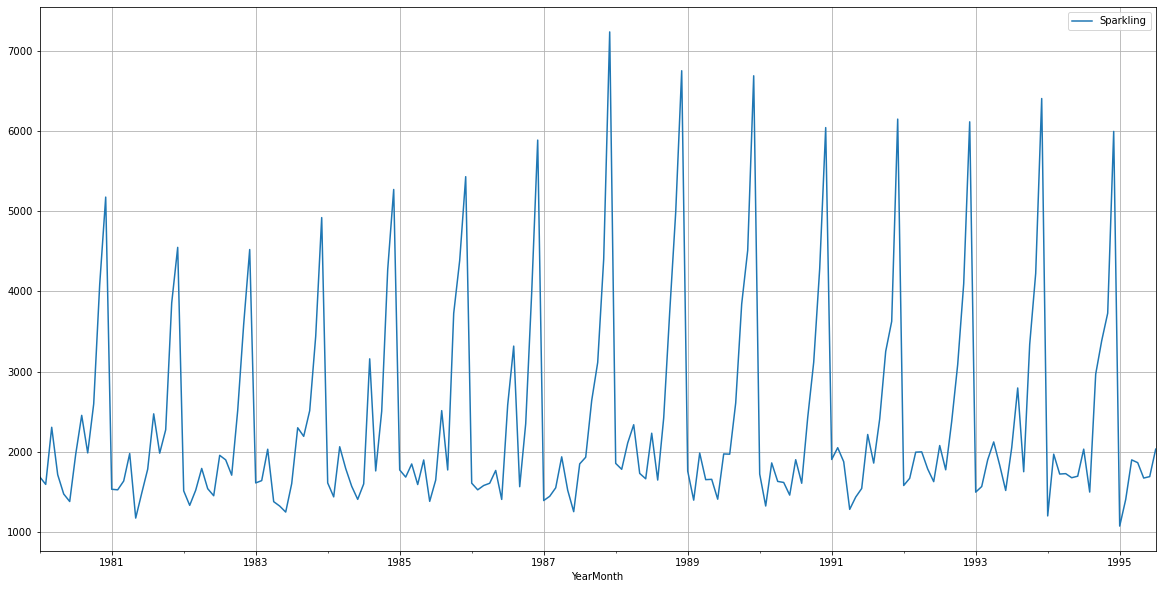

In [16]:
df.plot();
plt.grid();

## Q2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

## Exploratory Data Analysis

### Box Plot of Yearly Wine Sales

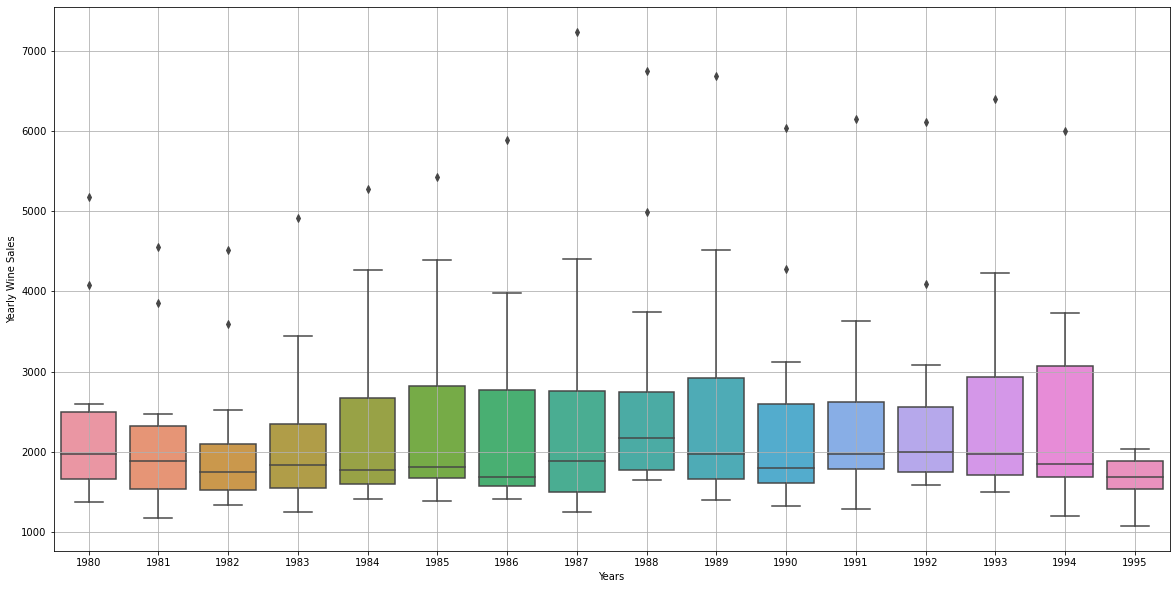

In [17]:
sns.boxplot(df.index.year, df.Sparkling);
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Wine Sales');

As we got to know from the Time Series plot, the boxplots over here also indicates a measure of trend being present. Also, we see that the sales of wine has some outliers for certain years.

### Yearly Mean Wine Sales

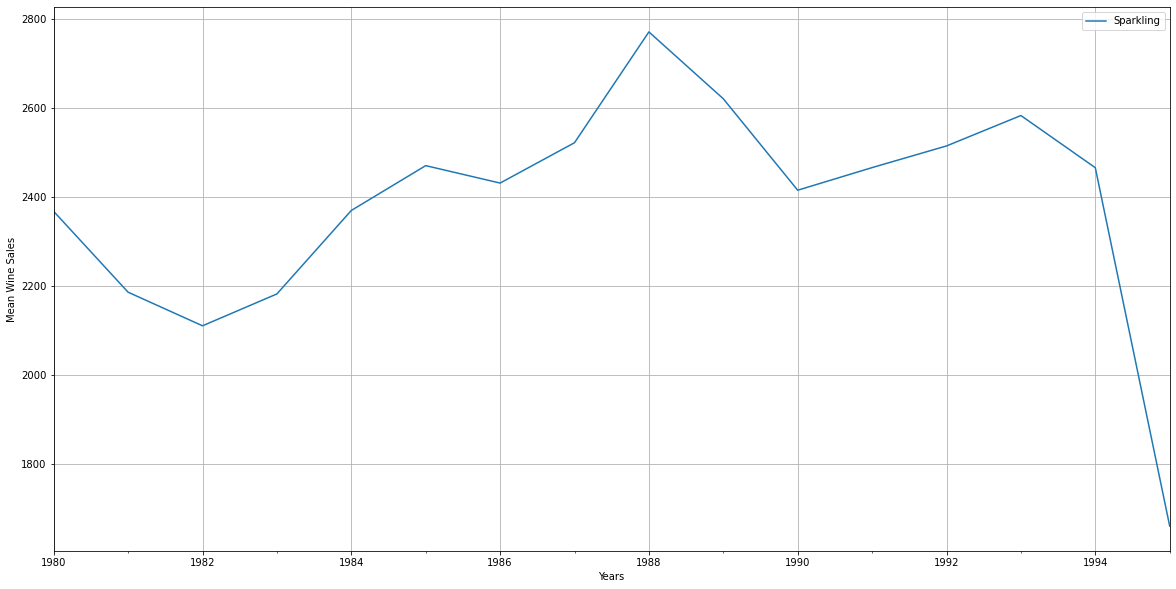

In [18]:
df.resample('A').mean().plot();
plt.grid();
plt.xlabel('Years');
plt.ylabel('Mean Wine Sales');

### Yearly Total Wine Sales

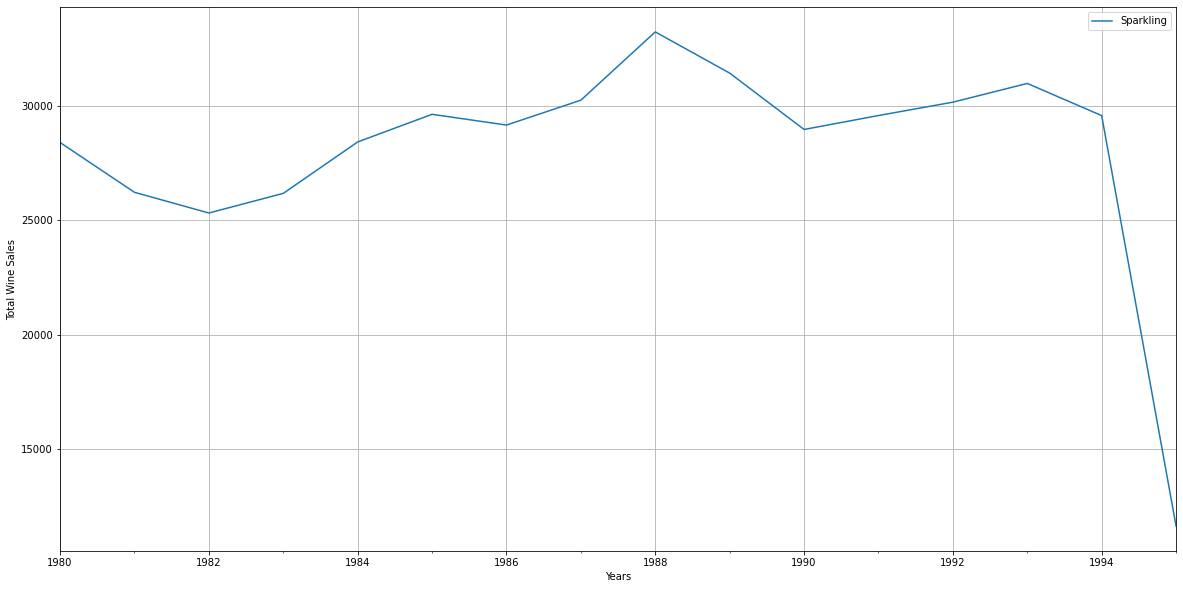

In [19]:
df.resample('A').sum().plot();
plt.grid();
plt.xlabel('Years');
plt.ylabel('Total Wine Sales');

In [20]:
pd.DataFrame({'Mean Sales':df.groupby(df.index.year).mean().Sparkling,'Total Sales': df.groupby(df.index.year).sum().Sparkling},
             index=df.groupby(df.index.year).mean().index).rename_axis('Year').round(1)

Mean Sales  Total Sales
Year                         
1980      2367.2        28406
1981      2185.6        26227
1982      2110.1        25321
1983      2181.7        26180
1984      2369.2        28431
1985      2470.0        29640
1986      2430.8        29170
1987      2521.5        30258
1988      2770.5        33246
1989      2620.2        31443
1990      2414.8        28977
1991      2465.6        29587
1992      2514.2        30171
1993      2582.6        30991
1994      2465.3        29584
1995      1660.0        11620

### Quarterly Sales Analysis

In [21]:
dfQ=df.resample('Q').sum()
dfQ.head()

Sparkling
YearMonth            
1980-03-31       5581
1980-06-30       4560
1980-09-30       6403
1980-12-31      11862
1981-03-31       4686

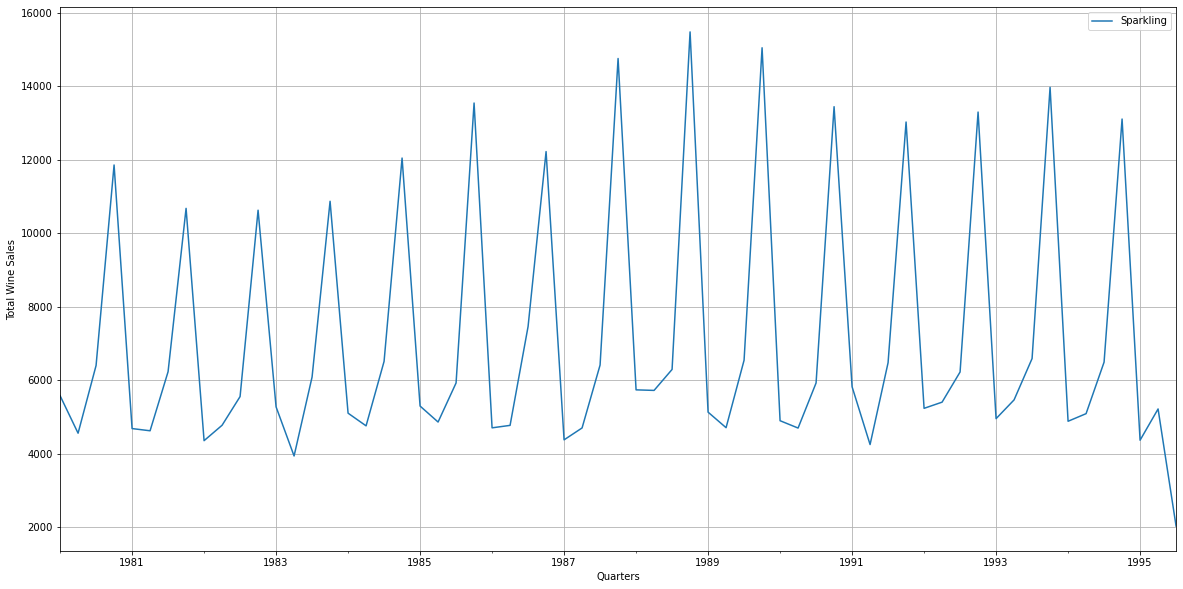

In [22]:
df.resample('Q').sum().plot();
plt.grid();
plt.xlabel('Quarters');
plt.ylabel('Total Wine Sales');

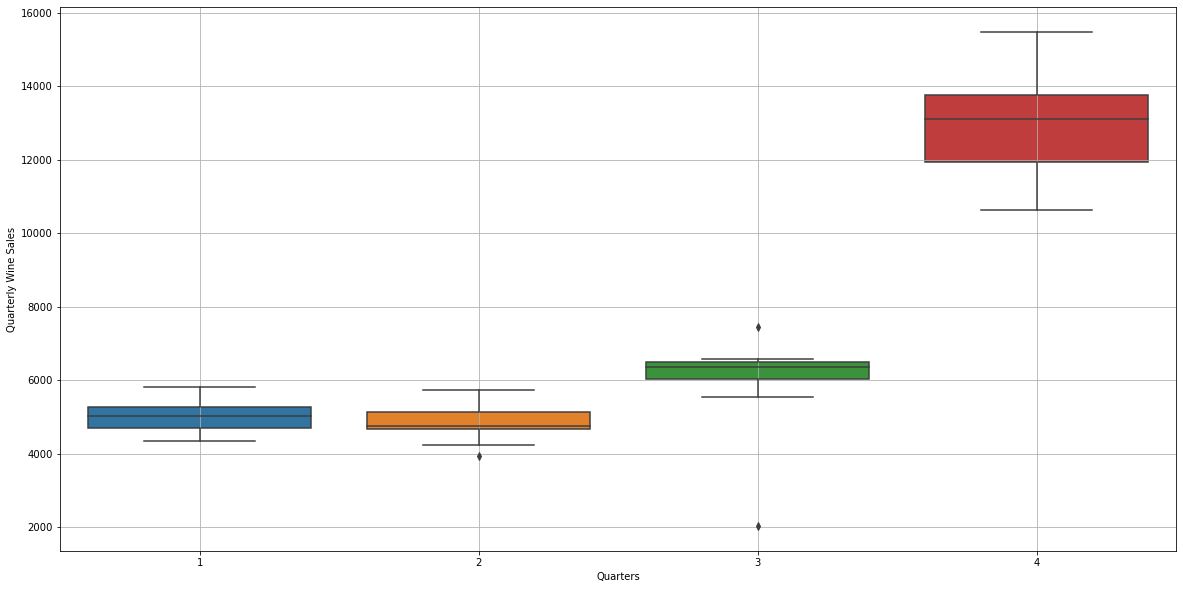

In [23]:
sns.boxplot(dfQ.index.quarter,dfQ.Sparkling);
plt.grid()
plt.xlabel('Quarters');
plt.ylabel('Quarterly Wine Sales');

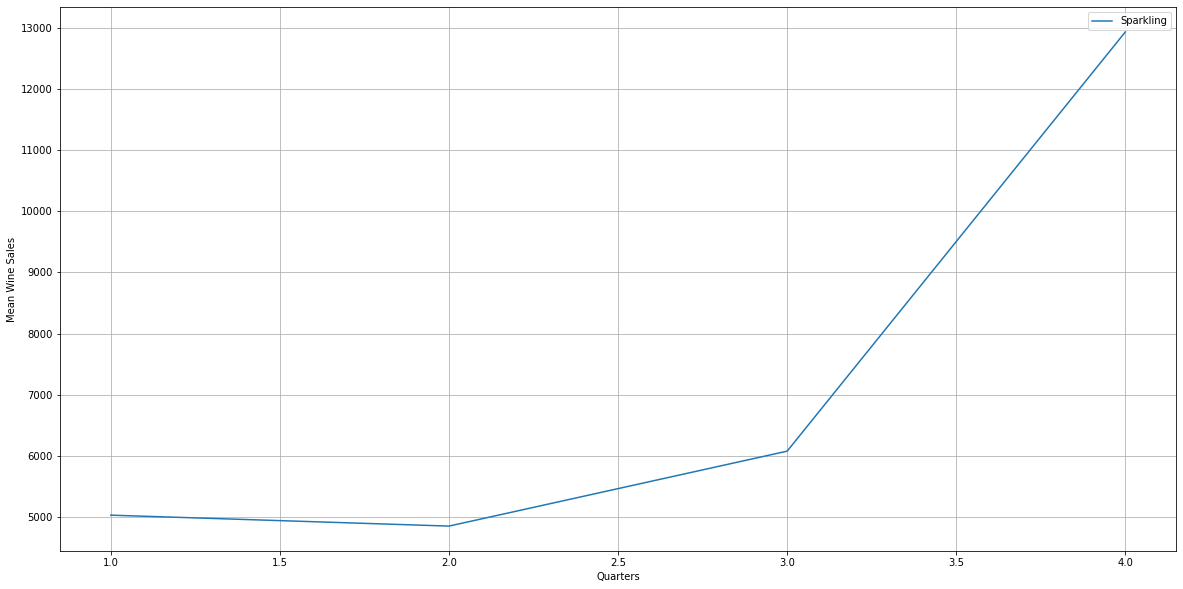

In [24]:
dfQ.groupby(dfQ.index.quarter).mean().plot();
plt.grid();
plt.xlabel('Quarters');
plt.ylabel('Mean Wine Sales');

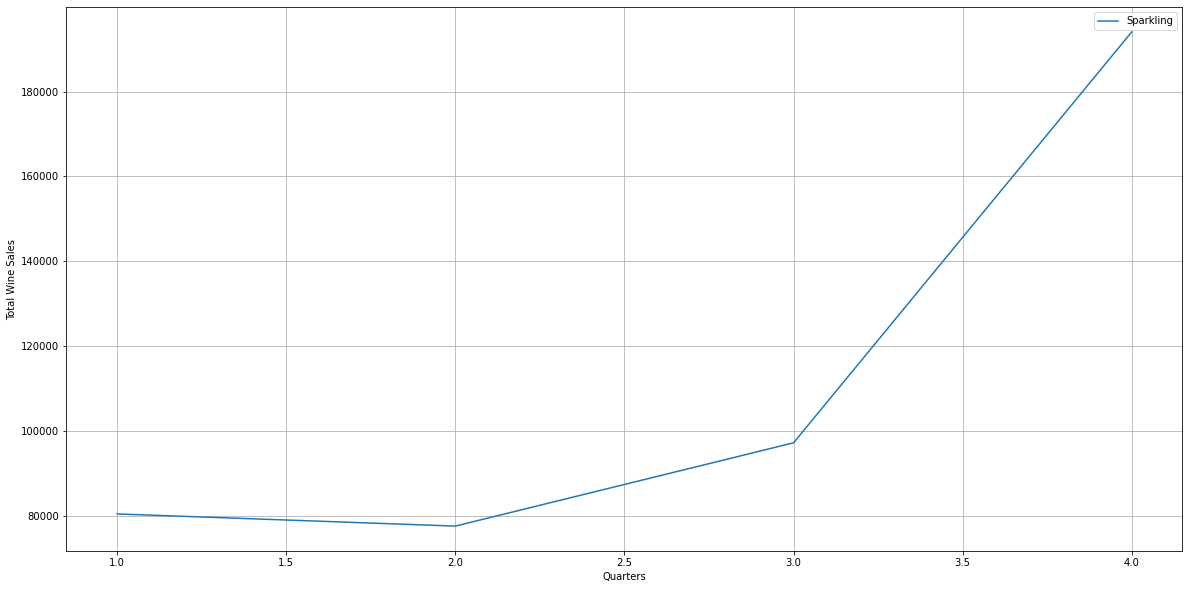

In [25]:
dfQ.groupby(dfQ.index.quarter).sum().plot();
plt.grid();
plt.xlabel('Quarters');
plt.ylabel('Total Wine Sales');

In [26]:
pd.DataFrame({'Mean Sales':dfQ.groupby(dfQ.index.quarter).mean().Sparkling,
              'Total Sales': dfQ.groupby(dfQ.index.quarter).sum().Sparkling},
             index=dfQ.groupby(dfQ.index.quarter).mean().index).rename_axis('Quarter').round(1)

Mean Sales  Total Sales
Quarter                         
1            5027.2        80435
2            4848.2        77572
3            6074.9        97198
4           12936.5       194047

### Box Plot of Monthly Wine Sales

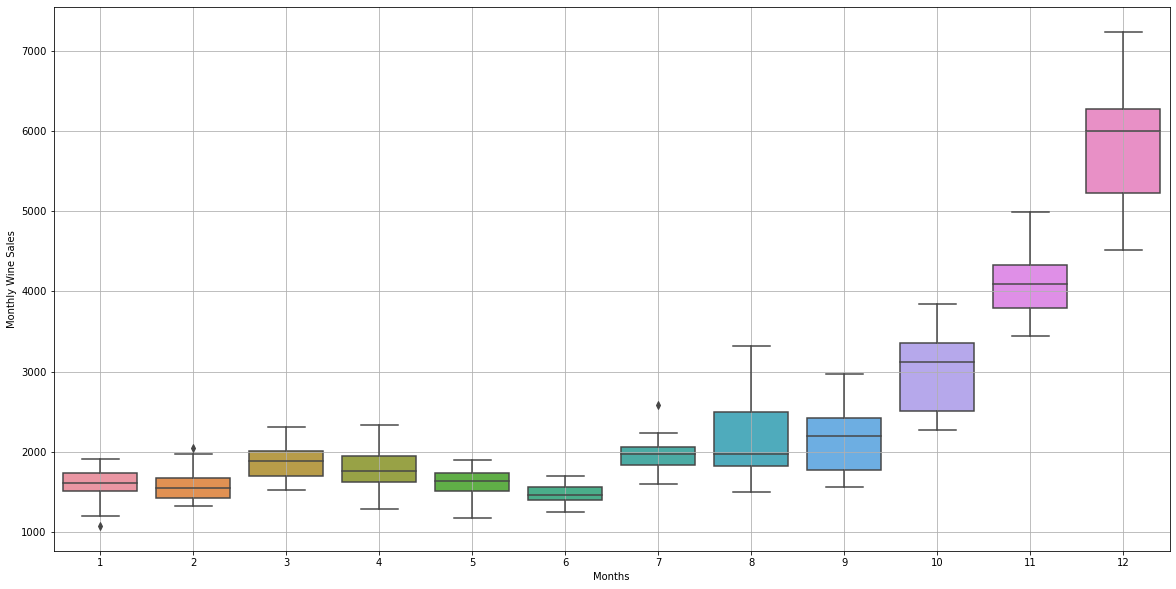

In [27]:
sns.boxplot(df.index.month, df.Sparkling);
plt.grid();
plt.xlabel('Months');
plt.ylabel('Monthly Wine Sales');

we see that the sales of wine has some outliers for certain months.

### Monthly Mean Wine Sales

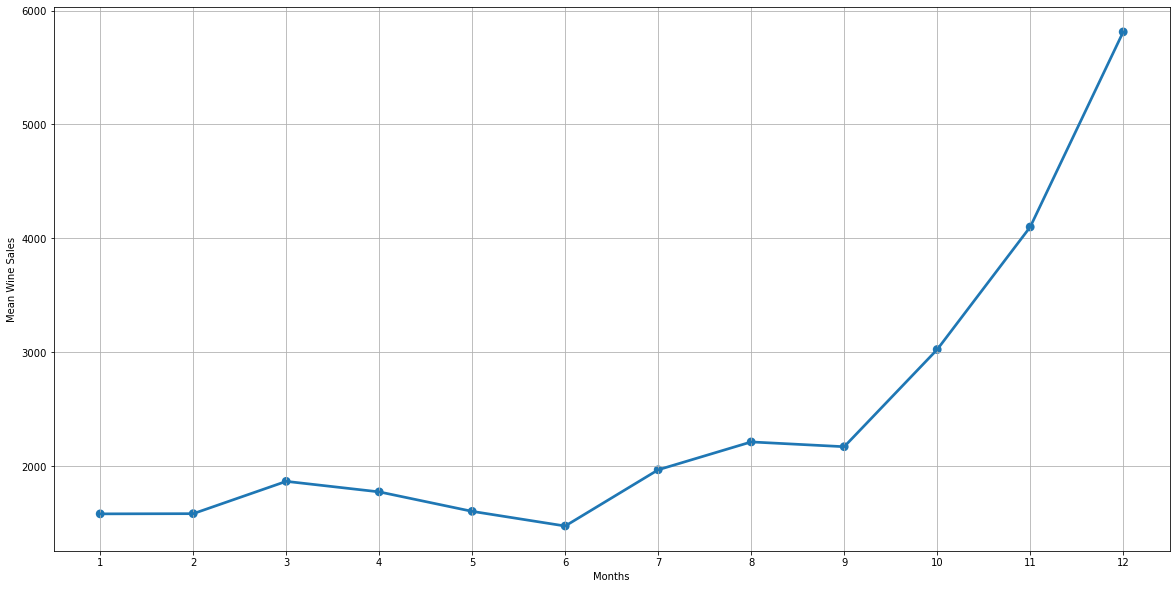

In [28]:
sns.pointplot(df.index.month,df.Sparkling,ci=False,estimator=np.mean);
plt.grid();
plt.xlabel('Months');
plt.ylabel('Mean Wine Sales');

### Monthly Total Wine Sales

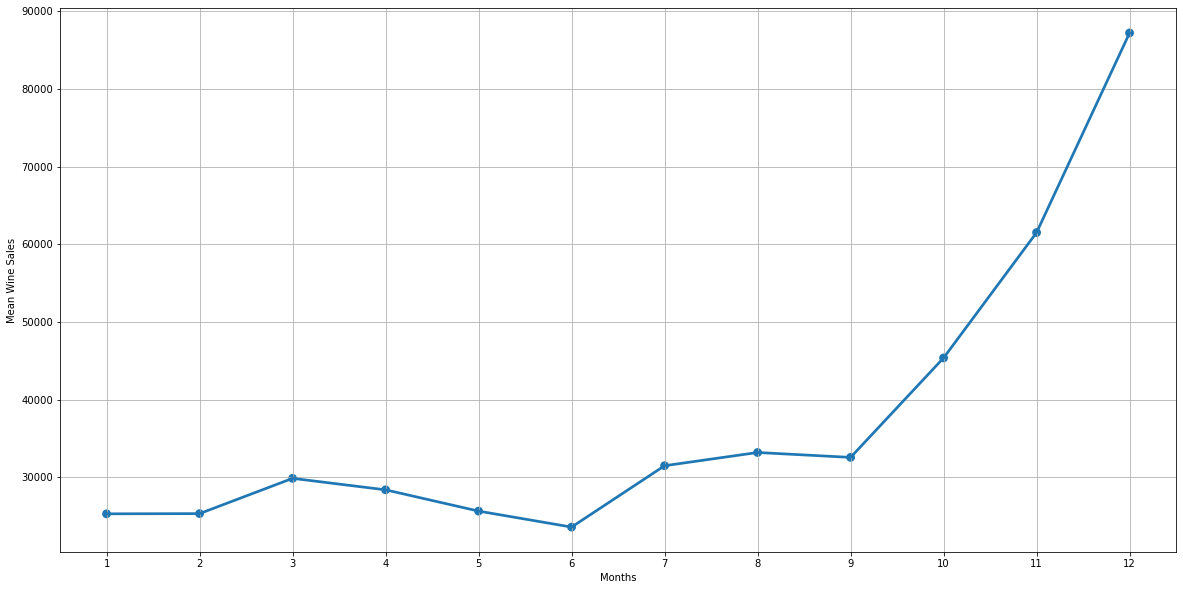

In [29]:
sns.pointplot(df.index.month,df.Sparkling,ci=False,estimator=np.sum);
plt.grid();
plt.xlabel('Months');
plt.ylabel('Mean Wine Sales');

In [30]:
pd.DataFrame({'Mean Sales':df.groupby(df.index.month).mean().Sparkling,'Total Sales': df.groupby(df.index.month).sum().Sparkling},
             index=df.groupby(df.index.month).mean().index).rename_axis('Month').round(1)

Mean Sales  Total Sales
Month                         
1          1580.0        25280
2          1581.7        25307
3          1865.5        29848
4          1773.1        28369
5          1601.9        25631
6          1473.2        23572
7          1967.1        31474
8          2211.8        33177
9          2169.8        32547
10         3023.5        45353
11         4099.8        61497
12         5813.1        87197

### Monthly Time Series

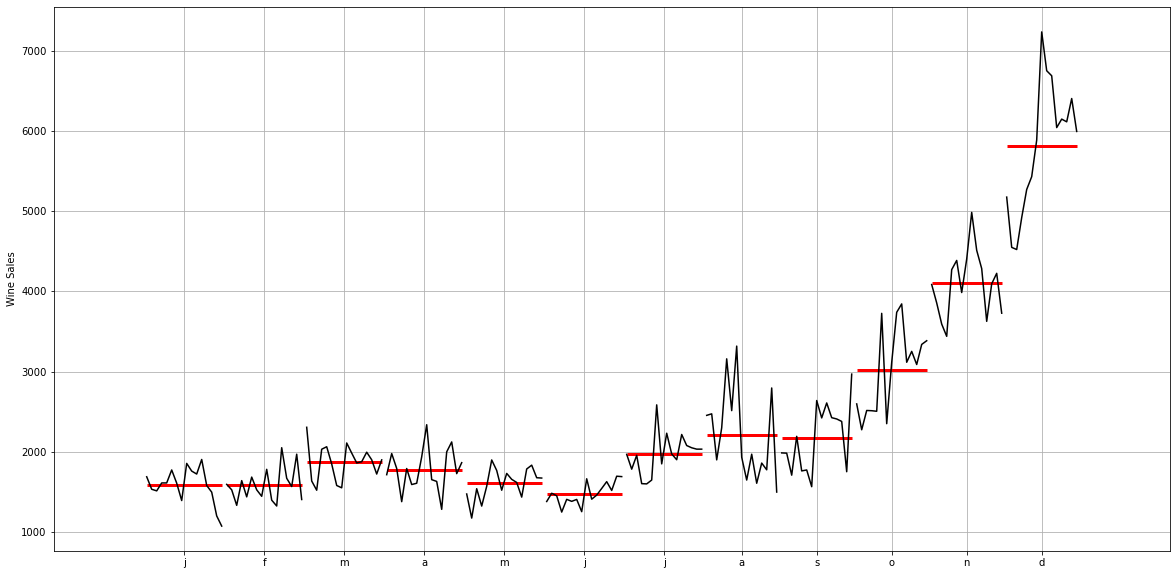

In [31]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df,ylabel='Wine Sales')
plt.grid();

### Yearly Wine Sales across Months

In [32]:
pd.pivot_table(data=df,values ='Sparkling',columns = df.index.month,index = df.index.year)

YearMonth      1       2       3       4       5       6       7       8   \
YearMonth                                                                   
1980       1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981       1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982       1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983       1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984       1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985       1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986       1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987       1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988       1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989       1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990       1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991       1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992       1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993       1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994       1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995       1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

YearMonth      9       10      11      12  
YearMonth                                  
1980       1984.0  2596.0  4087.0  5179.0  
1981       1981.0  2273.0  3857.0  4551.0  
1982       1706.0  2514.0  3593.0  4524.0  
1983       2191.0  2511.0  3440.0  4923.0  
1984       1759.0  2504.0  4273.0  5274.0  
1985       1771.0  3727.0  4388.0  5434.0  
1986       1562.0  2349.0  3987.0  5891.0  
1987       2638.0  3114.0  4405.0  7242.0  
1988       2421.0  3740.0  4988.0  6757.0  
1989       2608.0  3845.0  4514.0  6694.0  
1990       2424.0  3116.0  4286.0  6047.0  
1991       2408.0  3252.0  3627.0  6153.0  
1992       2377.0  3088.0  4096.0  6119.0  
1993       1749.0  3339.0  4227.0  6410.0  
1994       2968.0  3385.0  3729.0  5999.0  
1995          NaN     NaN     NaN     NaN

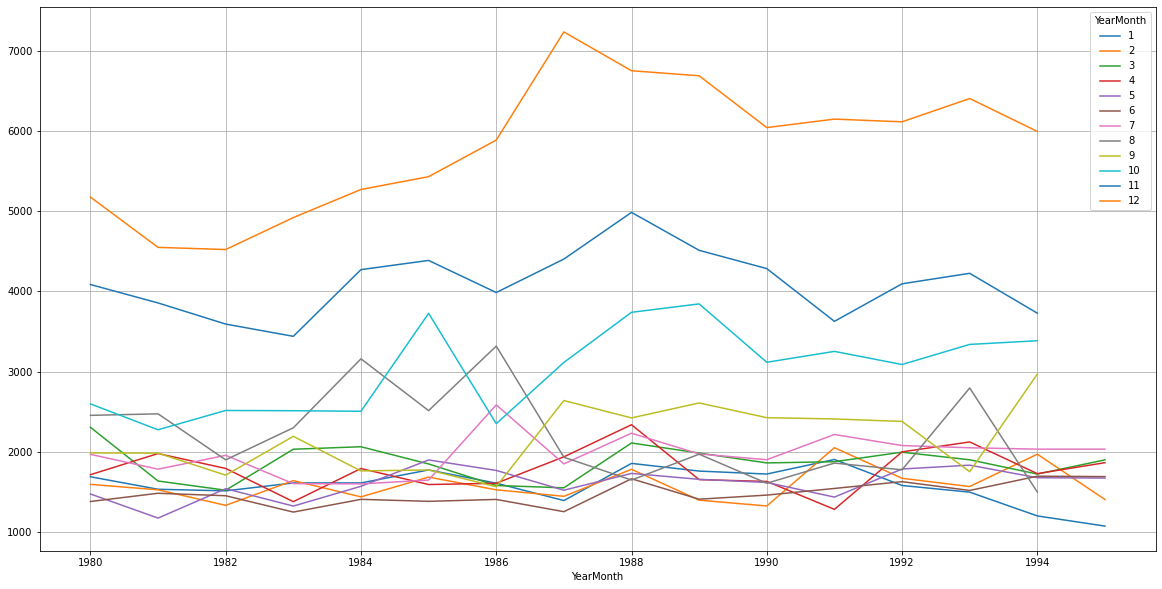

In [33]:
pd.pivot_table(data=df,values ='Sparkling',columns = df.index.month,index = df.index.year).plot();
plt.grid();

## Plot the Empirical Cumulative Distribution.

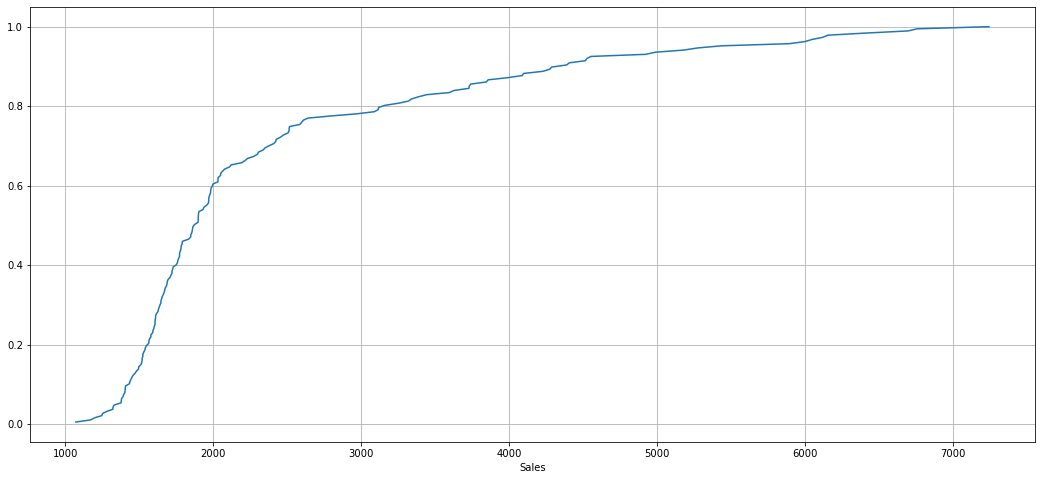

In [34]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

# Decomposition

### Additive Decomposition

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [36]:
df_add_decomp=seasonal_decompose(df,model='additive')

In [37]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,22

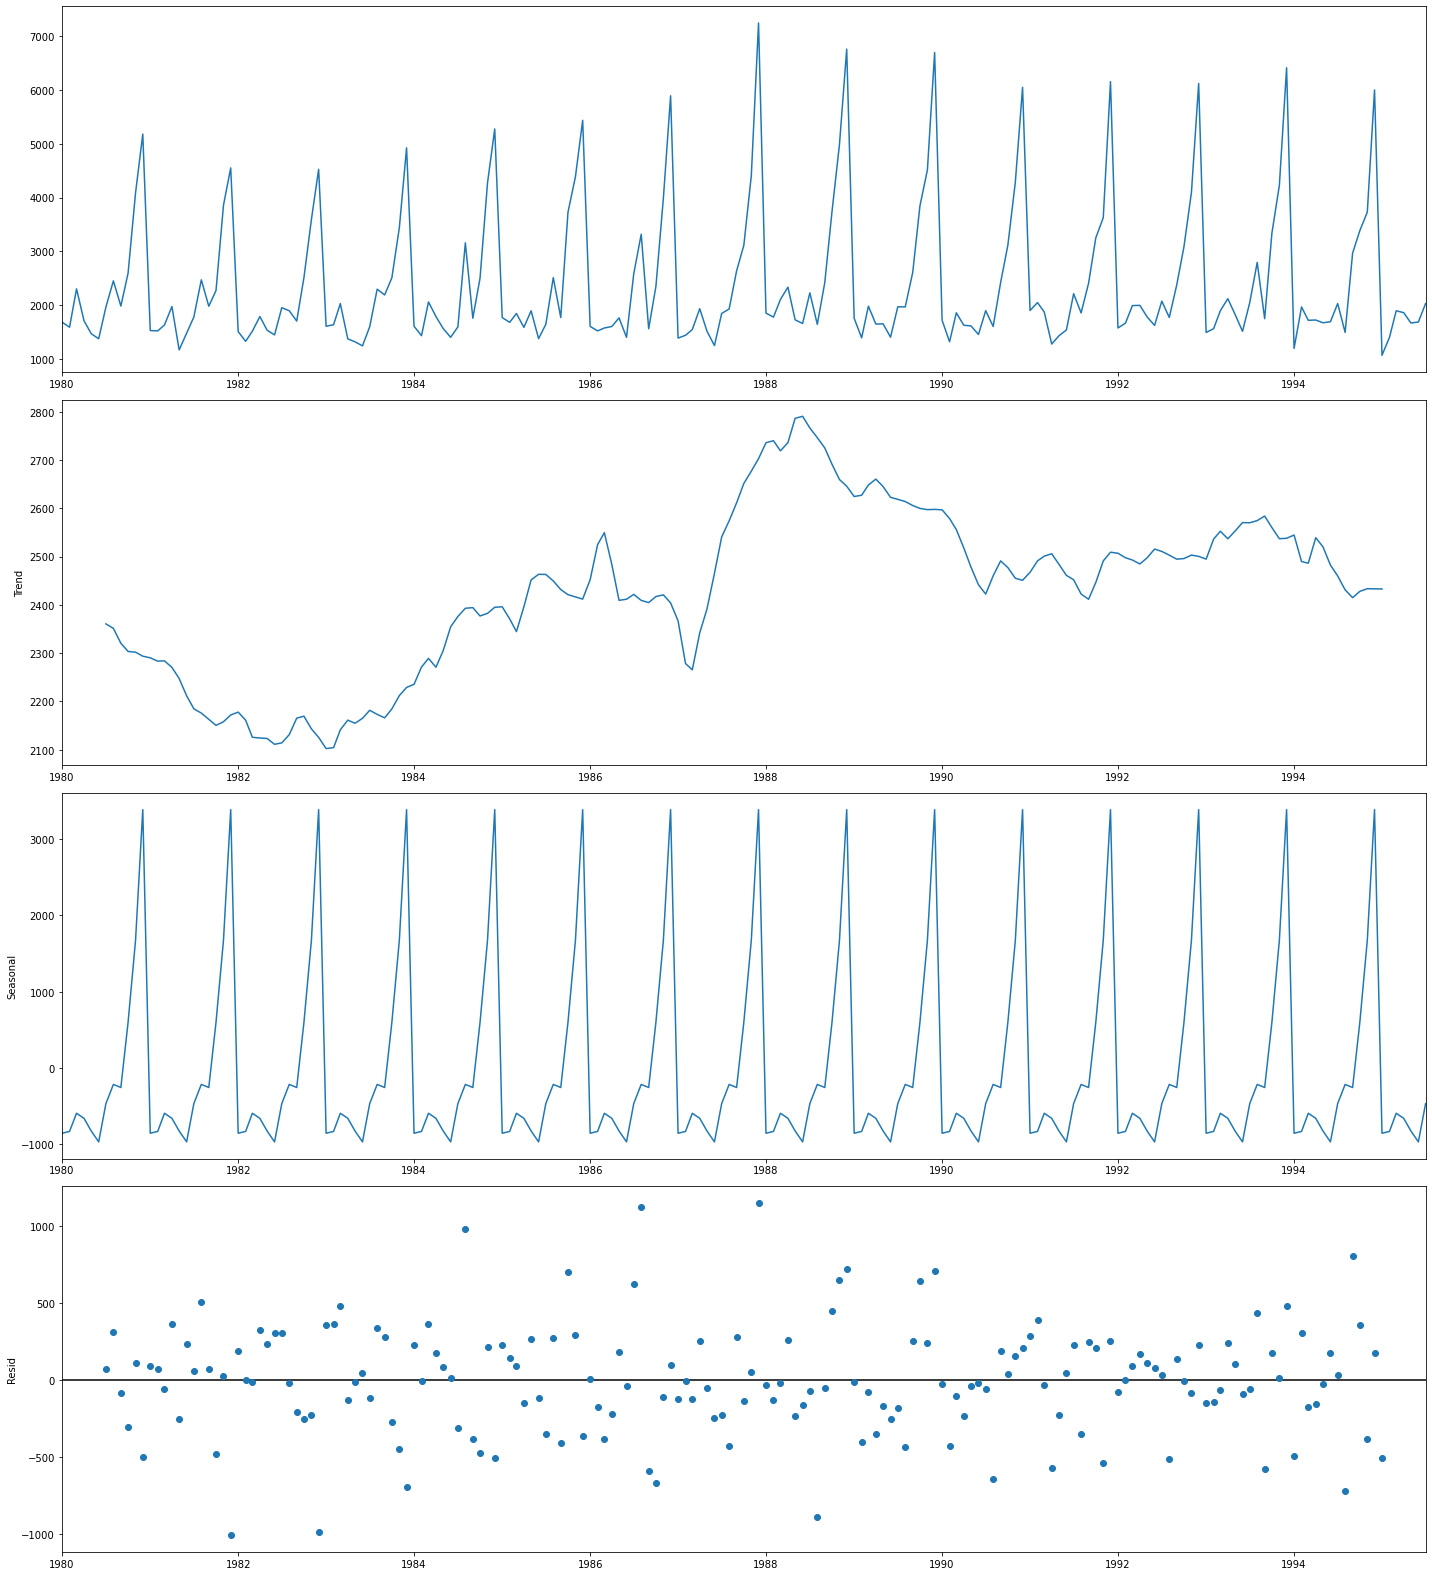

In [38]:
df_add_decomp.plot();

In [39]:
df_add_decomp_compenents=pd.concat([df_add_decomp.trend,df_add_decomp.seasonal,df_add_decomp.resid],axis=1)
df_add_decomp_compenents[0:23].round(1)

trend  seasonal  resid
YearMonth                          
1980-01-01     NaN    -854.3    NaN
1980-02-01     NaN    -830.4    NaN
1980-03-01     NaN    -592.4    NaN
1980-04-01     NaN    -658.5    NaN
1980-05-01     NaN    -824.4    NaN
1980-06-01     NaN    -967.4    NaN
1980-07-01  2360.7    -465.5   70.8
1980-08-01  2351.3    -214.3  316.0
1980-09-01  2320.5    -254.7  -81.9
1980-10-01  2303.6     599.8 -307.4
1980-11-01  2302.0    1675.1  109.9
1980-12-01  2293.8    3387.0 -501.8
1981-01-01  2290.4    -854.3   93.9
1981-02-01  2283.5    -830.4   69.9
1981-03-01  2284.1    -592.4  -58.8
1981-04-01  2270.5    -658.5  363.9
1981-05-01  2247.5    -824.4 -253.1
1981-06-01  2211.8    -967.4  235.7
1981-07-01  2184.7    -465.5   61.8
1981-08-01  2175.8    -214.3  510.5
1981-09-01  2163.0    -254.7   72.7
1981-10-01  2150.4     599.8 -477.2
1981-11-01  2158.0    1675.1   24.0

### Multiplicative Decomposition

In [40]:
df_mult_decomp=seasonal_decompose(df,model='multiplicative',period=12)

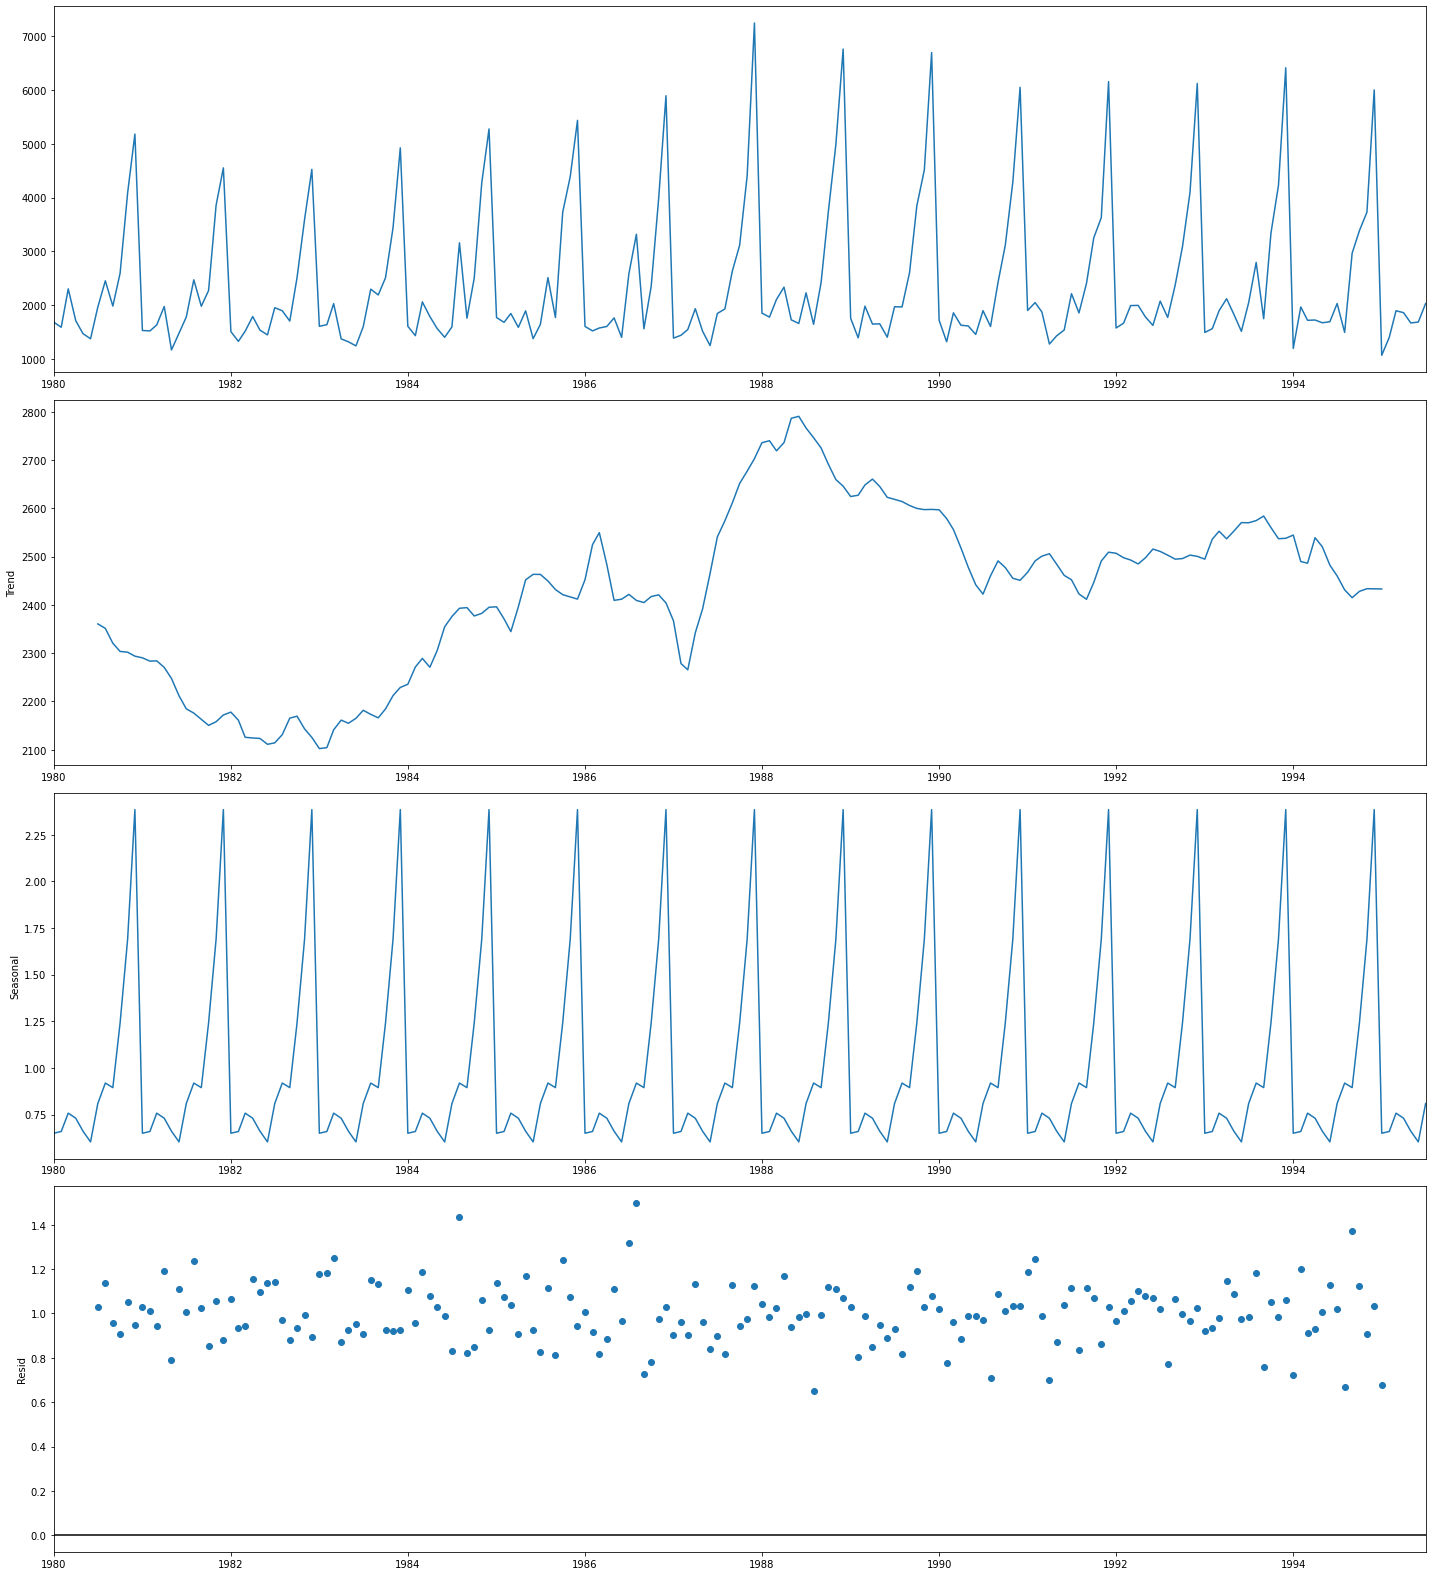

In [41]:
df_mult_decomp.plot();

In [42]:
df_mult_decomp_compenents=pd.concat([df_mult_decomp.trend,df_mult_decomp.seasonal,df_mult_decomp.resid],axis=1)
df_mult_decomp_compenents[0:23].round(1)

trend  seasonal  resid
YearMonth                          
1980-01-01     NaN       0.6    NaN
1980-02-01     NaN       0.7    NaN
1980-03-01     NaN       0.8    NaN
1980-04-01     NaN       0.7    NaN
1980-05-01     NaN       0.7    NaN
1980-06-01     NaN       0.6    NaN
1980-07-01  2360.7       0.8    1.0
1980-08-01  2351.3       0.9    1.1
1980-09-01  2320.5       0.9    1.0
1980-10-01  2303.6       1.2    0.9
1980-11-01  2302.0       1.7    1.1
1980-12-01  2293.8       2.4    0.9
1981-01-01  2290.4       0.6    1.0
1981-02-01  2283.5       0.7    1.0
1981-03-01  2284.1       0.8    0.9
1981-04-01  2270.5       0.7    1.2
1981-05-01  2247.5       0.7    0.8
1981-06-01  2211.8       0.6    1.1
1981-07-01  2184.7       0.8    1.0
1981-08-01  2175.8       0.9    1.2
1981-09-01  2163.0       0.9    1.0
1981-10-01  2150.4       1.2    0.9
1981-11-01  2158.0       1.7    1.1

## Q3. Split the data into training and test. The test data should start in 1991.

### Splitting the Dataset

In [43]:
df_train=df[df.index<'1991']
df_test=df[df.index>='1991']

In [44]:
print(df_train.shape)
print(df_test.shape)

(132, 1)
(55, 1)


In [45]:
display(df_train.head())
print(colored('First Few Rows of Train Data',color='blue',attrs=['bold']))

display(df_train.tail())
print(colored('Last Few Rows of Train Data',color='blue',attrs=['bold']))

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

First Few Rows of Train Data


Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

Last Few Rows of Train Data


In [46]:
display(df_test.head())
print(colored('First Few Rows of Test Data',color='blue',attrs=['bold']))

display(df_test.tail())
print(colored('Last Few Rows of Test Data',color='blue',attrs=['bold']))

Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432

First Few Rows of Test Data


Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

Last Few Rows of Test Data


In [47]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,10

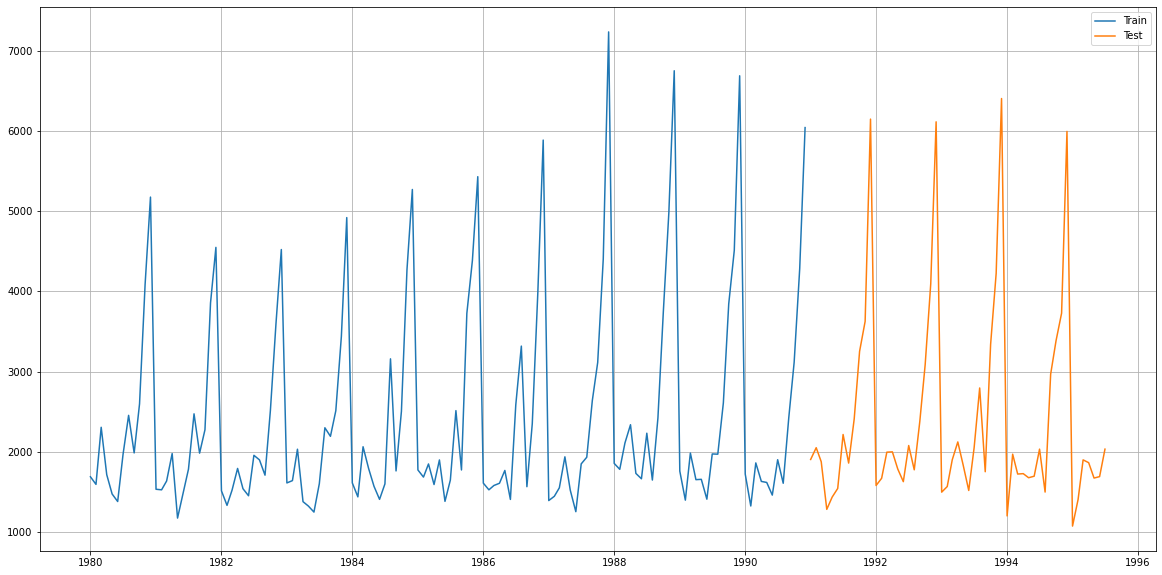

In [48]:
plt.plot( df_train.Sparkling, label='Train');
plt.plot(df_test.Sparkling, label='Test');
plt.legend(loc='best');
plt.grid();

## Q4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models should also be built on the training data and check the performance on the test data using RMSE.

## Model 1: Linear Regression

In [49]:
time_train = [i+1 for i in range(len(df_train))]
time_test = [i+133 for i in range(len(df_test))]
print('Training Time','\n',time_train)
print('Test Time','\n',time_test)

Training Time 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [50]:
df_train['time'] = time_train
df_test['time'] = time_test

In [51]:
display(df_train.head())
print(colored('First Few Rows of Train Data',color='blue',attrs=['bold']))

display(df_train.tail())
print(colored('Last Few Rows of Train Data',color='blue',attrs=['bold']))

Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5

First Few Rows of Train Data


Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132

Last Few Rows of Train Data


In [52]:
display(df_test.head())
print(colored('First Few Rows of Test Data',color='blue',attrs=['bold']))

display(df_test.tail())
print(colored('Last Few Rows of Test Data',color='blue',attrs=['bold']))

Sparkling  time
YearMonth                  
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135
1991-04-01       1279   136
1991-05-01       1432   137

First Few Rows of Test Data


Sparkling  time
YearMonth                  
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187

Last Few Rows of Test Data


In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
lr = LinearRegression()

In [55]:
lr.fit(df_train[['time']],df_train.Sparkling)

LinearRegression()

In [56]:
df_test['forecast_lr'] = lr.predict(df_test[['time']])

In [57]:
df_test[['Sparkling','forecast_lr']].head(10).round(1)

Sparkling  forecast_lr
YearMonth                         
1991-01-01       1902       2791.7
1991-02-01       2049       2797.5
1991-03-01       1874       2803.3
1991-04-01       1279       2809.2
1991-05-01       1432       2815.0
1991-06-01       1540       2820.8
1991-07-01       2214       2826.6
1991-08-01       1857       2832.5
1991-09-01       2408       2838.3
1991-10-01       3252       2844.1

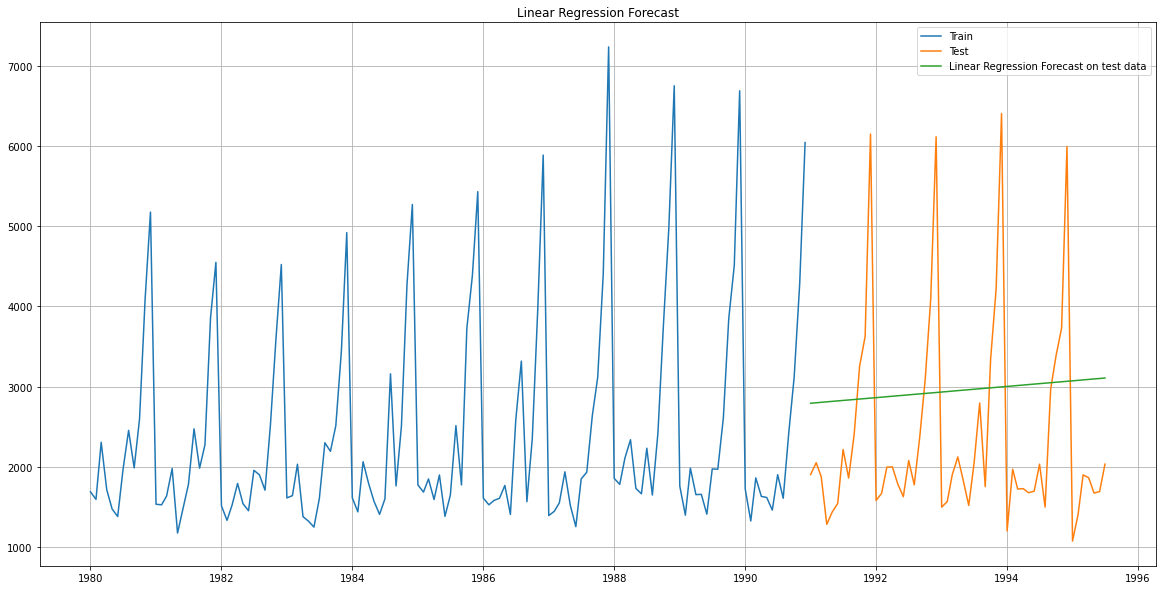

In [58]:
plt.plot( df_train.Sparkling, label='Train')
plt.plot(df_test.Sparkling, label='Test')
plt.plot(df_test.forecast_lr, label='Linear Regression Forecast on test data')
plt.legend(loc='best')
plt.grid();
plt.title('Linear Regression Forecast');

### Model Evaluation

In [59]:
from sklearn.metrics import mean_squared_error

In [60]:
rmse_lr = mean_squared_error(df_test.Sparkling,df_test.forecast_lr,squared=False)
rmse_lr

1389.135174897992

## Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

#### For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [61]:
df_test['forecast_naive'] = df_train['Sparkling'][-1]

In [62]:
df_test[['Sparkling','forecast_naive']].head(10)

Sparkling  forecast_naive
YearMonth                            
1991-01-01       1902            6047
1991-02-01       2049            6047
1991-03-01       1874            6047
1991-04-01       1279            6047
1991-05-01       1432            6047
1991-06-01       1540            6047
1991-07-01       2214            6047
1991-08-01       1857            6047
1991-09-01       2408            6047
1991-10-01       3252            6047

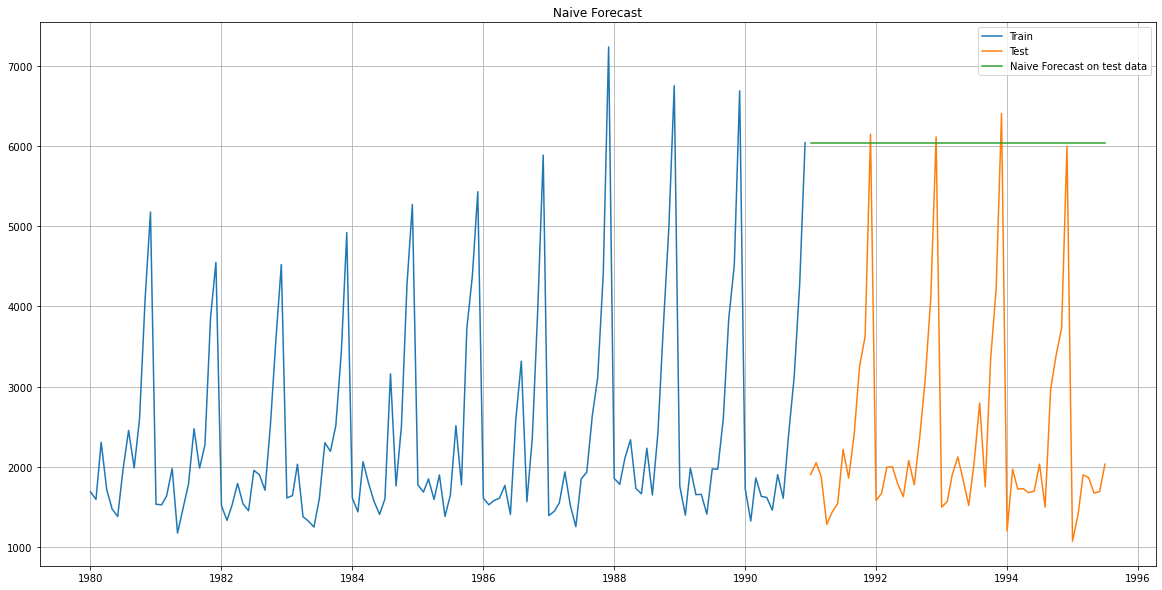

In [63]:
plt.plot( df_train.Sparkling, label='Train')
plt.plot(df_test.Sparkling, label='Test')
plt.plot(df_test.forecast_naive, label='Naive Forecast on test data')
plt.legend(loc='best')
plt.grid();
plt.title('Naive Forecast');

### Model Evaluation

In [64]:
rmse_naive = mean_squared_error(df_test.Sparkling,df_test.forecast_naive,squared=False)
rmse_naive

3864.2793518443914

## Model 3: Simple Average

#### For this particular simple average method, we will forecast by using the average of the training values.

In [65]:
df_test['forecast_sa'] = df_train.Sparkling.mean()

In [66]:
df_test[['Sparkling','forecast_sa']].head(10).round(1)

Sparkling  forecast_sa
YearMonth                         
1991-01-01       1902       2403.8
1991-02-01       2049       2403.8
1991-03-01       1874       2403.8
1991-04-01       1279       2403.8
1991-05-01       1432       2403.8
1991-06-01       1540       2403.8
1991-07-01       2214       2403.8
1991-08-01       1857       2403.8
1991-09-01       2408       2403.8
1991-10-01       3252       2403.8

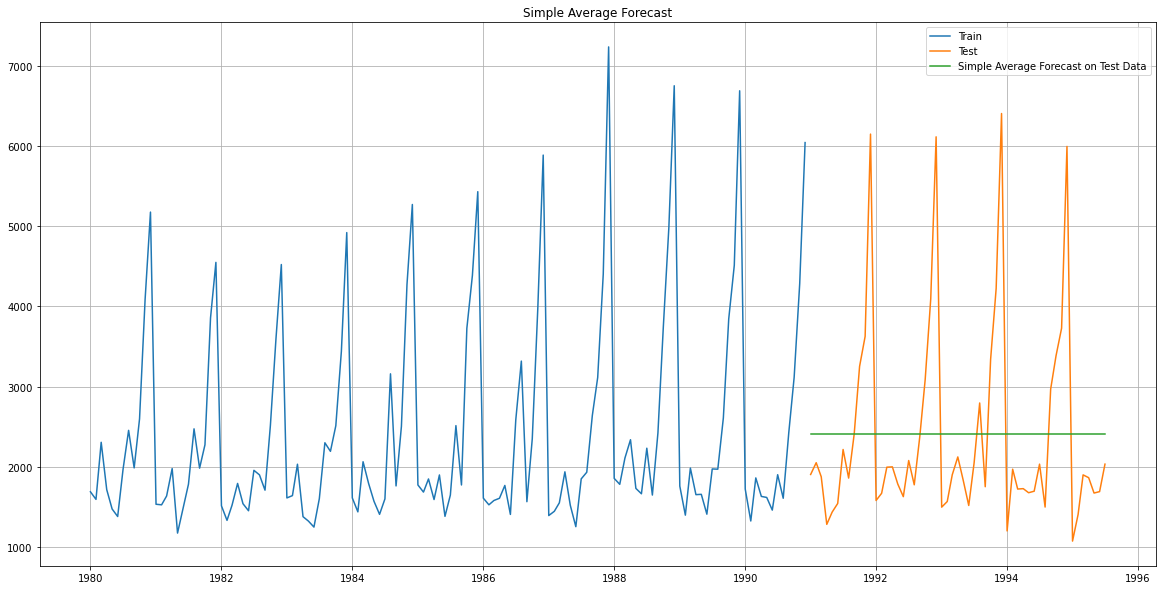

In [67]:
plt.plot(df_train.Sparkling, label='Train')
plt.plot(df_test.Sparkling, label='Test')
plt.plot(df_test.forecast_sa, label='Simple Average Forecast on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

### Model Evaluation

In [68]:
rmse_sa = mean_squared_error(df_test.Sparkling,df_test.forecast_sa,squared=False)
rmse_sa

1275.0818036965309

### Before building the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots

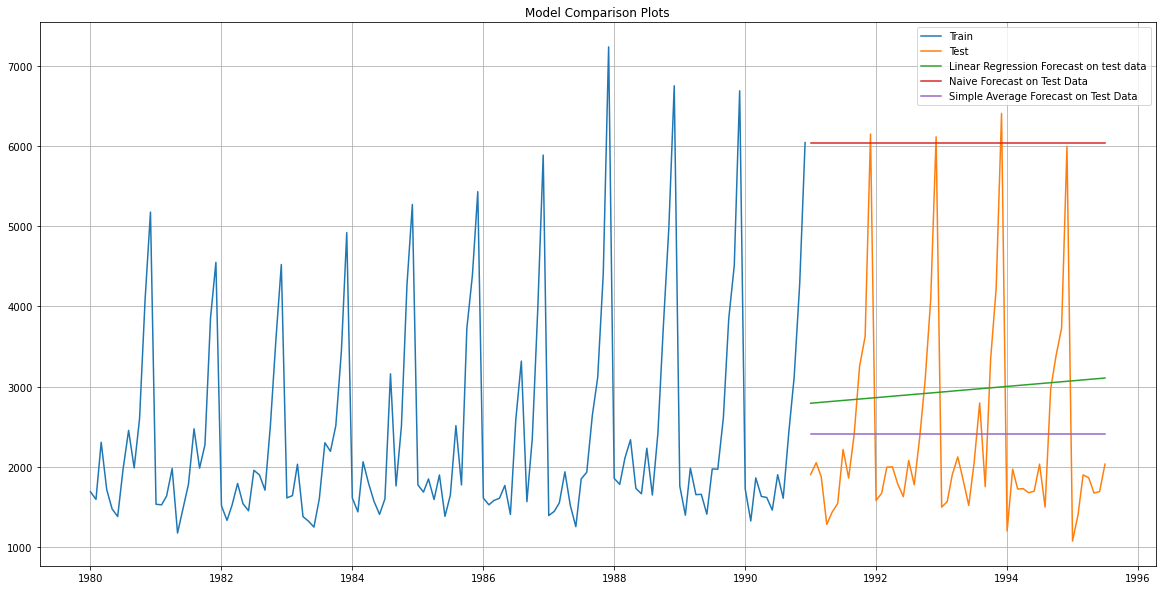

In [69]:
plt.figure(figsize=(20,10))
plt.plot(df_train.Sparkling, label='Train')
plt.plot(df_test.Sparkling, label='Test')
plt.plot(df_test.forecast_lr, label='Linear Regression Forecast on test data')
plt.plot(df_test.forecast_naive, label='Naive Forecast on Test Data')
plt.plot(df_test.forecast_sa, label='Simple Average Forecast on Test Data')
plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## Model 4: Simple Exponential Smoothing

In [70]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [71]:
ses_optimized=SimpleExpSmoothing(df_train.Sparkling,initialization_method='estimated').fit(optimized=True)

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [72]:
ses_optimized.params_formatted

name        param  optimized
smoothing_level  alpha     0.070291       True
initial_level      l.0  1764.013706       True

In [73]:
df_test['forecast_ses_optimized'] = ses_optimized.forecast(steps=len(df_test))

In [74]:
df_test[['Sparkling','forecast_ses_optimized']].head(10).round(1)

Sparkling  forecast_ses_optimized
YearMonth                                    
1991-01-01       1902                  2804.7
1991-02-01       2049                  2804.7
1991-03-01       1874                  2804.7
1991-04-01       1279                  2804.7
1991-05-01       1432                  2804.7
1991-06-01       1540                  2804.7
1991-07-01       2214                  2804.7
1991-08-01       1857                  2804.7
1991-09-01       2408                  2804.7
1991-10-01       3252                  2804.7

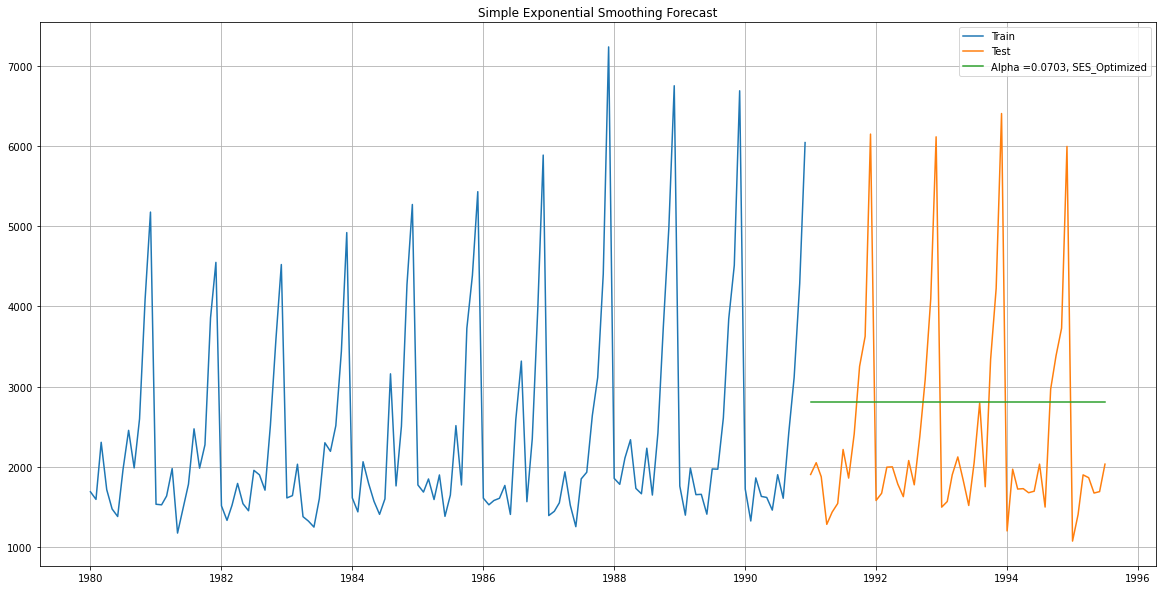

In [75]:
plt.plot(df_train.Sparkling, label='Train')
plt.plot(df_test.Sparkling, label='Test')
plt.plot(df_test.forecast_ses_optimized, label='Alpha =0.0703, SES_Optimized')
plt.legend(loc='best')
plt.grid()
plt.title('Simple Exponential Smoothing Forecast');

In [76]:
rmse_ses_optimized = mean_squared_error(df_test.Sparkling,df_test.forecast_ses_optimized,squared=False)
rmse_ses_optimized

1338.0083844916467

### Optimizing Alpha based on Test RMSE

* Setting different alpha values.
* Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.
* We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [77]:
## First we will define an empty dataframe to store our values from the loop

results_ses = pd.DataFrame({'Alpha_Values':[],'RMSE_Train':[],'RMSE_Test': []})
results_ses 

Empty DataFrame
Columns: [Alpha_Values, RMSE_Train, RMSE_Test]
Index: []

In [78]:
for i in np.arange(0.1,1.1,0.1):
    ses_iteration=SimpleExpSmoothing(df_train.Sparkling,initialization_method='estimated').fit(smoothing_level=i,optimized=False,use_brute=True)
    rmse_train = mean_squared_error(df_train.Sparkling,ses_iteration.fittedvalues,squared=False)
    rmse_test = mean_squared_error(df_test.Sparkling,ses_iteration.forecast(steps=len(df_test)),squared=False)
    results_ses=results_ses.append({'Alpha_Values':i,'RMSE_Train':rmse_train 
                                      ,'RMSE_Test':rmse_test}, ignore_index=True)
results_ses

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

Alpha_Values   RMSE_Train    RMSE_Test
0           0.1  1336.428478  1375.393335
1           0.2  1356.950475  1595.206839
2           0.3  1359.953398  1935.507132
3           0.4  1352.861879  2311.919615
4           0.5  1344.203449  2666.351413
5           0.6  1338.961583  2979.204388
6           0.7  1338.969940  3249.944092
7           0.8  1344.565990  3483.801006
8           0.9  1355.815758  3686.794285
9           1.0  1373.175719  3864.279352

In [79]:
results_ses.sort_values(by='RMSE_Test').head().round(1)

Alpha_Values  RMSE_Train  RMSE_Test
0           0.1      1336.4     1375.4
1           0.2      1357.0     1595.2
2           0.3      1360.0     1935.5
3           0.4      1352.9     2311.9
4           0.5      1344.2     2666.4

### Final SES Model

In [80]:
ses= SimpleExpSmoothing(df_train.Sparkling,initialization_method='estimated').fit(smoothing_level=0.1,optimized=False,use_brute=True)

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [81]:
ses.params_formatted

name   param  optimized
smoothing_level  alpha     0.1      False
initial_level      l.0  1502.2      False

In [82]:
df_test['forecast_ses'] = ses.forecast(steps=len(df_test))

In [83]:
df_test[['Sparkling','forecast_ses_optimized','forecast_ses']].head(10).round(1)

Sparkling  forecast_ses_optimized  forecast_ses
YearMonth                                                  
1991-01-01       1902                  2804.7        2914.8
1991-02-01       2049                  2804.7        2914.8
1991-03-01       1874                  2804.7        2914.8
1991-04-01       1279                  2804.7        2914.8
1991-05-01       1432                  2804.7        2914.8
1991-06-01       1540                  2804.7        2914.8
1991-07-01       2214                  2804.7        2914.8
1991-08-01       1857                  2804.7        2914.8
1991-09-01       2408                  2804.7        2914.8
1991-10-01       3252                  2804.7        2914.8

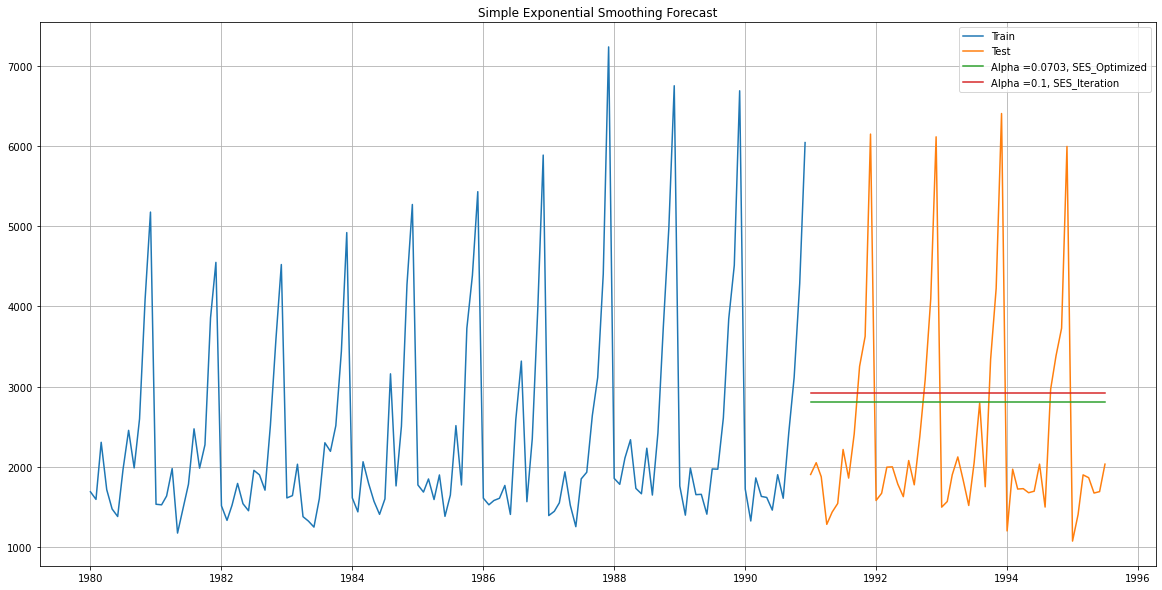

In [84]:
plt.plot(df_train.Sparkling, label='Train')
plt.plot(df_test.Sparkling, label='Test')
plt.plot(df_test.forecast_ses_optimized, label='Alpha =0.0703, SES_Optimized')
plt.plot(df_test.forecast_ses, label='Alpha =0.1, SES_Iteration')
plt.legend(loc='best')
plt.grid();
plt.title('Simple Exponential Smoothing Forecast');

In [85]:
rmse_ses = mean_squared_error(df_test.Sparkling,df_test.forecast_ses,squared=False)
rmse_ses

1375.3933349669476

## Model 5: Double Exponential Smoothing

#### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

In [86]:
des_optimized = Holt(df_train.Sparkling,initialization_method='estimated').fit(optimized=True)

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [87]:
des_optimized.params_formatted

name        param  optimized
smoothing_level  alpha     0.665000       True
smoothing_trend   beta     0.000100       True
initial_level      l.0  1502.200000       True
initial_trend      b.0    74.872727       True

In [88]:
df_test['forecast_des_optimized'] = des_optimized.forecast(steps=len(df_test))

In [89]:
df_test[['Sparkling','forecast_des_optimized']].head(10).round(1)

Sparkling  forecast_des_optimized
YearMonth                                    
1991-01-01       1902                  5401.7
1991-02-01       2049                  5476.0
1991-03-01       1874                  5550.3
1991-04-01       1279                  5624.5
1991-05-01       1432                  5698.8
1991-06-01       1540                  5773.1
1991-07-01       2214                  5847.4
1991-08-01       1857                  5921.6
1991-09-01       2408                  5995.9
1991-10-01       3252                  6070.2

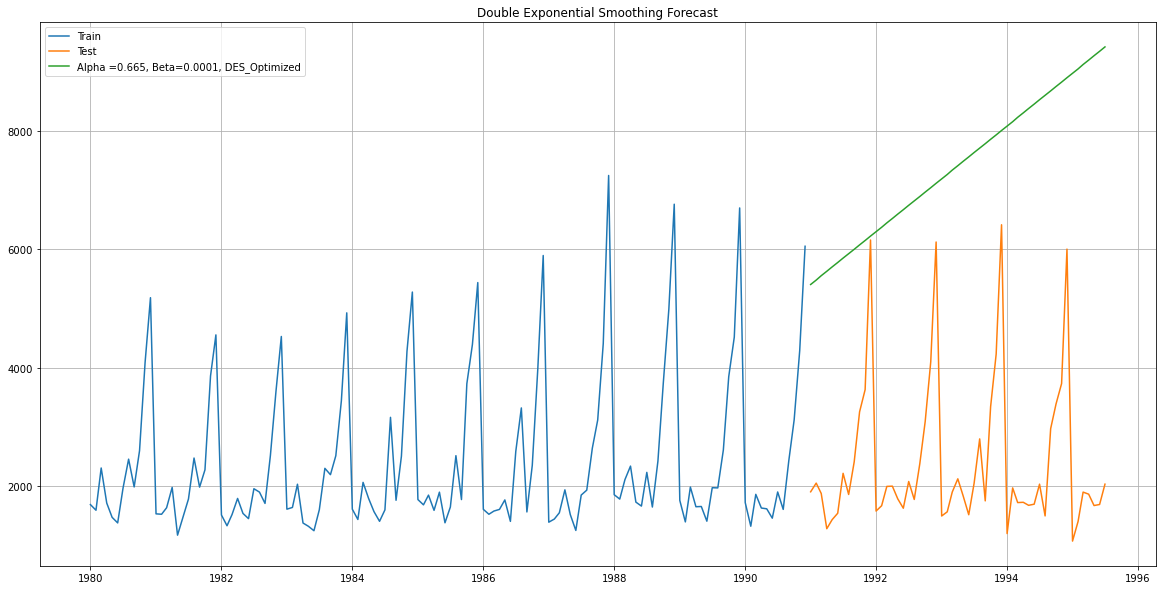

In [90]:
plt.plot(df_train.Sparkling, label='Train')
plt.plot(df_test.Sparkling, label='Test')
plt.plot(df_test.forecast_des_optimized, label='Alpha =0.665, Beta=0.0001, DES_Optimized')
plt.legend(loc='best')
plt.grid()
plt.title('Double Exponential Smoothing Forecast');

In [91]:
rmse_des_optimized = mean_squared_error(df_test.Sparkling,df_test.forecast_des_optimized,squared=False)
rmse_des_optimized

5291.8798332269125

### Optimizing Alpha and Beta based on Test RMSE

In [92]:
## First we will define an empty dataframe to store our values from the loop

results_des = pd.DataFrame({'Alpha_Values':[],'Beta Values':[],'RMSE_Train':[],'RMSE_Test': []})
results_des

Empty DataFrame
Columns: [Alpha_Values, Beta Values, RMSE_Train, RMSE_Test]
Index: []

In [93]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        des_iteration=Holt(df_train.Sparkling,initialization_method='estimated').fit(smoothing_level=i,smoothing_trend=j,
                                                                                  optimized=False,use_brute=True)
        rmse_train = mean_squared_error(df_train.Sparkling,des_iteration.fittedvalues,squared=False)
        rmse_test = mean_squared_error(df_test.Sparkling,des_iteration.forecast(steps=len(df_test)),squared=False)
        results_des=results_des.append({'Alpha_Values':i, 'Beta Values':j,'RMSE_Train':rmse_train 
                                      ,'RMSE_Test':rmse_test}, ignore_index=True)
results_des

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

Alpha_Values  Beta Values   RMSE_Train     RMSE_Test
0            0.1          0.1  1373.320853   1777.734773
1            0.1          0.2  1403.485779   2599.314701
2            0.1          0.3  1434.781023   4287.469279
3            0.1          0.4  1469.714230   6044.157399
4            0.1          0.5  1509.672437   7386.659388
..           ...          ...          ...           ...
95           1.0          0.6  1753.408203  49327.087977
96           1.0          0.7  1825.208810  52655.765663
97           1.0          0.8  1902.059815  55442.273880
98           1.0          0.9  1985.450202  57823.177011
99           1.0          1.0  2077.802588  59877.076519

[100 rows x 4 columns]

In [94]:
results_des.sort_values(by='RMSE_Test').head().round(1)

Alpha_Values  Beta Values  RMSE_Train  RMSE_Test
0            0.1          0.1      1373.3     1777.7
1            0.1          0.2      1403.5     2599.3
10           0.2          0.1      1413.4     3611.8
2            0.1          0.3      1434.8     4287.5
20           0.3          0.1      1428.6     5908.2

### Final DES Model

In [95]:
des= Holt(df_train.Sparkling,initialization_method='estimated').fit(smoothing_level=0.1,smoothing_trend=0.1,
                                                                 optimized=False,use_brute=True)

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [96]:
des.params_formatted

name        param  optimized
smoothing_level  alpha     0.100000      False
smoothing_trend   beta     0.100000      False
initial_level      l.0  1502.200000      False
initial_trend      b.0    74.872727      False

In [97]:
df_test['forecast_des'] = des.forecast(steps=len(df_test))

In [98]:
df_test[['Sparkling','forecast_des_optimized','forecast_des']].head(10).round(1)

Sparkling  forecast_des_optimized  forecast_des
YearMonth                                                  
1991-01-01       1902                  5401.7        2847.7
1991-02-01       2049                  5476.0        2874.6
1991-03-01       1874                  5550.3        2901.6
1991-04-01       1279                  5624.5        2928.6
1991-05-01       1432                  5698.8        2955.5
1991-06-01       1540                  5773.1        2982.5
1991-07-01       2214                  5847.4        3009.5
1991-08-01       1857                  5921.6        3036.4
1991-09-01       2408                  5995.9        3063.4
1991-10-01       3252                  6070.2        3090.4

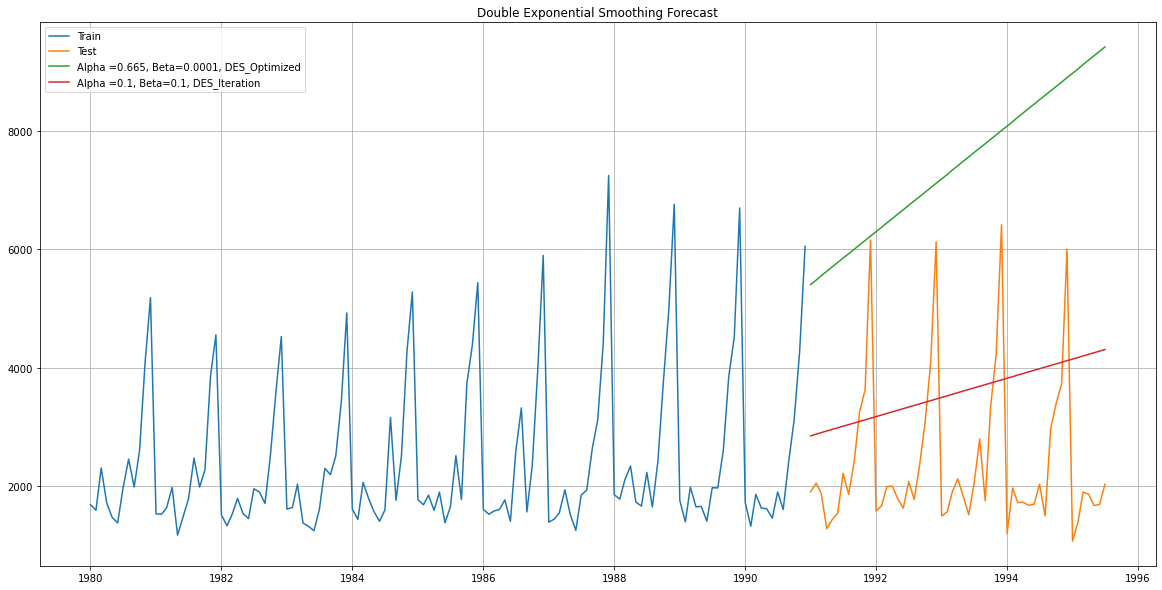

In [99]:
plt.plot(df_train.Sparkling, label='Train')
plt.plot(df_test.Sparkling, label='Test')
plt.plot(df_test.forecast_des_optimized, label='Alpha =0.665, Beta=0.0001, DES_Optimized')
plt.plot(df_test.forecast_des, label='Alpha =0.1, Beta=0.1, DES_Iteration')
plt.legend(loc='best')
plt.grid();
plt.title('Double Exponential Smoothing Forecast');

In [100]:
rmse_des = mean_squared_error(df_test.Sparkling,df_test.forecast_des,squared=False)
rmse_des

1777.7347728870998

## Model 6: Triple Exponential Smoothing with Additive trend & Additive seasonality

#### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [101]:
tes_add_add_optimized = ExponentialSmoothing(df_train.Sparkling,trend='additive',seasonal='additive',initialization_method='estimated').fit(optimized=True)

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [102]:
tes_add_add_optimized.params_formatted

name        param  optimized
smoothing_level     alpha     0.111272       True
smoothing_trend      beta     0.012361       True
smoothing_seasonal  gamma     0.460718       True
initial_level         l.0  2356.577981       True
initial_trend         b.0    -0.102437       True
initial_seasons.0     s.0  -636.233193       True
initial_seasons.1     s.1  -722.983201       True
initial_seasons.2     s.2  -398.644108       True
initial_seasons.3     s.3  -473.430454       True
initial_seasons.4     s.4  -808.424733       True
initial_seasons.5     s.5  -815.349914       True
initial_seasons.6     s.6  -384.230650       True
initial_seasons.7     s.7    72.994844       True
initial_seasons.8     s.8  -237.442260       True
initial_seasons.9     s.9   272.326083       True
initial_seasons.10   s.10  1541.377371       True
initial_seasons.11   s.11  2590.076923       True

In [103]:
df_test['forecast_tes_add_add_optimized'] = tes_add_add_optimized.forecast(steps=len(df_test))

In [104]:
df_test[['Sparkling','forecast_tes_add_add_optimized']].head(10).round(1)

Sparkling  forecast_tes_add_add_optimized
YearMonth                                            
1991-01-01       1902                          1490.4
1991-02-01       2049                          1204.5
1991-03-01       1874                          1688.7
1991-04-01       1279                          1551.2
1991-05-01       1432                          1461.2
1991-06-01       1540                          1278.6
1991-07-01       2214                          1804.9
1991-08-01       1857                          1679.0
1991-09-01       2408                          2315.4
1991-10-01       3252                          3225.0

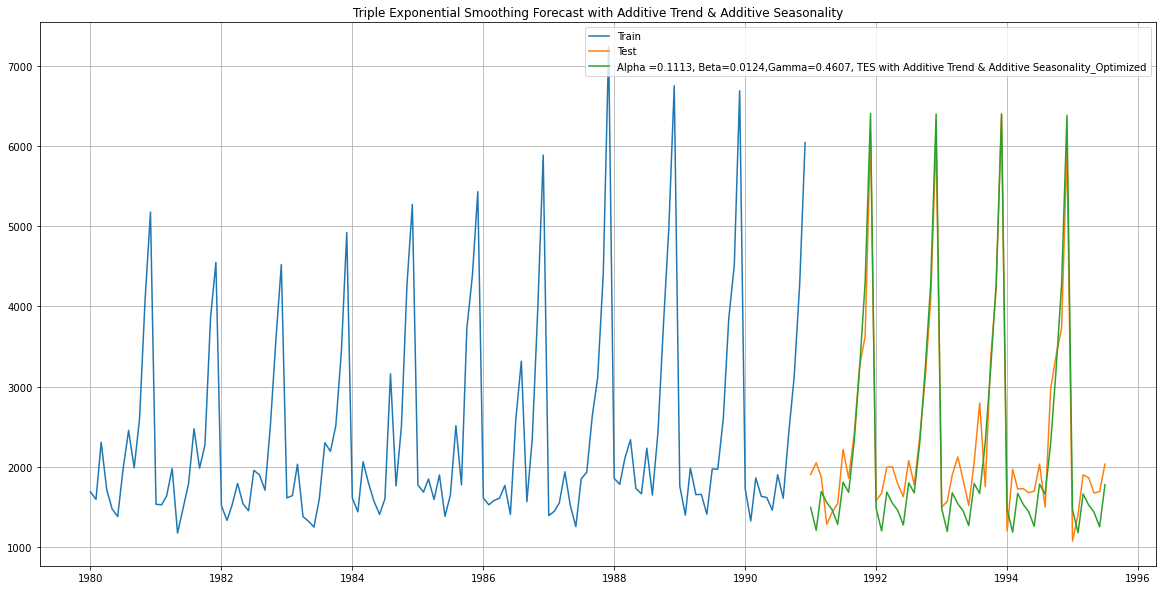

In [105]:
plt.plot(df_train.Sparkling, label='Train')
plt.plot(df_test.Sparkling, label='Test')
plt.plot(df_test.forecast_tes_add_add_optimized, 
         label='Alpha =0.1113, Beta=0.0124,Gamma=0.4607, TES with Additive Trend & Additive Seasonality_Optimized')
plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Forecast with Additive Trend & Additive Seasonality');

In [106]:
rmse_tes_add_add_optimized = mean_squared_error(df_test.Sparkling,df_test.forecast_tes_add_add_optimized,squared=False)
rmse_tes_add_add_optimized

378.95102286703

### Optimizing Alpha, Beta and Gamma based on Test RMSE

In [107]:
results_tes_add_add = pd.DataFrame({'Alpha_Values':[],'Beta Values':[],'Gamma Values':[],'RMSE_Train':[],'RMSE_Test': []})
results_tes_add_add

Empty DataFrame
Columns: [Alpha_Values, Beta Values, Gamma Values, RMSE_Train, RMSE_Test]
Index: []

In [108]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            tes_add_add_iteration=ExponentialSmoothing(df_train.Sparkling,initialization_method='estimated',trend='additive',seasonal='additive').fit(
                smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            rmse_train = mean_squared_error(df_train.Sparkling,tes_add_add_iteration.fittedvalues,squared=False)
            rmse_test = mean_squared_error(df_test.Sparkling,tes_add_add_iteration.forecast(steps=len(df_test)),squared=False)
            results_tes_add_add=results_tes_add_add.append({'Alpha_Values':i, 'Beta Values':j,'Gamma Values':k,'RMSE_Train':rmse_train 
                                      ,'RMSE_Test':rmse_test}, ignore_index=True)
results_tes_add_add

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

Alpha_Values  Beta Values  Gamma Values    RMSE_Train     RMSE_Test
0             0.1          0.1           0.1  4.289336e+02  5.070448e+02
1             0.1          0.1           0.2  4.009490e+02  6.380307e+02
2             0.1          0.1           0.3  3.856796e+02  7.430712e+02
3             0.1          0.1           0.4  3.789580e+02  8.079145e+02
4             0.1          0.1           0.5  3.781684e+02  8.409559e+02
..            ...          ...           ...           ...           ...
995           1.0          1.0           0.6  1.417157e+04  4.624388e+05
996           1.0          1.0           0.7  6.992263e+04  2.250627e+06
997           1.0          1.0           0.8  3.008867e+05  7.323386e+06
998           1.0          1.0           0.9  1.096286e+06  2.612667e+07
999           1.0          1.0           1.0  3.452000e+06  1.068247e+08

[1000 rows x 5 columns]

In [109]:
results_tes_add_add.sort_values(by='RMSE_Test').head().round(1)

Alpha_Values  Beta Values  Gamma Values  RMSE_Train  RMSE_Test
30            0.1          0.4           0.1       451.6      342.9
110           0.2          0.2           0.1       455.0      343.1
156           0.2          0.6           0.7       492.6      348.8
200           0.3          0.1           0.1       454.3      390.8
20            0.1          0.3           0.1       443.2      391.3

### Final TES Model with Additive trend & Additive seasonality

In [110]:
tes_add_add= ExponentialSmoothing(df_train.Sparkling,initialization_method='estimated',trend='additive',seasonal='additive').fit(
    smoothing_level=0.1,smoothing_trend=0.4,smoothing_seasonal=0.1, optimized=False,use_brute=True)

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [111]:
tes_add_add.params_formatted

name        param  optimized
smoothing_level     alpha     0.100000      False
smoothing_trend      beta     0.400000      False
smoothing_seasonal  gamma     0.100000      False
initial_level         l.0  2356.541667      False
initial_trend         b.0    -9.181061      False
initial_seasons.0     s.0  -636.186632      False
initial_seasons.1     s.1  -722.947049      False
initial_seasons.2     s.2  -398.707465      False
initial_seasons.3     s.3  -473.405382      False
initial_seasons.4     s.4  -808.384549      False
initial_seasons.5     s.5  -815.311632      False
initial_seasons.6     s.6  -384.228299      False
initial_seasons.7     s.7    72.948785      False
initial_seasons.8     s.8  -237.394965      False
initial_seasons.9     s.9   272.334201      False
initial_seasons.10   s.10  1541.282118      False
initial_seasons.11   s.11  2590.000868      False

In [112]:
df_test['forecast_tes_add_add'] = tes_add_add.forecast(steps=len(df_test))

In [113]:
df_test[['Sparkling','forecast_tes_add_add_optimized','forecast_tes_add_add']].head(10).round(1)

Sparkling  forecast_tes_add_add_optimized  forecast_tes_add_add
YearMonth                                                                  
1991-01-01       1902                          1490.4                1613.4
1991-02-01       2049                          1204.5                1478.8
1991-03-01       1874                          1688.7                1833.2
1991-04-01       1279                          1551.2                1760.8
1991-05-01       1432                          1461.2                1555.7
1991-06-01       1540                          1278.6                1438.9
1991-07-01       2214                          1804.9                1955.5
1991-08-01       1857                          1679.0                2303.7
1991-09-01       2408                          2315.4                2219.4
1991-10-01       3252                          3225.0                3003.4

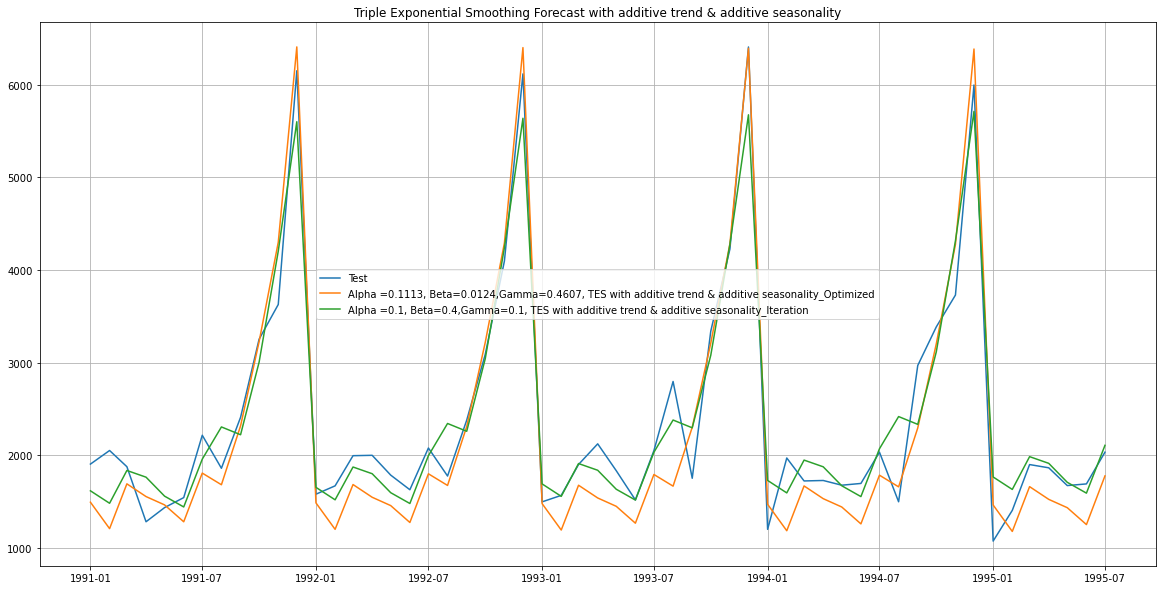

In [114]:
plt.figure(figsize=(20,10))
#plt.plot(df_train.Sparkling, label='Train')
plt.plot(df_test.Sparkling, label='Test')
plt.plot(df_test.forecast_tes_add_add_optimized, 
         label='Alpha =0.1113, Beta=0.0124,Gamma=0.4607, TES with additive trend & additive seasonality_Optimized')
plt.plot(df_test.forecast_tes_add_add, 
         label='Alpha =0.1, Beta=0.4,Gamma=0.1, TES with additive trend & additive seasonality_Iteration')
plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Forecast with additive trend & additive seasonality');

In [115]:
rmse_tes_add_add = mean_squared_error(df_test.Sparkling,df_test.forecast_tes_add_add,squared=False)
rmse_tes_add_add

342.9347159178277

## Model 7: Triple Exponential Smoothing with Additive Trend & Multiplicative Seasonality

In [116]:
tes_add_mult_optimized = ExponentialSmoothing(df_train.Sparkling,initialization_method='estimated',trend='additive',
                                              seasonal='multiplicative').fit(optimized=True)

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [117]:
tes_add_mult_optimized.params_formatted

name        param  optimized
smoothing_level     alpha     0.111338       True
smoothing_trend      beta     0.049505       True
smoothing_seasonal  gamma     0.362080       True
initial_level         l.0  2356.496789       True
initial_trend         b.0   -10.187945       True
initial_seasons.0     s.0     0.712964       True
initial_seasons.1     s.1     0.682422       True
initial_seasons.2     s.2     0.907550       True
initial_seasons.3     s.3     0.805152       True
initial_seasons.4     s.4     0.655972       True
initial_seasons.5     s.5     0.654145       True
initial_seasons.6     s.6     0.886179       True
initial_seasons.7     s.7     1.133451       True
initial_seasons.8     s.8     0.920463       True
initial_seasons.9     s.9     1.213379       True
initial_seasons.10   s.10     1.873403       True
initial_seasons.11   s.11     2.378118       True

In [118]:
df_test['forecast_tes_add_mult_optimized'] = tes_add_mult_optimized.forecast(steps=len(df_test))

In [119]:
df_test[['Sparkling','forecast_tes_add_mult_optimized']].head(10).round(1)

Sparkling  forecast_tes_add_mult_optimized
YearMonth                                             
1991-01-01       1902                           1587.5
1991-02-01       2049                           1356.4
1991-03-01       1874                           1762.9
1991-04-01       1279                           1656.2
1991-05-01       1432                           1542.0
1991-06-01       1540                           1355.1
1991-07-01       2214                           1854.2
1991-08-01       1857                           1820.5
1991-09-01       2408                           2277.0
1991-10-01       3252                           3122.0

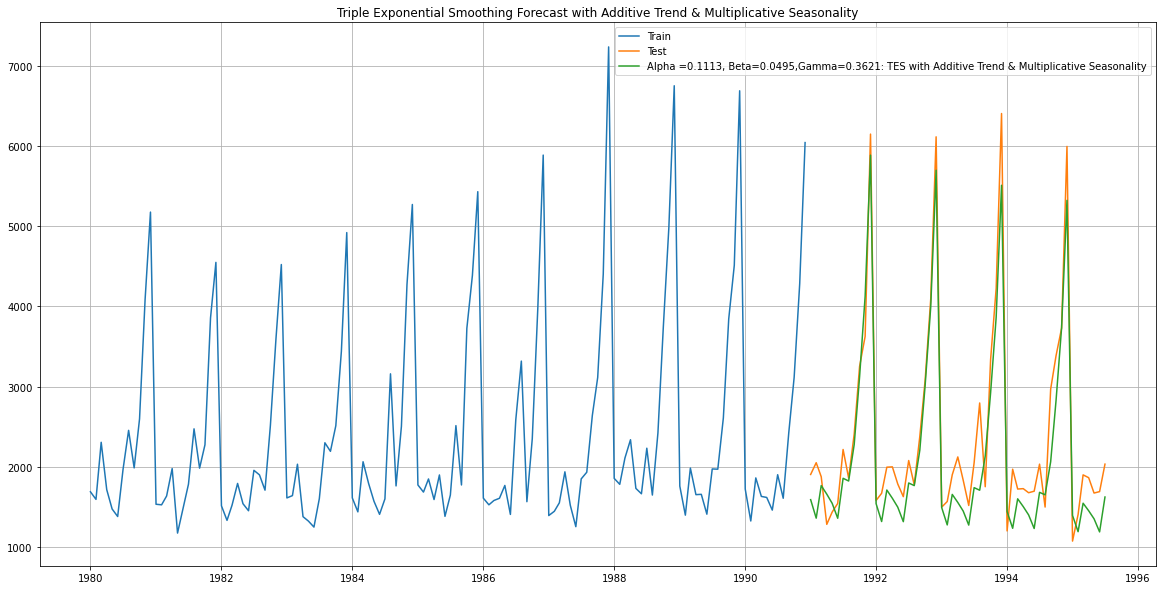

In [120]:
plt.plot(df_train.Sparkling, label='Train')
plt.plot(df_test.Sparkling, label='Test')
plt.plot(df_test.forecast_tes_add_mult_optimized, 
         label='Alpha =0.1113, Beta=0.0495,Gamma=0.3621: TES with Additive Trend & Multiplicative Seasonality')
plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Forecast with Additive Trend & Multiplicative Seasonality');

In [121]:
rmse_tes_add_mult_optimized = mean_squared_error(df_test.Sparkling,df_test.forecast_tes_add_mult_optimized,squared=False)
rmse_tes_add_mult_optimized

404.286809456071

### Optimizing Alpha, Beta and Gamma based on Test RMSE

In [122]:
results_tes_add_mult = pd.DataFrame({'Alpha_Values':[],'Beta Values':[],'Gamma Values':[],'RMSE_Train':[],'RMSE_Test': []})
results_tes_add_mult

Empty DataFrame
Columns: [Alpha_Values, Beta Values, Gamma Values, RMSE_Train, RMSE_Test]
Index: []

In [123]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            tes_add_mult_iteration=ExponentialSmoothing(df_train.Sparkling,initialization_method='estimated',trend='additive',
            seasonal='multiplicative').fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            rmse_train = mean_squared_error(df_train.Sparkling,tes_add_mult_iteration.fittedvalues,squared=False)
            rmse_test = mean_squared_error(df_test.Sparkling,tes_add_mult_iteration.forecast(steps=len(df_test)),squared=False)
            results_tes_add_mult=results_tes_add_mult.append({'Alpha_Values':i, 'Beta Values':j,'Gamma Values':k,'RMSE_Train':rmse_train 
                                      ,'RMSE_Test':rmse_test}, ignore_index=True)
results_tes_add_mult

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

Alpha_Values  Beta Values  Gamma Values    RMSE_Train     RMSE_Test
0             0.1          0.1           0.1  3.814397e+02  5.910387e+02
1             0.1          0.1           0.2  3.677929e+02  6.214407e+02
2             0.1          0.1           0.3  3.614334e+02  6.395595e+02
3             0.1          0.1           0.4  3.607002e+02  6.447910e+02
4             0.1          0.1           0.5  3.644451e+02  6.410980e+02
..            ...          ...           ...           ...           ...
995           1.0          1.0           0.6  1.882994e+05  4.386054e+06
996           1.0          1.0           0.7  2.660015e+05  8.649577e+06
997           1.0          1.0           0.8  1.101923e+06  2.700435e+05
998           1.0          1.0           0.9  7.695708e+04  2.472201e+05
999           1.0          1.0           1.0  2.456050e+04  1.256914e+05

[1000 rows x 5 columns]

In [124]:
results_tes_add_mult.sort_values(by='RMSE_Test').head().round(1)

Alpha_Values  Beta Values  Gamma Values  RMSE_Train  RMSE_Test
301           0.4          0.1           0.2       384.5      317.4
211           0.3          0.2           0.2       388.5      329.0
200           0.3          0.1           0.1       388.2      337.1
110           0.2          0.2           0.1       398.5      340.2
402           0.5          0.1           0.3       396.6      345.9

### Final TES Model with Additive Trend & Multiplicative Seasonality

In [125]:
tes_add_mult= ExponentialSmoothing(df_train.Sparkling,initialization_method='estimated',trend='additive',seasonal='multiplicative').fit(
    smoothing_level=0.4,smoothing_trend=0.1,smoothing_seasonal=0.2, optimized=False,use_brute=True)

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [126]:
tes_add_mult.params_formatted

name        param  optimized
smoothing_level     alpha     0.400000      False
smoothing_trend      beta     0.100000      False
smoothing_seasonal  gamma     0.200000      False
initial_level         l.0  2356.541667      False
initial_trend         b.0    -9.181061      False
initial_seasons.0     s.0     0.711669      False
initial_seasons.1     s.1     0.673093      False
initial_seasons.2     s.2     0.819432      False
initial_seasons.3     s.3     0.784295      False
initial_seasons.4     s.4     0.634248      False
initial_seasons.5     s.5     0.631758      False
initial_seasons.6     s.6     0.826477      False
initial_seasons.7     s.7     1.031811      False
initial_seasons.8     s.8     0.892631      False
initial_seasons.9     s.9     1.123143      False
initial_seasons.10   s.10     1.698726      False
initial_seasons.11   s.11     2.172717      False

In [127]:
df_test['forecast_tes_add_mult'] = tes_add_mult.forecast(steps=len(df_test))

In [128]:
df_test[['Sparkling','forecast_tes_add_mult_optimized','forecast_tes_add_mult']].head(10).round(1)

Sparkling  forecast_tes_add_mult_optimized  forecast_tes_add_mult
YearMonth                                                                    
1991-01-01       1902                           1587.5                 1558.1
1991-02-01       2049                           1356.4                 1425.2
1991-03-01       1874                           1762.9                 1844.1
1991-04-01       1279                           1656.2                 1791.8
1991-05-01       1432                           1542.0                 1658.9
1991-06-01       1540                           1355.1                 1457.6
1991-07-01       2214                           1854.2                 2008.6
1991-08-01       1857                           1820.5                 2194.6
1991-09-01       2408                           2277.0                 2505.0
1991-10-01       3252                           3122.0                 3279.3

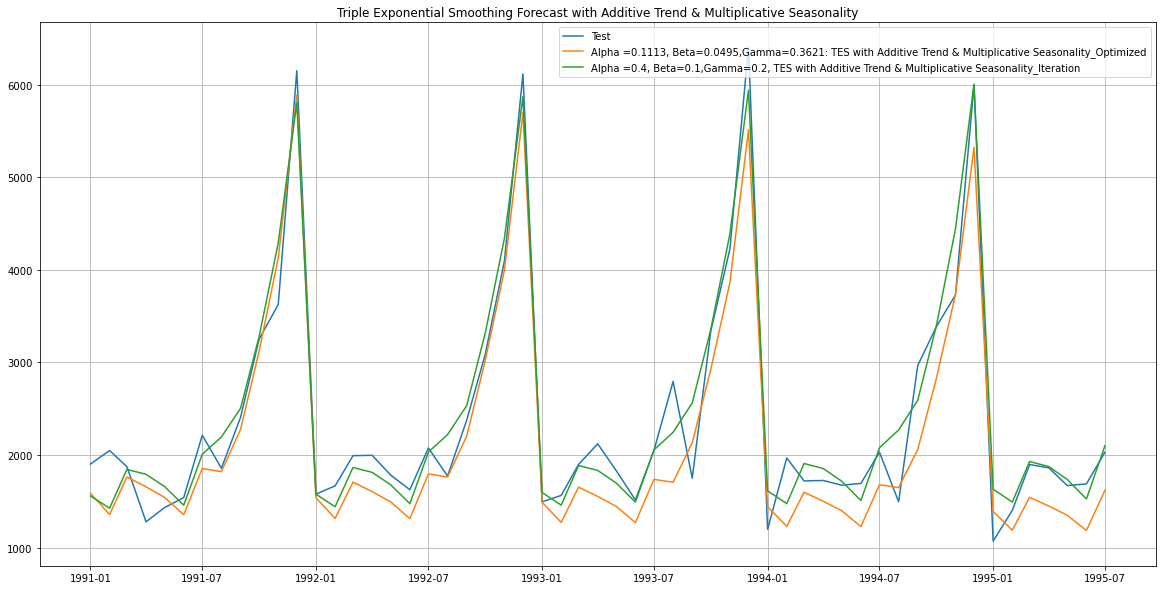

In [129]:
plt.figure(figsize=(20,10))
#plt.plot(df_train.Sparkling, label='Train')
plt.plot(df_test.Sparkling, label='Test')
plt.plot(df_test.forecast_tes_add_mult_optimized, 
         label='Alpha =0.1113, Beta=0.0495,Gamma=0.3621: TES with Additive Trend & Multiplicative Seasonality_Optimized')
plt.plot(df_test.forecast_tes_add_mult, 
         label='Alpha =0.4, Beta=0.1,Gamma=0.2, TES with Additive Trend & Multiplicative Seasonality_Iteration')
plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Forecast with Additive Trend & Multiplicative Seasonality');

In [130]:
rmse_tes_add_mult = mean_squared_error(df_test.Sparkling,df_test.forecast_tes_add_mult,squared=False)
rmse_tes_add_mult

317.43430200265055

## Model 8: Triple Exponential Smoothing with Multiplicative Trend & Multiplicative Seasonality

In [131]:
tes_mult_mult_optimized = ExponentialSmoothing(df_train.Sparkling,initialization_method='estimated',trend='multiplicative',
                                              seasonal='multiplicative').fit(optimized=True)

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [132]:
tes_mult_mult_optimized.params_formatted

name        param  optimized
smoothing_level     alpha     0.111067       True
smoothing_trend      beta     0.049361       True
smoothing_seasonal  gamma     0.362182       True
initial_level         l.0  2360.408980       True
initial_trend         b.0     0.999229       True
initial_seasons.0     s.0     0.719361       True
initial_seasons.1     s.1     0.698470       True
initial_seasons.2     s.2     0.900248       True
initial_seasons.3     s.3     0.809911       True
initial_seasons.4     s.4     0.668210       True
initial_seasons.5     s.5     0.668983       True
initial_seasons.6     s.6     0.878756       True
initial_seasons.7     s.7     1.116488       True
initial_seasons.8     s.8     0.900672       True
initial_seasons.9     s.9     1.172977       True
initial_seasons.10   s.10     1.826879       True
initial_seasons.11   s.11     2.278158       True

In [133]:
df_test['forecast_tes_mult_mult_optimized'] = tes_mult_mult_optimized.forecast(steps=len(df_test))

In [134]:
df_test[['Sparkling','forecast_tes_mult_mult_optimized']].head(10).round(1)

Sparkling  forecast_tes_mult_mult_optimized
YearMonth                                              
1991-01-01       1902                            1591.3
1991-02-01       2049                            1360.4
1991-03-01       1874                            1767.9
1991-04-01       1279                            1661.6
1991-05-01       1432                            1547.4
1991-06-01       1540                            1360.5
1991-07-01       2214                            1862.1
1991-08-01       1857                            1829.5
1991-09-01       2408                            2287.1
1991-10-01       3252                            3137.0

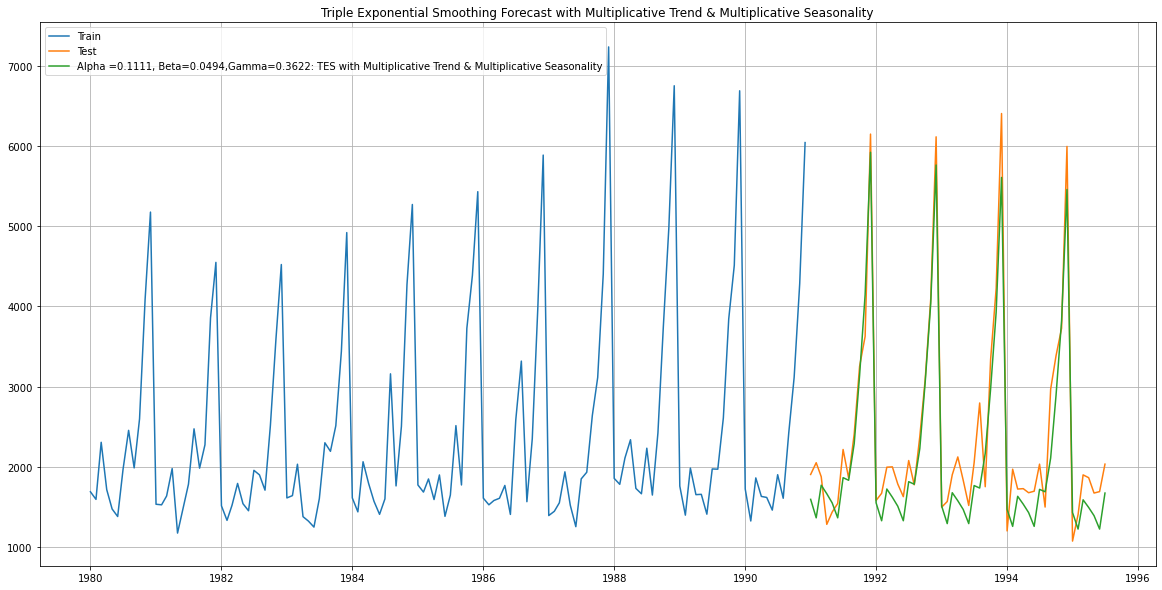

In [135]:
plt.plot(df_train.Sparkling, label='Train')
plt.plot(df_test.Sparkling, label='Test')
plt.plot(df_test.forecast_tes_mult_mult_optimized, 
         label='Alpha =0.1111, Beta=0.0494,Gamma=0.3622: TES with Multiplicative Trend & Multiplicative Seasonality')
plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Forecast with Multiplicative Trend & Multiplicative Seasonality');

In [136]:
rmse_tes_mult_mult_optimized = mean_squared_error(df_test.Sparkling,df_test.forecast_tes_mult_mult_optimized,squared=False)
rmse_tes_mult_mult_optimized

380.3984781419219

### Optimizing Alpha, Beta and Gamma based on Test RMSE

In [137]:
results_tes_mult_mult = pd.DataFrame({'Alpha_Values':[],'Beta Values':[],'Gamma Values':[],'RMSE_Train':[],'RMSE_Test': []})
results_tes_mult_mult

Empty DataFrame
Columns: [Alpha_Values, Beta Values, Gamma Values, RMSE_Train, RMSE_Test]
Index: []

In [138]:
for i in np.arange(0.1,1,0.1):
    for j in np.arange(0.1,1,0.1):
        for k in np.arange(0.1,1,0.1):
            tes_mult_mult_iteration=ExponentialSmoothing(df_train.Sparkling,initialization_method='estimated',trend='multiplicative',
            seasonal='multiplicative').fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            rmse_train = mean_squared_error(df_train.Sparkling,tes_mult_mult_iteration.fittedvalues,squared=False)
            rmse_test = mean_squared_error(df_test.Sparkling,tes_mult_mult_iteration.forecast(steps=len(df_test)),squared=False)
            results_tes_mult_mult=results_tes_mult_mult.append({'Alpha_Values':i, 'Beta Values':j,'Gamma Values':k,'RMSE_Train':rmse_train 
                                      ,'RMSE_Test':rmse_test}, ignore_index=True)
results_tes_mult_mult

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

Alpha_Values  Beta Values  Gamma Values    RMSE_Train      RMSE_Test
0             0.1          0.1           0.1  3.800618e+02   5.439806e+02
1             0.1          0.1           0.2  3.668877e+02   5.614318e+02
2             0.1          0.1           0.3  3.609972e+02   5.730083e+02
3             0.1          0.1           0.4  3.607411e+02   5.767210e+02
4             0.1          0.1           0.5  3.649865e+02   5.743648e+02
..            ...          ...           ...           ...            ...
724           0.9          0.9           0.5  1.884707e+03   2.302948e+03
725           0.9          0.9           0.6  1.348539e+04   3.103205e+24
726           0.9          0.9           0.7  4.644174e+04   8.250337e+54
727           0.9          0.9           0.8  2.408551e+09  2.026941e+151
728           0.9          0.9           0.9  1.696718e+29   1.611188e+13

[729 rows x 5 columns]

In [139]:
results_tes_mult_mult.sort_values(by='RMSE_Test').head().round(1)

Alpha_Values  Beta Values  Gamma Values  RMSE_Train  RMSE_Test
245           0.4          0.1           0.3       381.1      326.6
163           0.3          0.1           0.2       376.0      342.5
90            0.2          0.2           0.1       396.0      345.9
109           0.2          0.4           0.2       401.7      349.4
182           0.3          0.3           0.3       396.7      353.6

### Final TES Model with Additive Multiplicative & Multiplicative Seasonality

In [140]:
tes_mult_mult= ExponentialSmoothing(df_train.Sparkling,initialization_method='estimated',trend='multiplicative',seasonal='multiplicative').fit(
    smoothing_level=0.4,smoothing_trend=0.1,smoothing_seasonal=0.3, optimized=False,use_brute=True)

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [141]:
tes_mult_mult.params_formatted

name        param  optimized
smoothing_level     alpha     0.400000      False
smoothing_trend      beta     0.100000      False
smoothing_seasonal  gamma     0.300000      False
initial_level         l.0  2356.541667      False
initial_trend         b.0     0.996104      False
initial_seasons.0     s.0     0.711669      False
initial_seasons.1     s.1     0.673093      False
initial_seasons.2     s.2     0.819432      False
initial_seasons.3     s.3     0.784295      False
initial_seasons.4     s.4     0.634248      False
initial_seasons.5     s.5     0.631758      False
initial_seasons.6     s.6     0.826477      False
initial_seasons.7     s.7     1.031811      False
initial_seasons.8     s.8     0.892631      False
initial_seasons.9     s.9     1.123143      False
initial_seasons.10   s.10     1.698726      False
initial_seasons.11   s.11     2.172717      False

In [142]:
df_test['forecast_tes_mult_mult'] = tes_mult_mult.forecast(steps=len(df_test))

In [143]:
df_test[['Sparkling','forecast_tes_mult_mult_optimized','forecast_tes_mult_mult']].head(10).round(1)

Sparkling  forecast_tes_mult_mult_optimized  \
YearMonth                                                 
1991-01-01       1902                            1591.3   
1991-02-01       2049                            1360.4   
1991-03-01       1874                            1767.9   
1991-04-01       1279                            1661.6   
1991-05-01       1432                            1547.4   
1991-06-01       1540                            1360.5   
1991-07-01       2214                            1862.1   
1991-08-01       1857                            1829.5   
1991-09-01       2408                            2287.1   
1991-10-01       3252                            3137.0   

            forecast_tes_mult_mult  
YearMonth                           
1991-01-01                  1502.6  
1991-02-01                  1324.1  
1991-03-01                  1761.9  
1991-04-01                  1689.6  
1991-05-01                  1605.2  
1991-06-01                  1410.8  
1991-07-01                  1940.2  
1991-08-01                  1981.5  
1991-09-01                  2533.8  
1991-10-01                  3322.3

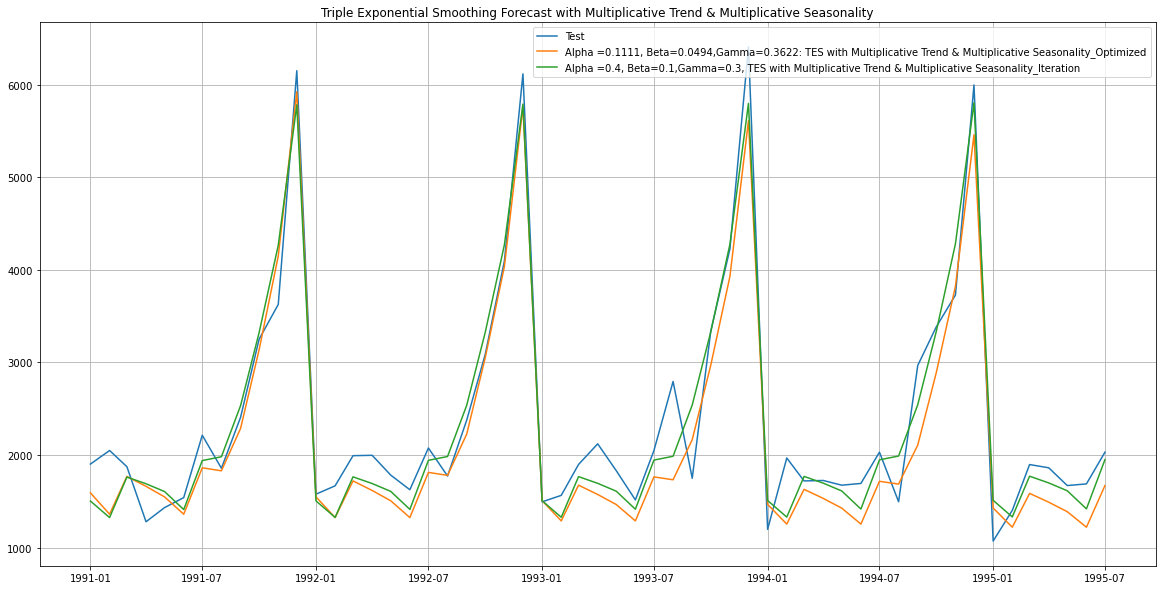

In [144]:
plt.figure(figsize=(20,10))
#plt.plot(df_train.Sparkling, label='Train')
plt.plot(df_test.Sparkling, label='Test')
plt.plot(df_test.forecast_tes_mult_mult_optimized, 
         label='Alpha =0.1111, Beta=0.0494,Gamma=0.3622: TES with Multiplicative Trend & Multiplicative Seasonality_Optimized')
plt.plot(df_test.forecast_tes_mult_mult, 
         label='Alpha =0.4, Beta=0.1,Gamma=0.3, TES with Multiplicative Trend & Multiplicative Seasonality_Iteration')
plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Forecast with Multiplicative Trend & Multiplicative Seasonality');

In [145]:
rmse_tes_mult_mult = mean_squared_error(df_test.Sparkling,df_test.forecast_tes_mult_mult,squared=False)
rmse_tes_mult_mult

326.579641343189

## Model 9: Triple Exponential Smoothing with Multiplicative Trend & Additive Seasonality

In [146]:
tes_mult_add_optimized = ExponentialSmoothing(df_train.Sparkling,initialization_method='estimated',trend='multiplicative',
                                              seasonal='additive').fit(optimized=True)

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [147]:
tes_mult_add_optimized.params_formatted

name        param  optimized
smoothing_level     alpha     0.115477       True
smoothing_trend      beta     0.013339       True
smoothing_seasonal  gamma     0.456513       True
initial_level         l.0  2356.785885       True
initial_trend         b.0     0.999328       True
initial_seasons.0     s.0  -689.980209       True
initial_seasons.1     s.1  -763.373873       True
initial_seasons.2     s.2  -296.370779       True
initial_seasons.3     s.3  -501.803659       True
initial_seasons.4     s.4  -860.477920       True
initial_seasons.5     s.5  -865.976654       True
initial_seasons.6     s.6  -384.335056       True
initial_seasons.7     s.7   141.079459       True
initial_seasons.8     s.8  -307.051009       True
initial_seasons.9     s.9   257.894849       True
initial_seasons.10   s.10  1675.593138       True
initial_seasons.11   s.11  2693.730184       True

In [148]:
df_test['forecast_tes_mult_add_optimized'] = tes_mult_add_optimized.forecast(steps=len(df_test))

In [149]:
df_test[['Sparkling','forecast_tes_mult_add_optimized']].head(10).round(1)

Sparkling  forecast_tes_mult_add_optimized
YearMonth                                             
1991-01-01       1902                           1483.3
1991-02-01       2049                           1199.0
1991-03-01       1874                           1682.8
1991-04-01       1279                           1546.7
1991-05-01       1432                           1456.4
1991-06-01       1540                           1273.8
1991-07-01       2214                           1800.9
1991-08-01       1857                           1678.5
1991-09-01       2408                           2312.0
1991-10-01       3252                           3221.6

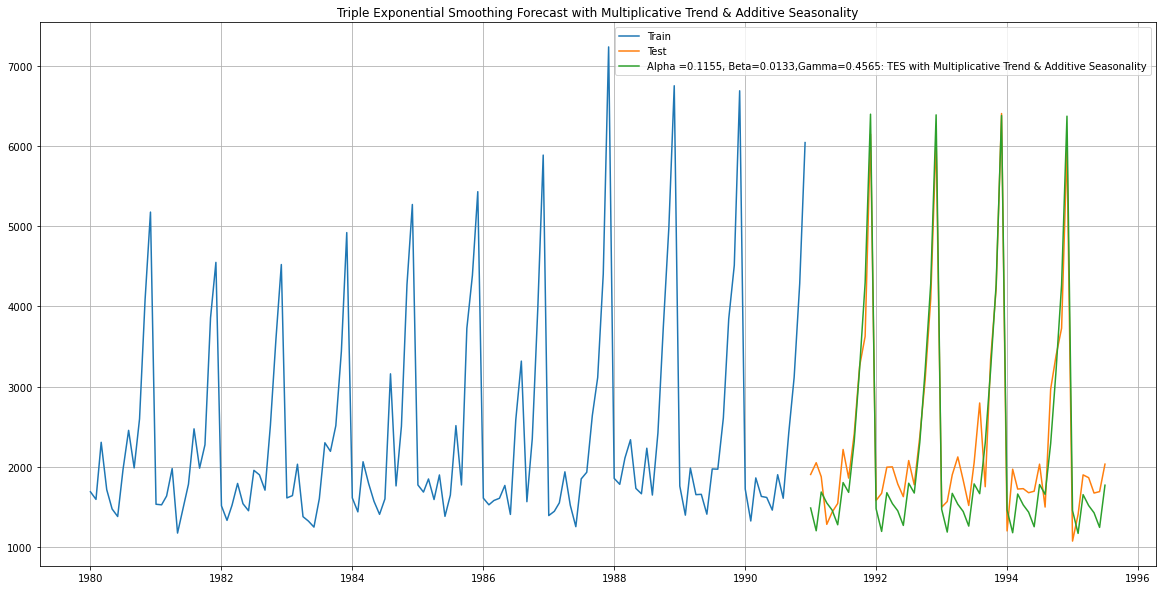

In [150]:
plt.plot(df_train.Sparkling, label='Train')
plt.plot(df_test.Sparkling, label='Test')
plt.plot(df_test.forecast_tes_mult_add_optimized, 
         label='Alpha =0.1155, Beta=0.0133,Gamma=0.4565: TES with Multiplicative Trend & Additive Seasonality')
plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Forecast with Multiplicative Trend & Additive Seasonality');

In [151]:
rmse_tes_mult_add_optimized = mean_squared_error(df_test.Sparkling,df_test.forecast_tes_mult_add_optimized,squared=False)
rmse_tes_mult_add_optimized

381.1905344990122

### Optimizing Alpha, Beta and Gamma based on Test RMSE

In [152]:
results_tes_mult_add = pd.DataFrame({'Alpha_Values':[],'Beta Values':[],'Gamma Values':[],'RMSE_Train':[],'RMSE_Test': []})
results_tes_mult_add

Empty DataFrame
Columns: [Alpha_Values, Beta Values, Gamma Values, RMSE_Train, RMSE_Test]
Index: []

In [153]:
for i in np.arange(0.1,1,0.1):
    for j in np.arange(0.1,1,0.1):
        for k in np.arange(0.1,1,0.1):
            tes_mult_add_iteration=ExponentialSmoothing(df_train.Sparkling,initialization_method='estimated',trend='multiplicative',
            seasonal='additive').fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            rmse_train = mean_squared_error(df_train.Sparkling,tes_mult_add_iteration.fittedvalues,squared=False)
            rmse_test = mean_squared_error(df_test.Sparkling,tes_mult_add_iteration.forecast(steps=len(df_test)),squared=False)
            results_tes_mult_add=results_tes_mult_add.append({'Alpha_Values':i, 'Beta Values':j,'Gamma Values':k,'RMSE_Train':rmse_train 
                                      ,'RMSE_Test':rmse_test}, ignore_index=True)
results_tes_mult_add

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

Alpha_Values  Beta Values  Gamma Values    RMSE_Train      RMSE_Test
0             0.1          0.1           0.1  4.299330e+02   4.646094e+02
1             0.1          0.1           0.2  4.019163e+02   5.679937e+02
2             0.1          0.1           0.3  3.866093e+02   6.548361e+02
3             0.1          0.1           0.4  3.798584e+02   7.096843e+02
4             0.1          0.1           0.5  3.790537e+02   7.386989e+02
..            ...          ...           ...           ...            ...
724           0.9          0.9           0.5  3.445069e+03   7.654216e+03
725           0.9          0.9           0.6  6.687150e+04   3.661015e+07
726           0.9          0.9           0.7  1.284128e+08   2.371203e+69
727           0.9          0.9           0.8  1.733337e+12  1.059654e+150
728           0.9          0.9           0.9  2.169427e+29            inf

[729 rows x 5 columns]

In [154]:
results_tes_mult_add.sort_values(by='RMSE_Test').head().round(1)

Alpha_Values  Beta Values  Gamma Values  RMSE_Train  RMSE_Test
244           0.4          0.1           0.2       440.0      341.7
27            0.1          0.4           0.1       456.9      341.8
81            0.2          0.1           0.1       443.2      356.6
90            0.2          0.2           0.1       458.0      359.6
18            0.1          0.3           0.1       446.6      375.2

### Final TES Model with Additive Trend & Additive Seasonality

In [155]:
tes_mult_add= ExponentialSmoothing(df_train.Sparkling,initialization_method='estimated',trend='multiplicative',seasonal='additive').fit(
    smoothing_level=0.4,smoothing_trend=0.1,smoothing_seasonal=0.2, optimized=False,use_brute=True)

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [156]:
tes_mult_add.params_formatted

name        param  optimized
smoothing_level     alpha     0.400000      False
smoothing_trend      beta     0.100000      False
smoothing_seasonal  gamma     0.200000      False
initial_level         l.0  2356.541667      False
initial_trend         b.0     0.996104      False
initial_seasons.0     s.0  -636.186632      False
initial_seasons.1     s.1  -722.947049      False
initial_seasons.2     s.2  -398.707465      False
initial_seasons.3     s.3  -473.405382      False
initial_seasons.4     s.4  -808.384549      False
initial_seasons.5     s.5  -815.311632      False
initial_seasons.6     s.6  -384.228299      False
initial_seasons.7     s.7    72.948785      False
initial_seasons.8     s.8  -237.394965      False
initial_seasons.9     s.9   272.334201      False
initial_seasons.10   s.10  1541.282118      False
initial_seasons.11   s.11  2590.000868      False

In [157]:
df_test['forecast_tes_mult_add'] = tes_mult_add.forecast(steps=len(df_test))

In [158]:
df_test[['Sparkling','forecast_tes_mult_add_optimized','forecast_tes_mult_add']].head(10).round(1)

Sparkling  forecast_tes_mult_add_optimized  forecast_tes_mult_add
YearMonth                                                                    
1991-01-01       1902                           1483.3                 1265.1
1991-02-01       2049                           1199.0                 1187.8
1991-03-01       1874                           1682.8                 1695.7
1991-04-01       1279                           1546.7                 1693.7
1991-05-01       1432                           1456.4                 1608.5
1991-06-01       1540                           1273.8                 1461.4
1991-07-01       2214                           1800.9                 2034.5
1991-08-01       1857                           1678.5                 2227.7
1991-09-01       2408                           2312.0                 2491.3
1991-10-01       3252                           3221.6                 3281.0

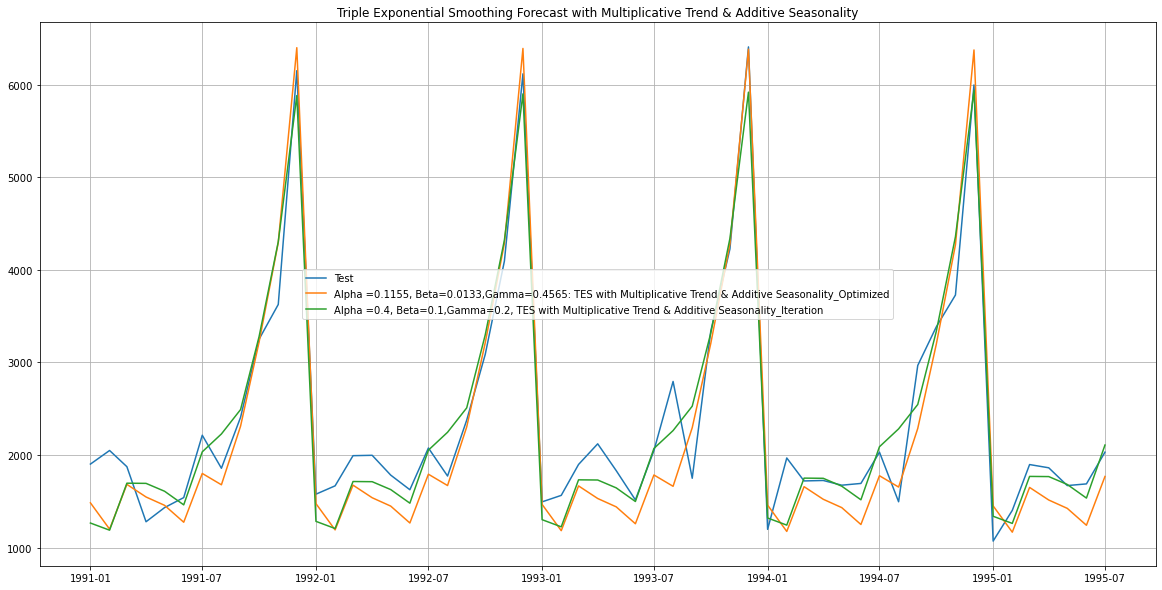

In [159]:
plt.figure(figsize=(20,10))
#plt.plot(df_train.Sparkling, label='Train')
plt.plot(df_test.Sparkling, label='Test')

plt.plot(df_test.forecast_tes_mult_add_optimized, 
         label='Alpha =0.1155, Beta=0.0133,Gamma=0.4565: TES with Multiplicative Trend & Additive Seasonality_Optimized')
plt.plot(df_test.forecast_tes_mult_add, 
         label='Alpha =0.4, Beta=0.1,Gamma=0.2, TES with Multiplicative Trend & Additive Seasonality_Iteration')

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Forecast with Multiplicative Trend & Additive Seasonality');

In [160]:
rmse_tes_mult_add = mean_squared_error(df_test.Sparkling,df_test.forecast_tes_mult_add,squared=False)
rmse_tes_mult_add

341.65352542440655

## Q5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

## Plot the Time Series to understand the behaviour of the data.

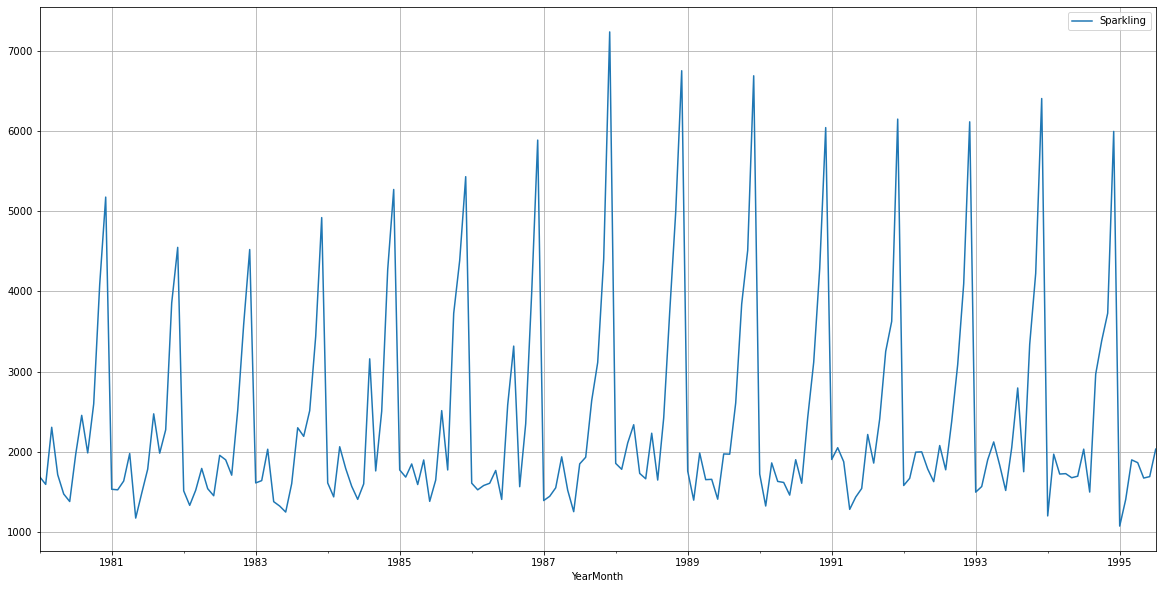

In [161]:
df.plot()
plt.grid()

### Check for Stationarity of Whole Time Series

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [162]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

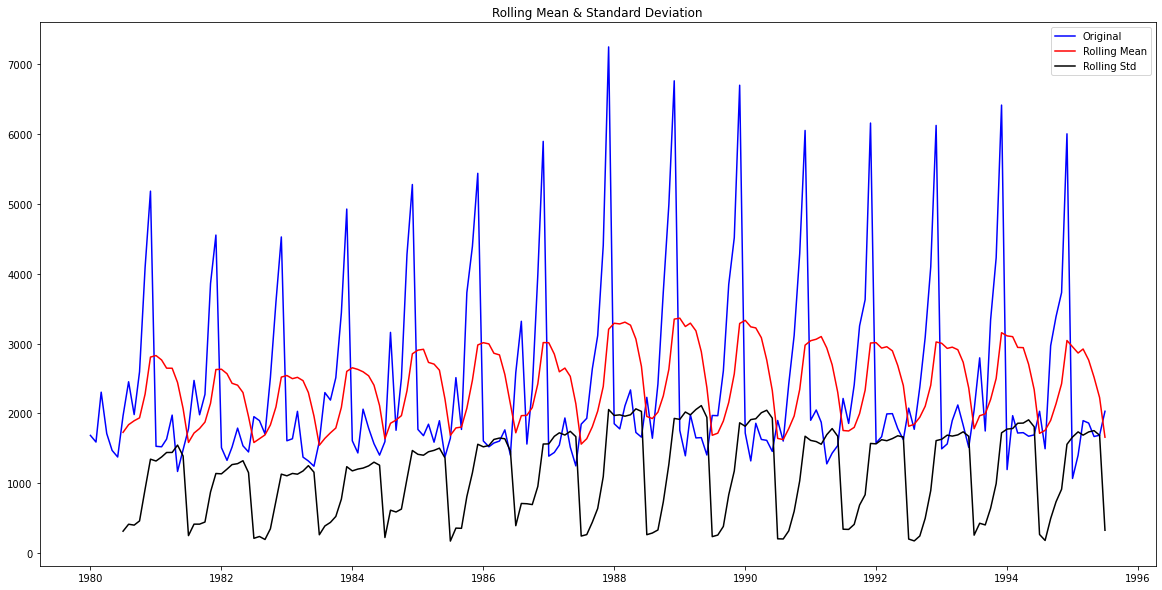

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [163]:
test_stationarity(df)

We see that at 5% significant level the Time Series is non-stationary.

Let us take one level of differencing to see whether the series becomes stationary.

#### On differencing Dataset

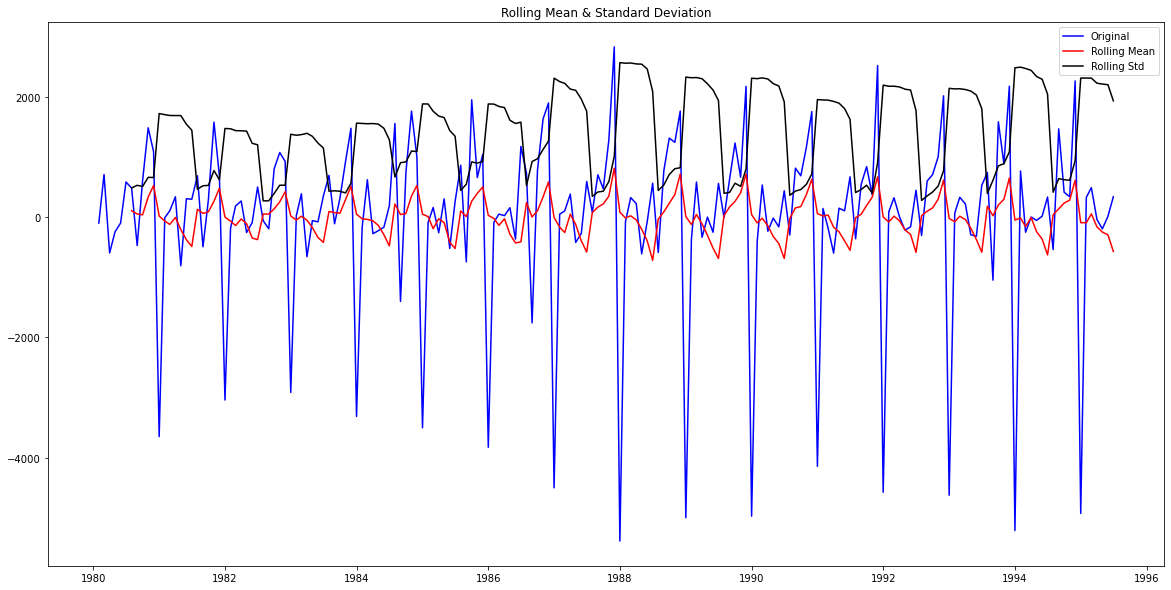

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [164]:
test_stationarity(df.diff().dropna())

Now, let us go ahead and plot the stationary series.

### Plotting Differenced Time Series

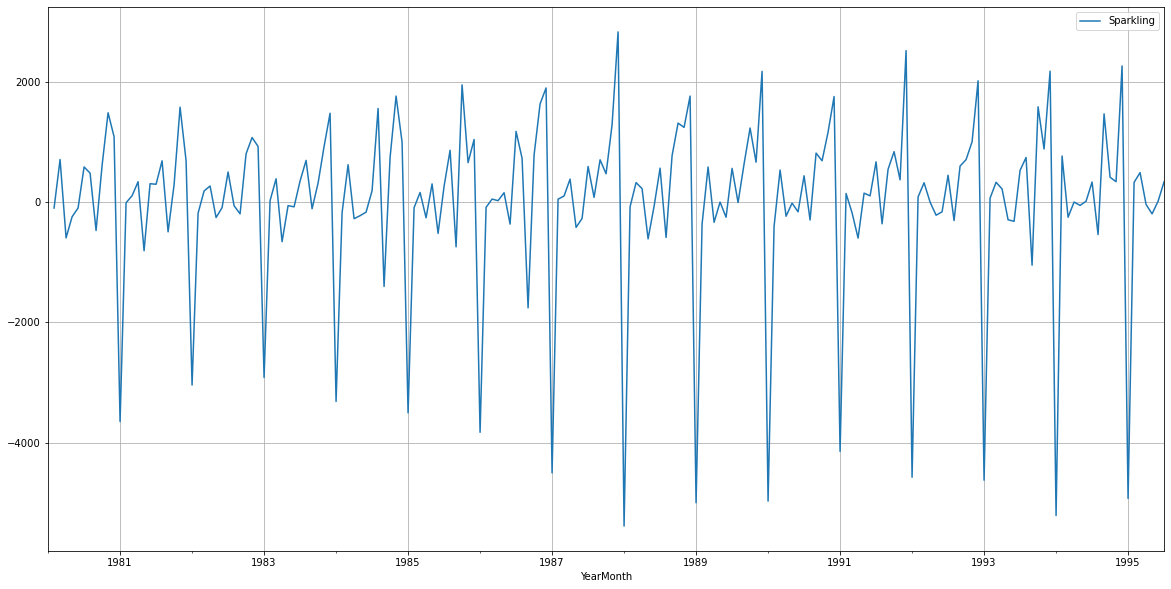

In [165]:
df.diff().plot()
plt.grid()

## Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [166]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

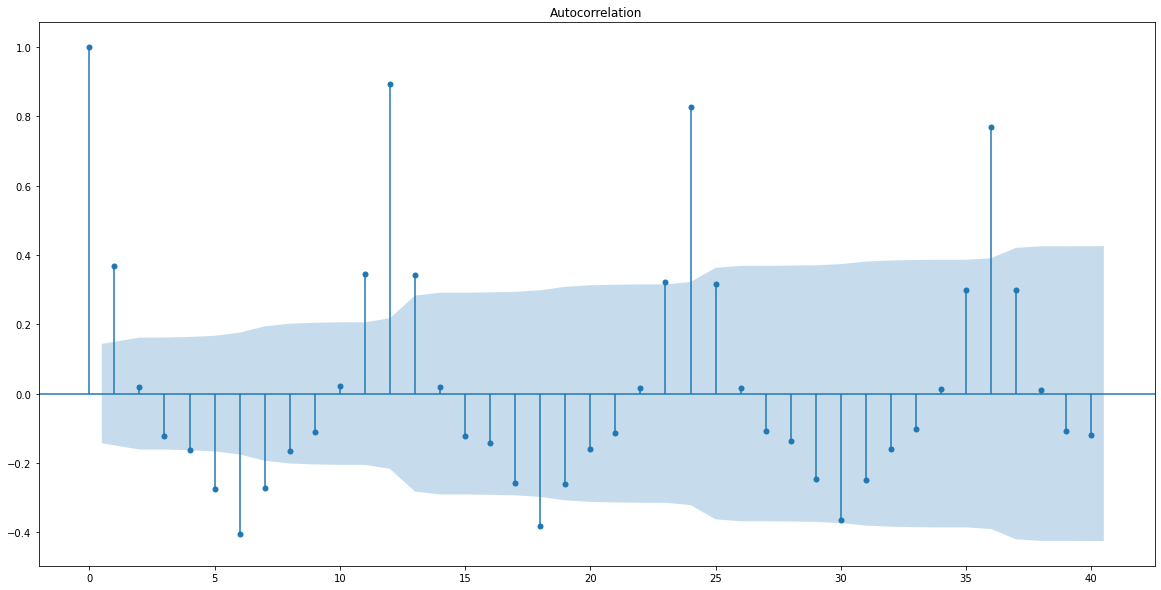

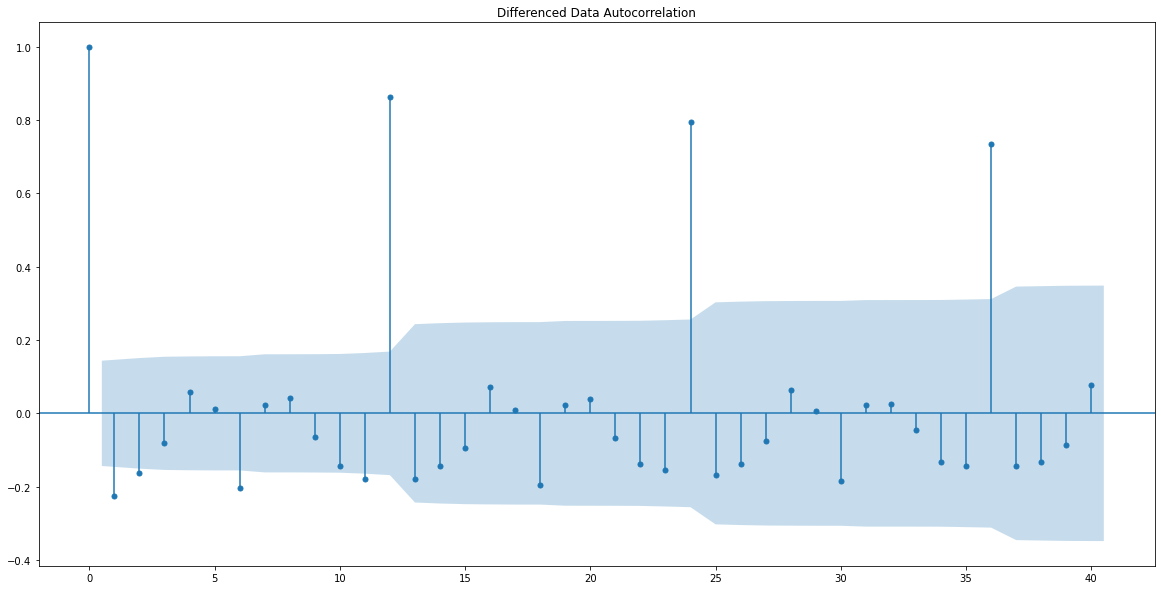

In [167]:
plot_acf(df,alpha=0.05,lags=40);
plot_acf(df.diff().dropna(),alpha=0.05,lags=40,title='Differenced Data Autocorrelation');

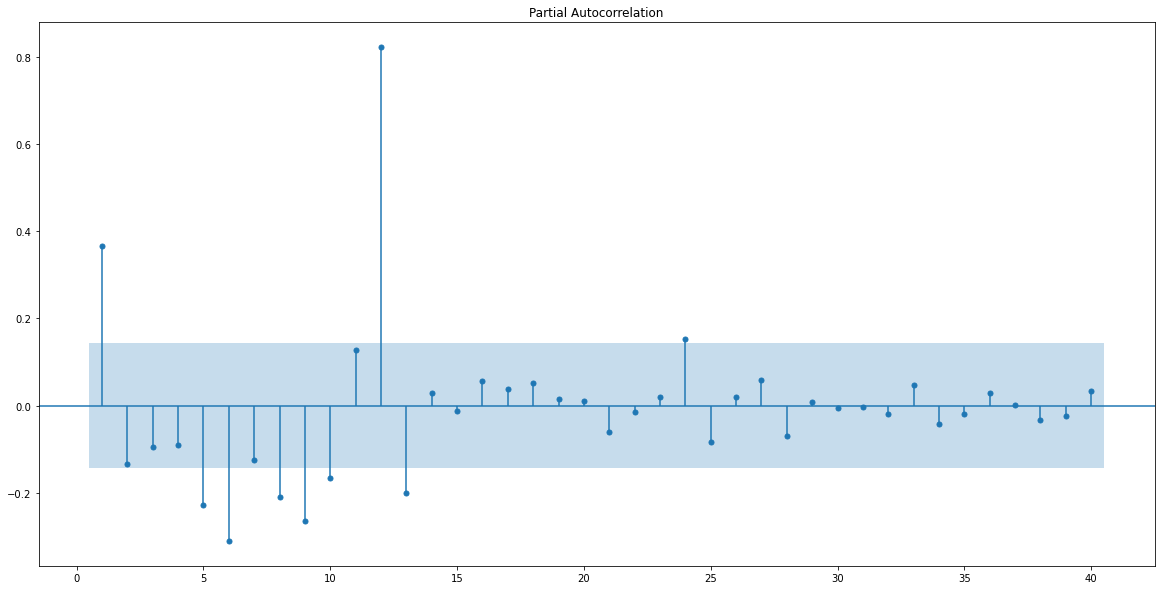

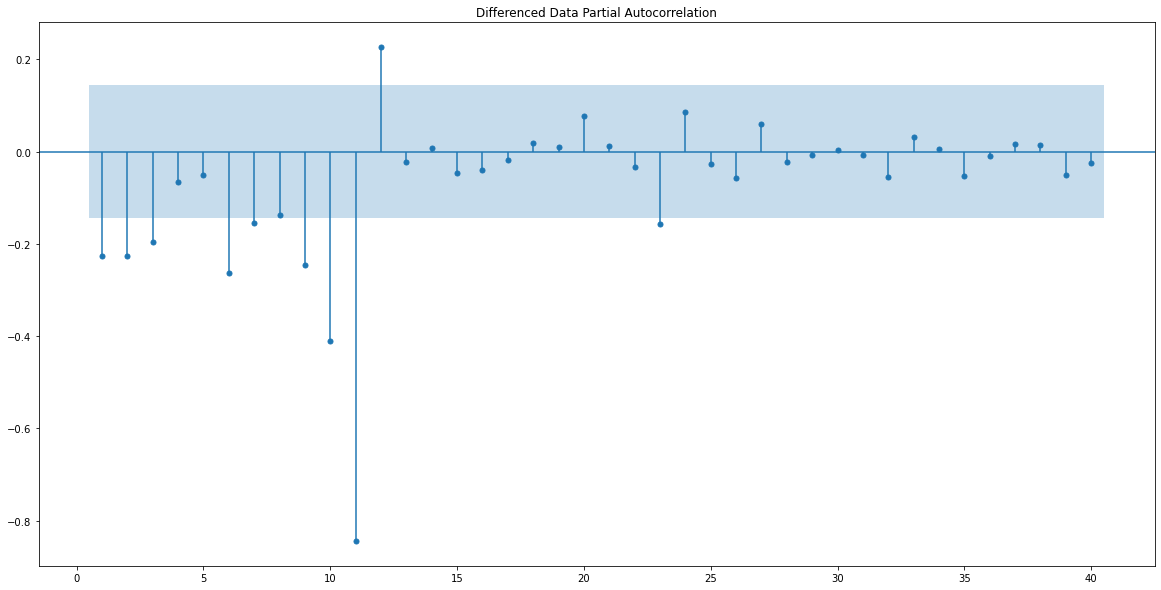

In [168]:
plot_pacf(df,zero=False,alpha=0.05,method='ywmle',lags=40);
plot_pacf(df.diff().dropna(),zero=False,alpha=0.05,method='ywmle',lags=40,
          title='Differenced Data Partial Autocorrelation');

### Check for Stationarity of Train Dataset

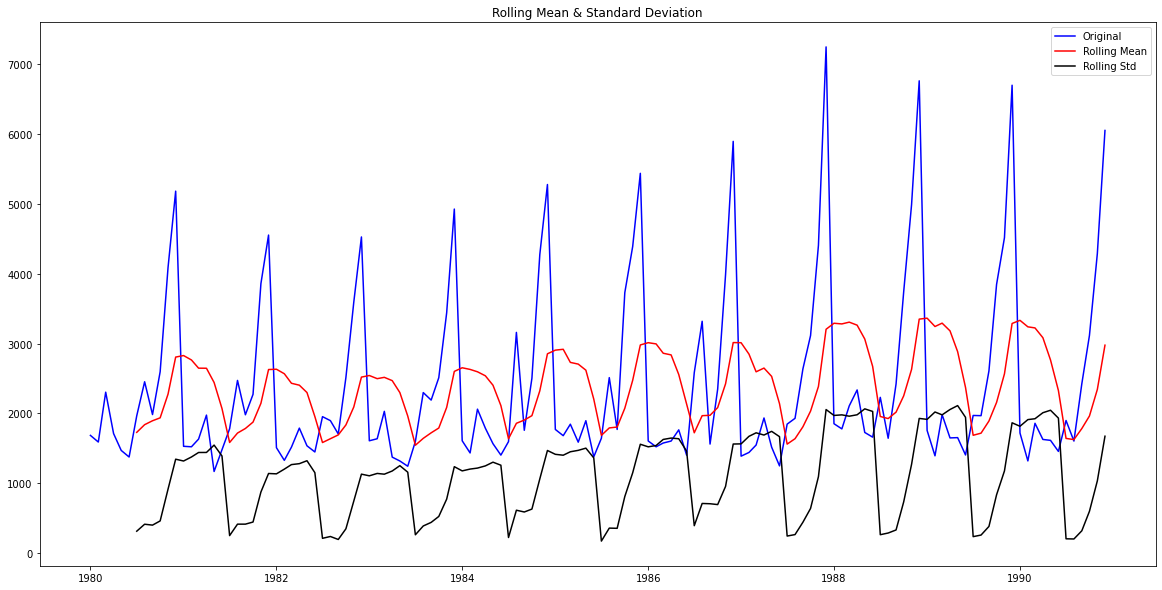

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [169]:
test_stationarity(df_train.Sparkling)

The training data is non-stationary at 95% confidence level. Let us take a first level of differencing to stationarize the Time Series.

#### On differencing Train Dataset

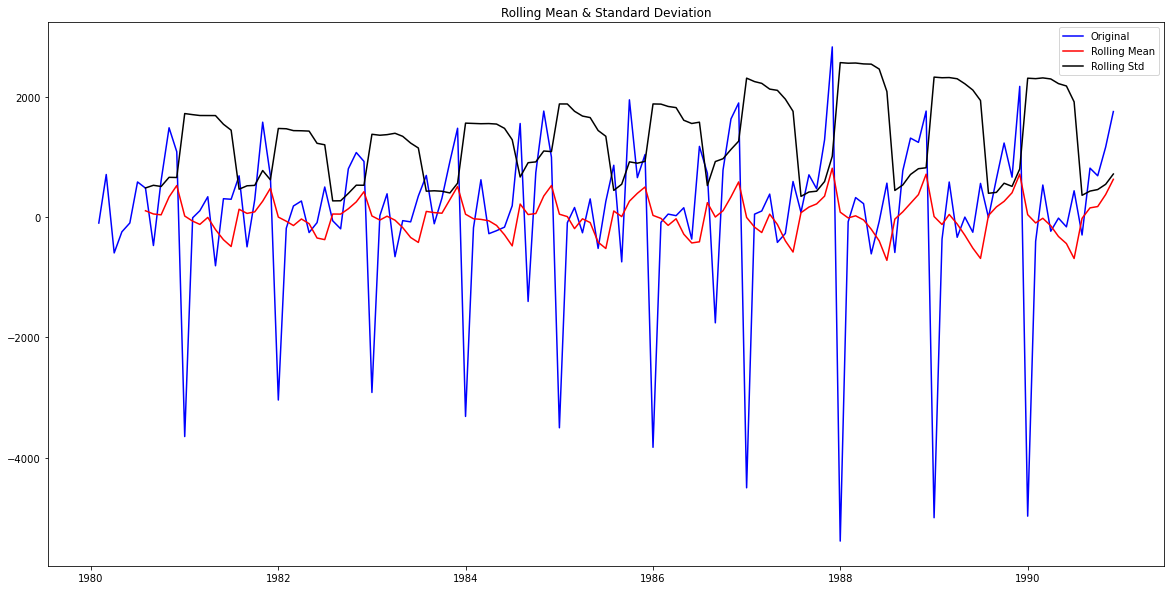

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [170]:
test_stationarity(df_train.Sparkling.diff().dropna())

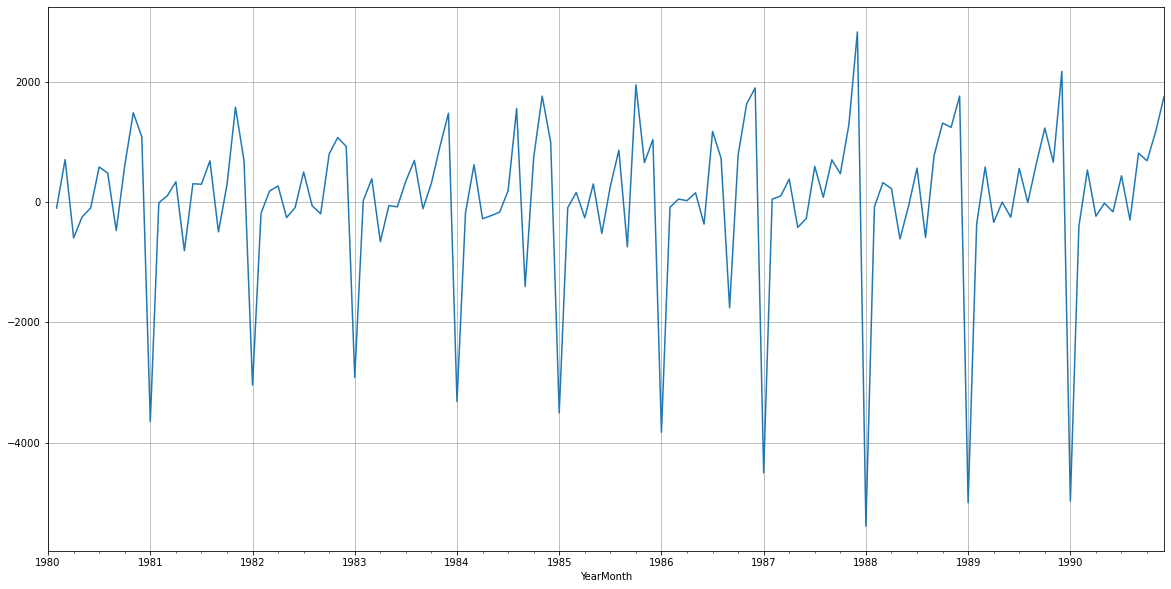

In [171]:
df_train.Sparkling.diff().plot()
plt.grid()

## Q6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

## ARIMA Automated Version

In [172]:
import itertools
p=q=range(0,4)
d=range(1,2)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3)]

In [173]:
for i in pdq:
    print(i, end=", ")

(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 1, 3), 

In [174]:
from statsmodels.tsa.arima.model import ARIMA

In [175]:
ARIMA_AIC=pd.DataFrame(columns=['param','AIC'])

In [176]:
for param in pdq:
    ARIMA_model=ARIMA(df_train.Sparkling,order=param).fit()
    ARIMA_AIC=ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
ARIMA_AIC

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inf

param          AIC
0   (0, 1, 0)  2267.663036
1   (0, 1, 1)  2263.060016
2   (0, 1, 2)  2234.408323
3   (0, 1, 3)  2233.994858
4   (1, 1, 0)  2266.608539
5   (1, 1, 1)  2235.755095
6   (1, 1, 2)  2234.527200
7   (1, 1, 3)  2235.607807
8   (2, 1, 0)  2260.365744
9   (2, 1, 1)  2233.777626
10  (2, 1, 2)  2213.509212
11  (2, 1, 3)  2232.937076
12  (3, 1, 0)  2257.723379
13  (3, 1, 1)  2235.498924
14  (3, 1, 2)  2230.952333
15  (3, 1, 3)  2221.458954

In [177]:
ARIMA_AIC.sort_values(by='AIC').head().round(1)

param     AIC
10  (2, 1, 2)  2213.5
15  (3, 1, 3)  2221.5
14  (3, 1, 2)  2231.0
11  (2, 1, 3)  2232.9
9   (2, 1, 1)  2233.8

In [178]:
ARIMA_auto=ARIMA(df_train.Sparkling,order=(2, 1, 2)).fit()
ARIMA_auto.summary()

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 16 Jan 2022   AIC                           2213.509
Time:                        16:59:43   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.781      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.741      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.218      0.000      -2.206      -1.777
ma.L2          0.9999      0.110      9.109      0.000       0.785       1.215
sigma2      1.099e+06   1.99e-07   5.51e+12      0.000     1.1e+06     1.1e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                14.46
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               2.43   Skew:                             0.61
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.46e+27. Standard errors may be unstable.
"""

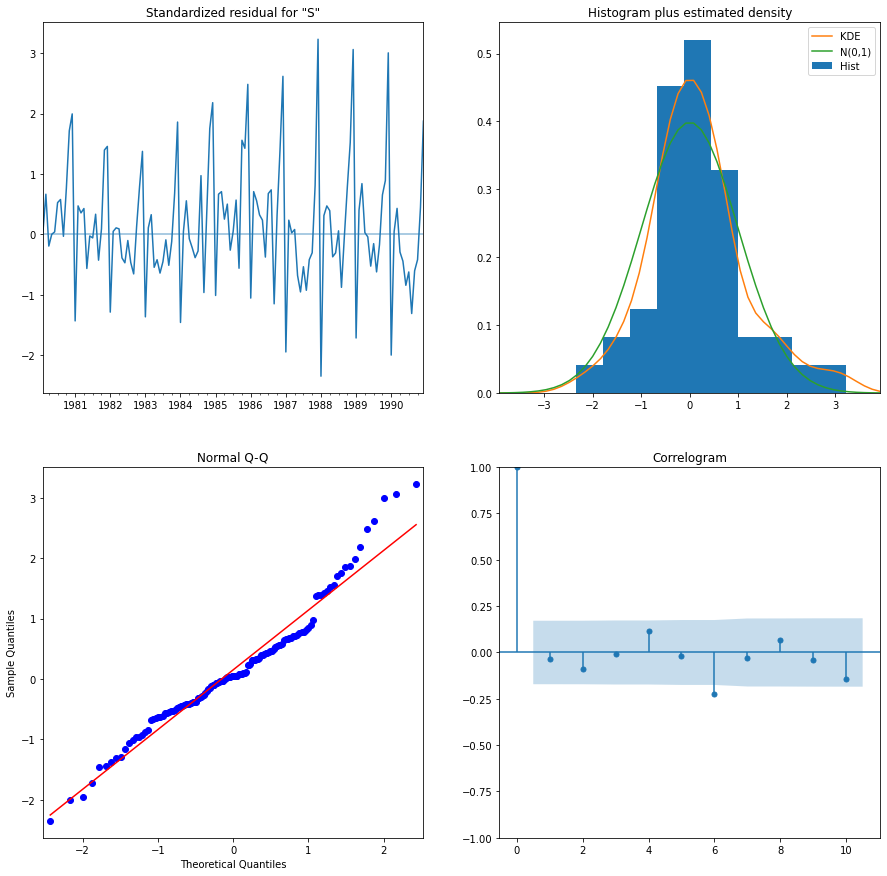

In [179]:
ARIMA_auto.plot_diagnostics(figsize=(15,15));

### Forecast on Test Dataset

In [180]:
df_test['forecast_ARIMA_auto']=ARIMA_auto.forecast(len(df_test))

In [181]:
df_test[['Sparkling','forecast_ARIMA_auto']].head(10).round(1)

Sparkling  forecast_ARIMA_auto
YearMonth                                 
1991-01-01       1902               4252.3
1991-02-01       2049               2863.1
1991-03-01       1874               2044.0
1991-04-01       1279               1746.2
1991-05-01       1432               1813.6
1991-06-01       1540               2068.6
1991-07-01       2214               2365.5
1991-08-01       1857               2612.5
1991-09-01       2408               2770.4
1991-10-01       3252               2839.5

In [182]:
from sklearn.metrics import mean_squared_error

In [183]:
rmse_ARIMA_auto=mean_squared_error(df_test.Sparkling,df_test.forecast_ARIMA_auto,squared=False)
rmse_ARIMA_auto

1299.9796397916396

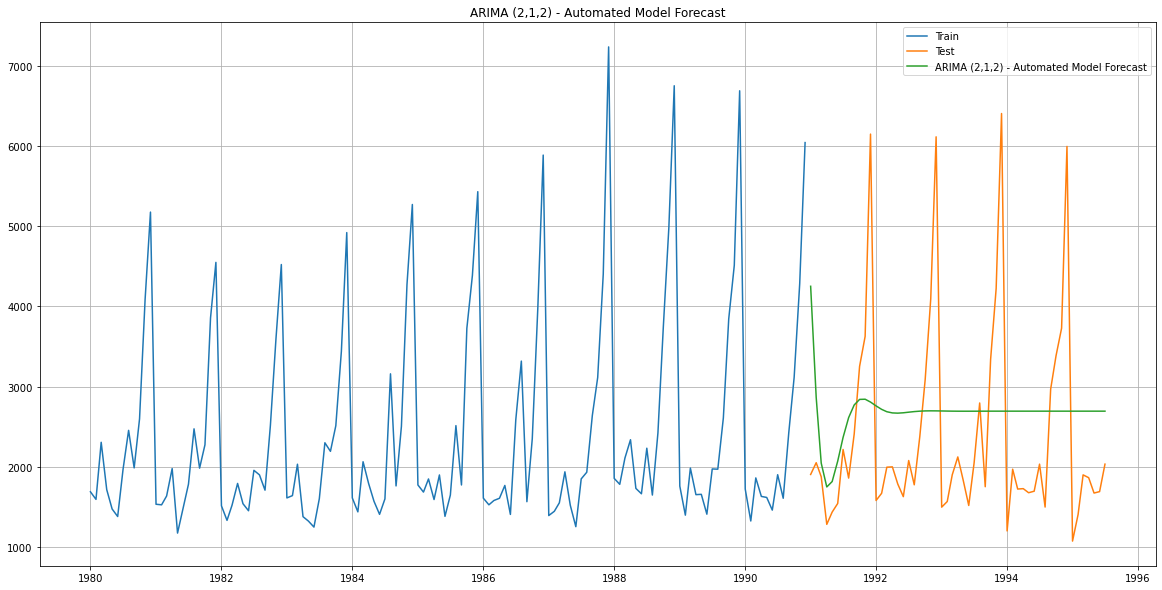

In [184]:
plt.figure(figsize=(20,10))
plt.plot(df_train.Sparkling, label='Train')
plt.plot(df_test.Sparkling, label='Test')
plt.plot(df_test.forecast_ARIMA_auto, 
         label='ARIMA (2,1,2) - Automated Model Forecast')
plt.legend(loc='best')
plt.grid()
plt.title('ARIMA (2,1,2) - Automated Model Forecast');

## SARIMA - Automated Version

In [185]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,2)
pdq=list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
display(pdq)
display(PDQ)

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3)]

[(0, 0, 0, 6),
 (0, 0, 1, 6),
 (0, 0, 2, 6),
 (0, 0, 3, 6),
 (0, 1, 0, 6),
 (0, 1, 1, 6),
 (0, 1, 2, 6),
 (0, 1, 3, 6),
 (1, 0, 0, 6),
 (1, 0, 1, 6),
 (1, 0, 2, 6),
 (1, 0, 3, 6),
 (1, 1, 0, 6),
 (1, 1, 1, 6),
 (1, 1, 2, 6),
 (1, 1, 3, 6),
 (2, 0, 0, 6),
 (2, 0, 1, 6),
 (2, 0, 2, 6),
 (2, 0, 3, 6),
 (2, 1, 0, 6),
 (2, 1, 1, 6),
 (2, 1, 2, 6),
 (2, 1, 3, 6),
 (3, 0, 0, 6),
 (3, 0, 1, 6),
 (3, 0, 2, 6),
 (3, 0, 3, 6),
 (3, 1, 0, 6),
 (3, 1, 1, 6),
 (3, 1, 2, 6),
 (3, 1, 3, 6)]

In [200]:
for i in pdq:
    print(i, end=", ")

(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 1, 3), 

In [201]:
for i in PDQ:
    print(i, end=", ")

(0, 0, 0, 6), (0, 0, 1, 6), (0, 0, 2, 6), (0, 0, 3, 6), (0, 1, 0, 6), (0, 1, 1, 6), (0, 1, 2, 6), (0, 1, 3, 6), (1, 0, 0, 6), (1, 0, 1, 6), (1, 0, 2, 6), (1, 0, 3, 6), (1, 1, 0, 6), (1, 1, 1, 6), (1, 1, 2, 6), (1, 1, 3, 6), (2, 0, 0, 6), (2, 0, 1, 6), (2, 0, 2, 6), (2, 0, 3, 6), (2, 1, 0, 6), (2, 1, 1, 6), (2, 1, 2, 6), (2, 1, 3, 6), (3, 0, 0, 6), (3, 0, 1, 6), (3, 0, 2, 6), (3, 0, 3, 6), (3, 1, 0, 6), (3, 1, 1, 6), (3, 1, 2, 6), (3, 1, 3, 6), 

In [186]:
SARIMA_AIC = pd.DataFrame(columns=['param','param_seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, param_seasonal, AIC]
Index: []

In [187]:
import statsmodels.api as sm

In [188]:
for i in pdq:
    for j in PDQ:
        SARIMA_model=sm.tsa.statespace.SARIMAX(df_train.Sparkling,order=i,seasonal_order=j,
                                              enforce_stationarity=False,enforce_invertibility=False).fit(maxiter=1000)
        SARIMA_AIC = SARIMA_AIC.append({'param':i,'param_seasonal':j ,'AIC': SARIMA_model.aic}, 
                                       ignore_index=True)
SARIMA_AIC       

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

param param_seasonal          AIC
0    (0, 1, 0)   (0, 0, 0, 6)  2251.359720
1    (0, 1, 0)   (0, 0, 1, 6)  2152.378076
2    (0, 1, 0)   (0, 0, 2, 6)  1955.635554
3    (0, 1, 0)   (0, 0, 3, 6)  1863.784515
4    (0, 1, 0)   (0, 1, 0, 6)  2262.983524
..         ...            ...          ...
507  (3, 1, 3)   (3, 0, 3, 6)  1636.571910
508  (3, 1, 3)   (3, 1, 0, 6)  1567.544890
509  (3, 1, 3)   (3, 1, 1, 6)  1568.248460
510  (3, 1, 3)   (3, 1, 2, 6)  1566.214002
511  (3, 1, 3)   (3, 1, 3, 6)  1552.438672

[512 rows x 3 columns]

In [203]:
SARIMA_AIC.sort_values(by='AIC').head().round(1)

param param_seasonal     AIC
375  (2, 1, 3)   (2, 1, 3, 6)  1540.9
495  (3, 1, 3)   (1, 1, 3, 6)  1541.0
111  (0, 1, 3)   (1, 1, 3, 6)  1544.0
503  (3, 1, 3)   (2, 1, 3, 6)  1544.7
239  (1, 1, 3)   (1, 1, 3, 6)  1544.9

In [190]:
SARIMA_auto=sm.tsa.statespace.SARIMAX(df_train.Sparkling,order=(2,1,3),seasonal_order=(2,1,3,6),
                                              enforce_stationarity=False,enforce_invertibility=False).fit(maxiter=1000)

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [191]:
SARIMA_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                         Sparkling   No. Observations:                  132
Model:             SARIMAX(2, 1, 3)x(2, 1, 3, 6)   Log Likelihood                -759.447
Date:                           Sun, 16 Jan 2022   AIC                           1540.893
Time:                                   17:14:28   BIC                           1569.875
Sample:                               01-01-1980   HQIC                          1552.632
                                    - 12-01-1990                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7472      0.066    -26.431      0.000      -1.877      -1.618
ar.L2         -0.7890      0.072    -10.911      0.000      -0.931      -0.647
ma.L1          1.0811      0.300      3.601      0.000       0.493       1.669
ma.L2         -0.7653      0.127     -6.018      0.000      -1.015      -0.516
ma.L3         -0.8964      0.272     -3.301      0.001      -1.429      -0.364
ar.S.L6       -1.0887      0.673     -1.617      0.106      -2.408       0.231
ar.S.L12      -0.0656      0.693     -0.095      0.925      -1.423       1.292
ma.S.L6        0.4196      0.650      0.645      0.519      -0.855       1.694
ma.S.L12      -0.6923      0.335     -2.068      0.039      -1.348      -0.036
ma.S.L18       0.0774      0.522      0.148      0.882      -0.946       1.101
sigma2       1.13e+05   4.52e-06    2.5e+10      0.000    1.13e+05    1.13e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                12.52
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.37   Skew:                             0.41
Prob(H) (two-sided):                  0.37   Kurtosis:                         4.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.4e+26. Standard errors may be unstable.
"""

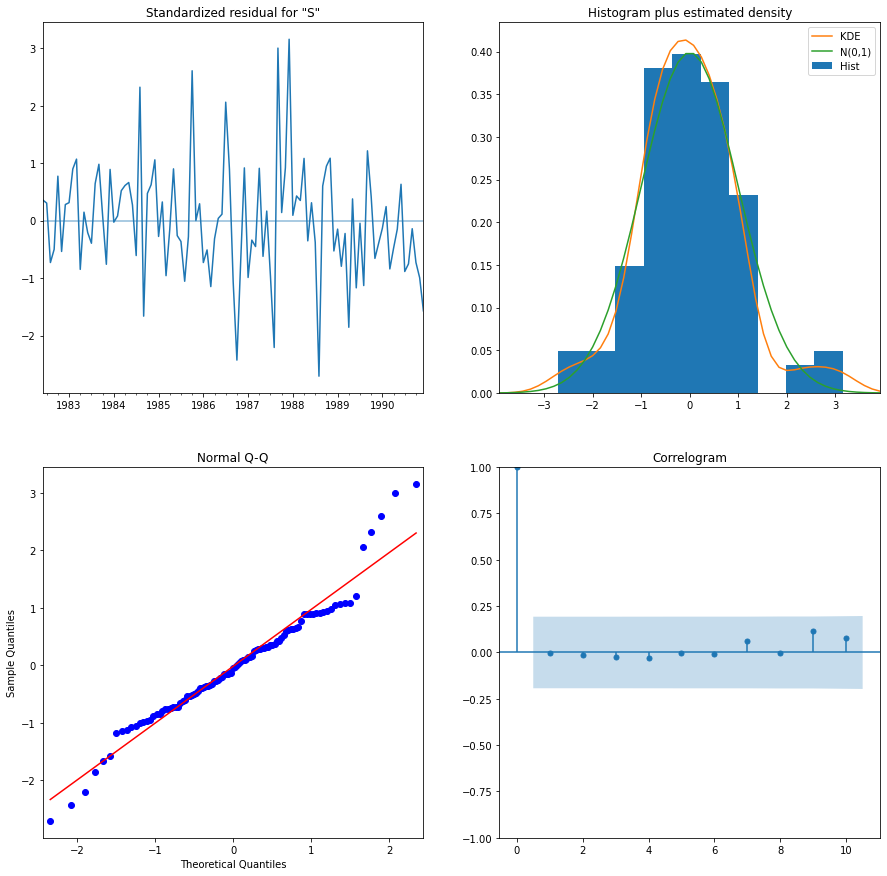

In [192]:
SARIMA_auto.plot_diagnostics(figsize=(15,15));

### Prediction on Test Dataset

In [193]:
df_test['forecast_SARIMA_auto']=SARIMA_auto.forecast(steps=len(df_test))

In [194]:
df_test[['Sparkling','forecast_ARIMA_auto','forecast_SARIMA_auto']].head(10).round(1)

Sparkling  forecast_ARIMA_auto  forecast_SARIMA_auto
YearMonth                                                       
1991-01-01       1902               4252.3                1402.7
1991-02-01       2049               2863.1                1010.0
1991-03-01       1874               2044.0                1703.2
1991-04-01       1279               1746.2                1590.4
1991-05-01       1432               1813.6                1162.4
1991-06-01       1540               2068.6                 983.7
1991-07-01       2214               2365.5                1710.8
1991-08-01       1857               2612.5                1704.2
1991-09-01       2408               2770.4                2143.5
1991-10-01       3252               2839.5                3138.9

In [195]:
rmse_SARIMA_auto=mean_squared_error(df_test.Sparkling,df_test.forecast_SARIMA_auto,squared=False)
rmse_SARIMA_auto

784.1022875135977

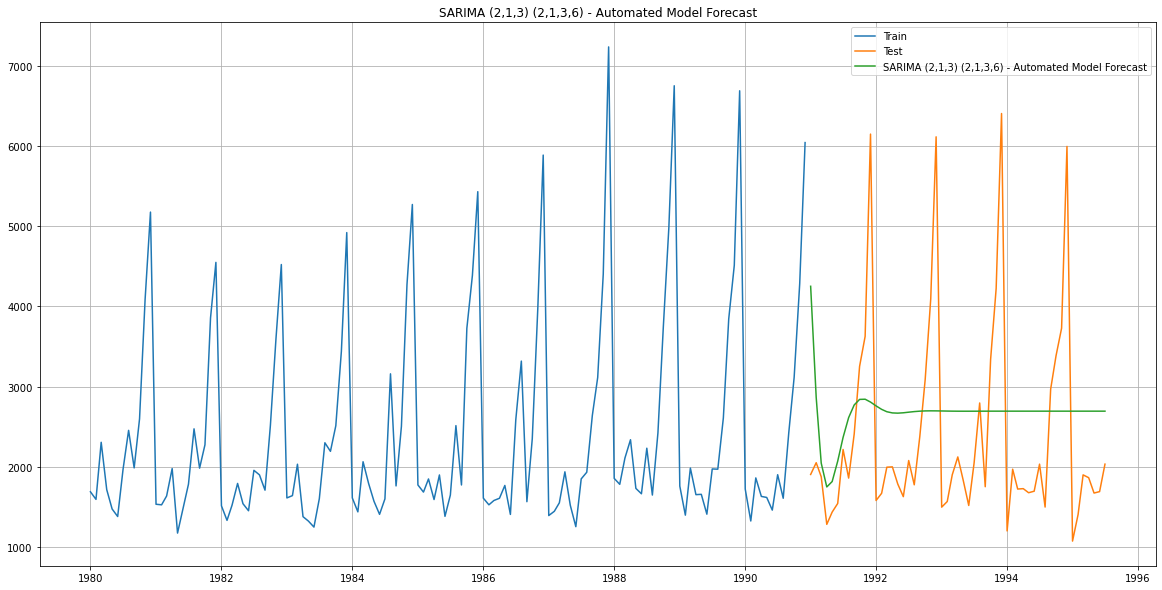

In [196]:
plt.figure(figsize=(20,10))
plt.plot(df_train.Sparkling, label='Train')
plt.plot(df_test.Sparkling, label='Test')
plt.plot(df_test.forecast_ARIMA_auto, 
         label='SARIMA (2,1,3) (2,1,3,6) - Automated Model Forecast')
plt.legend(loc='best')
plt.grid()
plt.title('SARIMA (2,1,3) (2,1,3,6) - Automated Model Forecast');

## Q7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

## ARIMA - ACF and PACF Plots Method

In [204]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

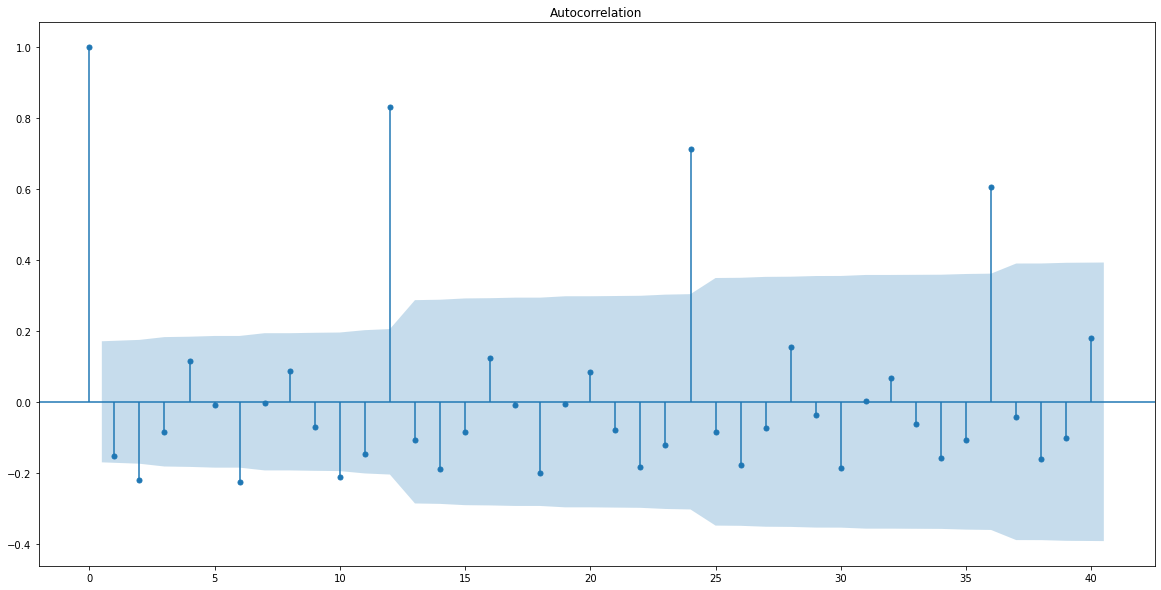

In [205]:
plot_acf(df_train.Sparkling.diff(),missing='drop',lags=40)
plt.show()

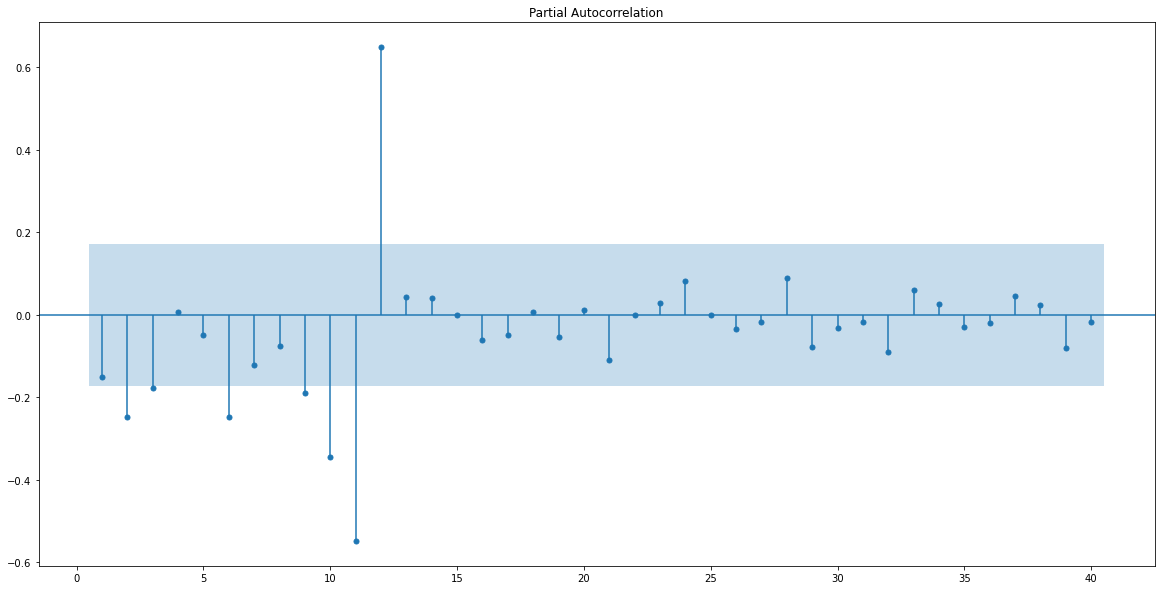

In [206]:
plot_pacf(df_train.Sparkling.diff().dropna(),zero=False,alpha=0.05,method='ywmle',lags=40)
plt.show()

In [207]:
ARIMA_manual=ARIMA(df_train.Sparkling,order=(0, 1, 0)).fit()
ARIMA_manual.summary()

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1132.832
Date:                Sun, 16 Jan 2022   AIC                           2267.663
Time:                        18:20:01   BIC                           2270.538
Sample:                    01-01-1980   HQIC                          2268.831
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.885e+06   1.29e+05     14.658      0.000    1.63e+06    2.14e+06
===================================================================================
Ljung-Box (L1) (Q):                   3.07   Jarque-Bera (JB):               198.83
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):               2.46   Skew:                            -1.92
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

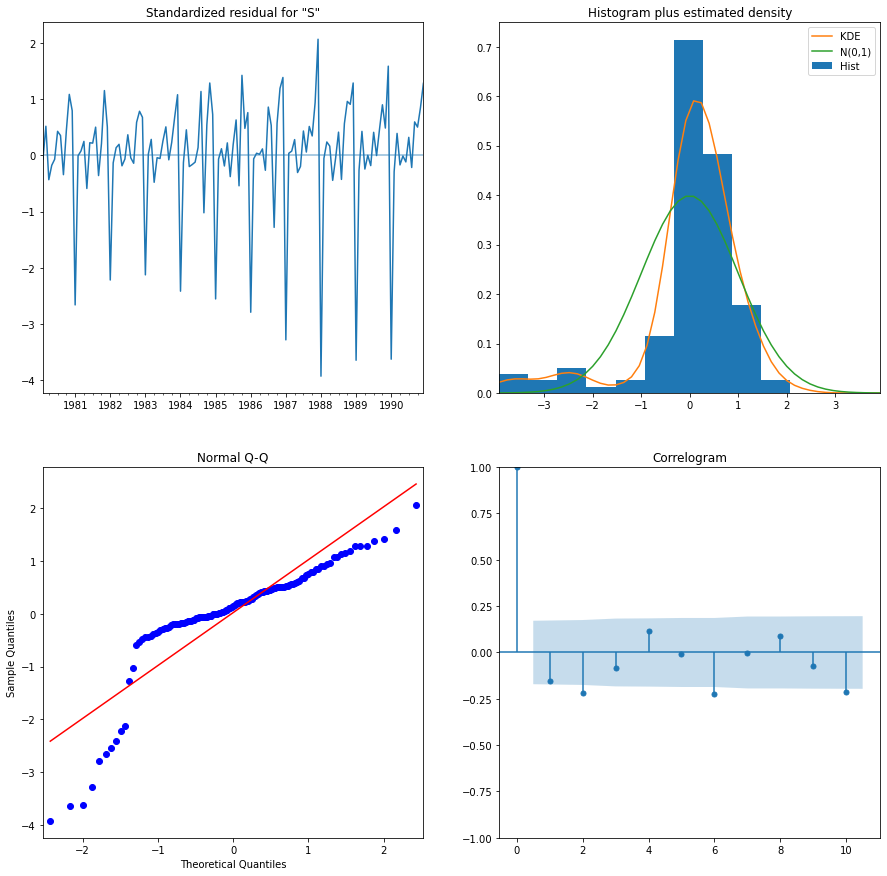

In [208]:
ARIMA_manual.plot_diagnostics(figsize=(15,15));

### Forecast on Test Dataset

In [209]:
df_test['forecast_ARIMA_manual']=ARIMA_manual.forecast(len(df_test))

In [210]:
df_test[['Sparkling','forecast_ARIMA_manual']].head(10).round(1)

Sparkling  forecast_ARIMA_manual
YearMonth                                   
1991-01-01       1902                 6047.0
1991-02-01       2049                 6047.0
1991-03-01       1874                 6047.0
1991-04-01       1279                 6047.0
1991-05-01       1432                 6047.0
1991-06-01       1540                 6047.0
1991-07-01       2214                 6047.0
1991-08-01       1857                 6047.0
1991-09-01       2408                 6047.0
1991-10-01       3252                 6047.0

In [211]:
rmse_ARIMA_manual=mean_squared_error(df_test.Sparkling,df_test.forecast_ARIMA_manual,squared=False)
rmse_ARIMA_manual

3864.2793518443914

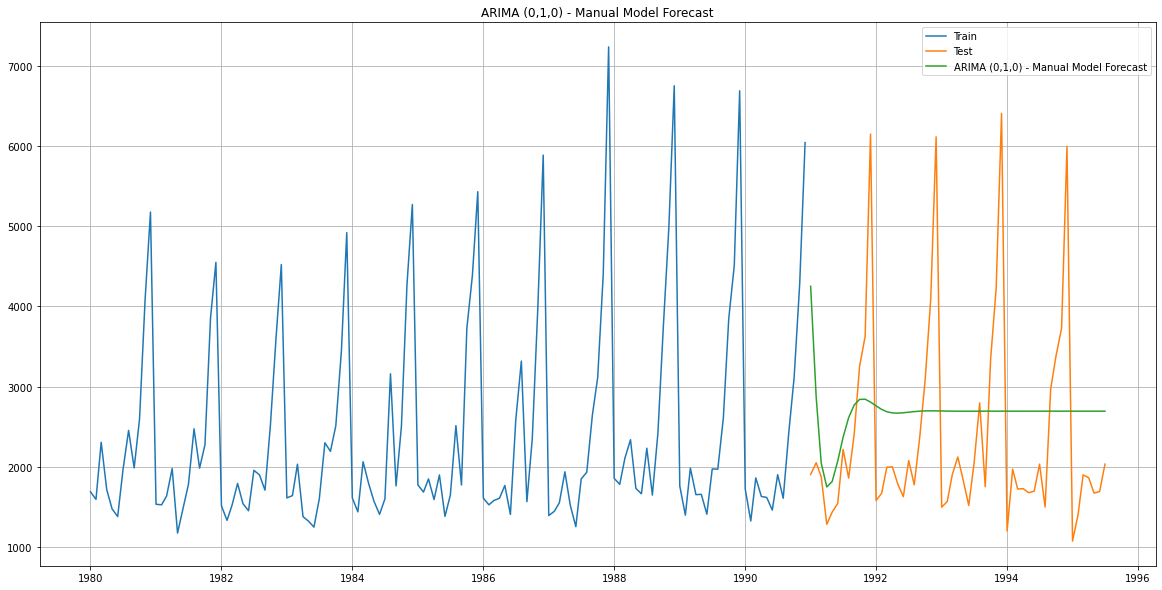

In [212]:
plt.figure(figsize=(20,10))
plt.plot(df_train.Sparkling, label='Train')
plt.plot(df_test.Sparkling, label='Test')
plt.plot(df_test.forecast_ARIMA_auto, 
         label='ARIMA (0,1,0) - Manual Model Forecast')
plt.legend(loc='best')
plt.grid()
plt.title('ARIMA (0,1,0) - Manual Model Forecast');

## SARIMA - ACF and PACF Plots Method

In [213]:
df_train.Sparkling.diff(6).dropna()

YearMonth
1980-07-01     280.0
1980-08-01     862.0
1980-09-01    -320.0
1980-10-01     884.0
1980-11-01    2616.0
               ...  
1990-08-01     284.0
1990-09-01     565.0
1990-10-01    1488.0
1990-11-01    2671.0
1990-12-01    4590.0
Name: Sparkling, Length: 126, dtype: float64

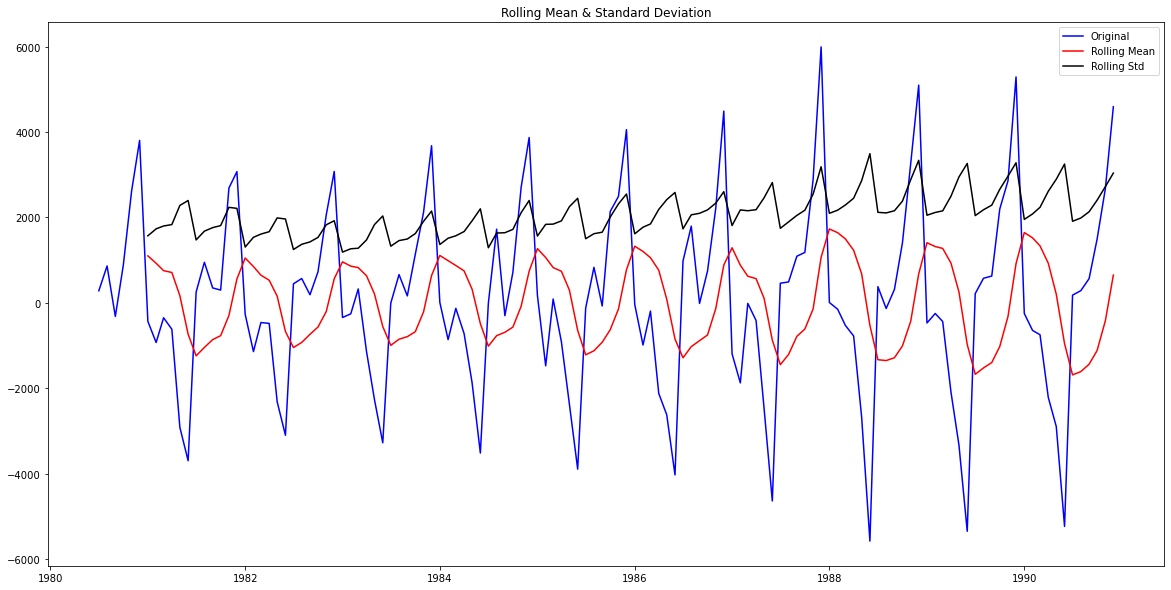

Results of Dickey-Fuller Test:
Test Statistic                -8.181919e+00
p-value                        8.088278e-13
#Lags Used                     6.000000e+00
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [214]:
test_stationarity(df_train.Sparkling.diff(6).dropna())

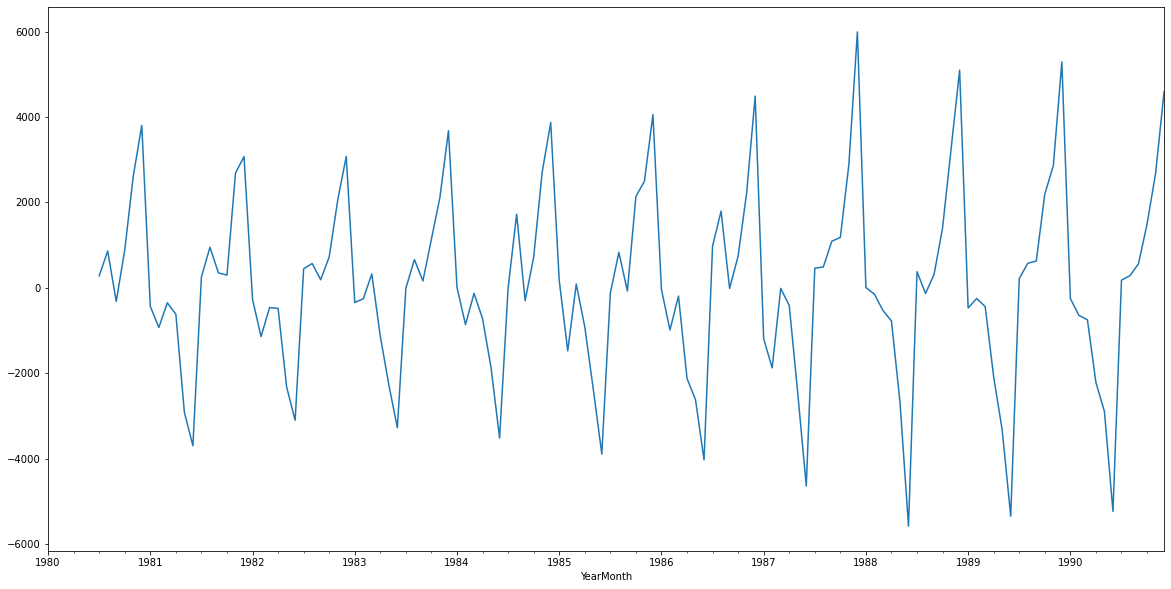

In [224]:
df_train.Sparkling.diff(6).plot();

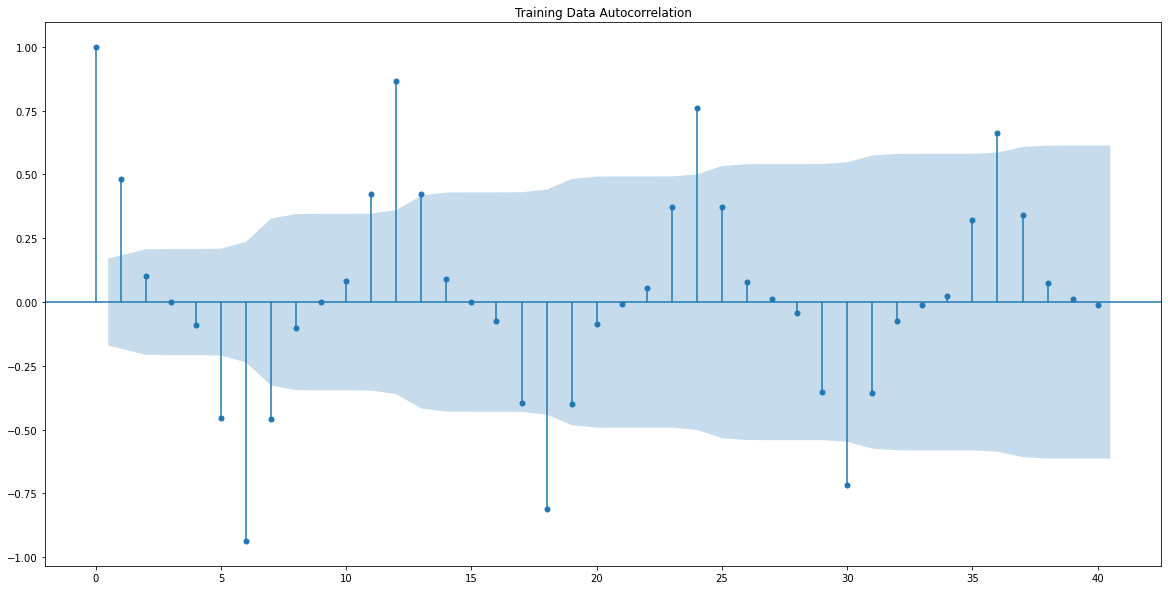

In [215]:
plot_acf(df_train.Sparkling.diff(6),title='Training Data Autocorrelation',missing='drop',lags=40);

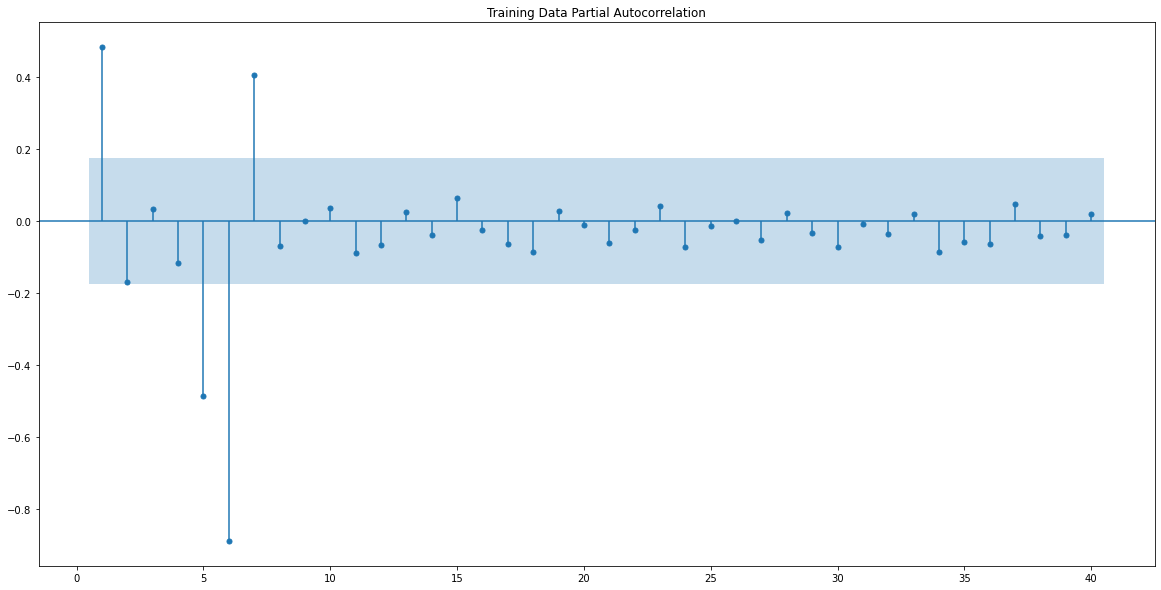

In [216]:
plot_pacf(df_train.Sparkling.diff(6).dropna(),title='Training Data Partial Autocorrelation',zero=False,
          method='ywmle',lags=40);

In [217]:
SARIMA_manual=sm.tsa.statespace.SARIMAX(df_train.Sparkling,order=(0,1,0),seasonal_order=(2,0,1,6),
                                              enforce_stationarity=False,enforce_invertibility=False).fit(maxiter=1000)

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [218]:
SARIMA_manual.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                           Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(2, 0, [1], 6)   Log Likelihood                -916.600
Date:                             Sun, 16 Jan 2022   AIC                           1841.199
Time:                                     18:20:03   BIC                           1852.316
Sample:                                 01-01-1980   HQIC                          1845.713
                                      - 12-01-1990                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L6        0.0067      0.063      0.106      0.916      -0.117       0.131
ar.S.L12       0.9490      0.033     28.908      0.000       0.885       1.013
ma.S.L6       -0.0740      0.141     -0.525      0.599      -0.350       0.202
sigma2      2.895e+05   2.67e+04     10.845      0.000    2.37e+05    3.42e+05
===================================================================================
Ljung-Box (L1) (Q):                  13.33   Jarque-Bera (JB):                37.71
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.02   Skew:                             0.67
Prob(H) (two-sided):                  0.03   Kurtosis:                         5.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

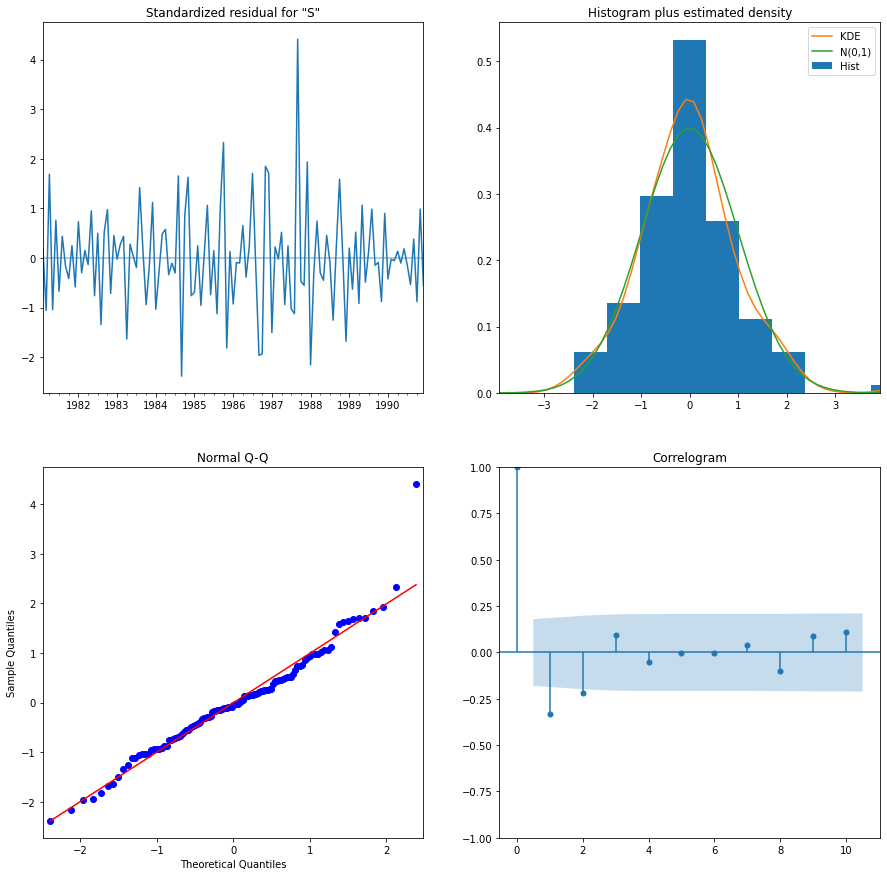

In [219]:
SARIMA_manual.plot_diagnostics(figsize=(15,15));

### Prediction on Test Dataset

In [220]:
df_test['forecast_SARIMA_manual']=SARIMA_manual.forecast(steps=len(df_test))

In [221]:
df_test[['Sparkling','forecast_ARIMA_manual','forecast_SARIMA_manual']].head(10).round(1)

Sparkling  forecast_ARIMA_manual  forecast_SARIMA_manual
YearMonth                                                           
1991-01-01       1902                 6047.0                  1335.6
1991-02-01       2049                 6047.0                   976.4
1991-03-01       1874                 6047.0                  1477.2
1991-04-01       1279                 6047.0                  1297.8
1991-05-01       1432                 6047.0                  1254.0
1991-06-01       1540                 6047.0                  1138.0
1991-07-01       2214                 6047.0                  1525.8
1991-08-01       1857                 6047.0                  1244.4
1991-09-01       2408                 6047.0                  2025.0
1991-10-01       3252                 6047.0                  2680.5

In [222]:
rmse_SARIMA_manual=mean_squared_error(df_test.Sparkling,df_test.forecast_SARIMA_manual,squared=False)
rmse_SARIMA_manual

1239.3455996071127

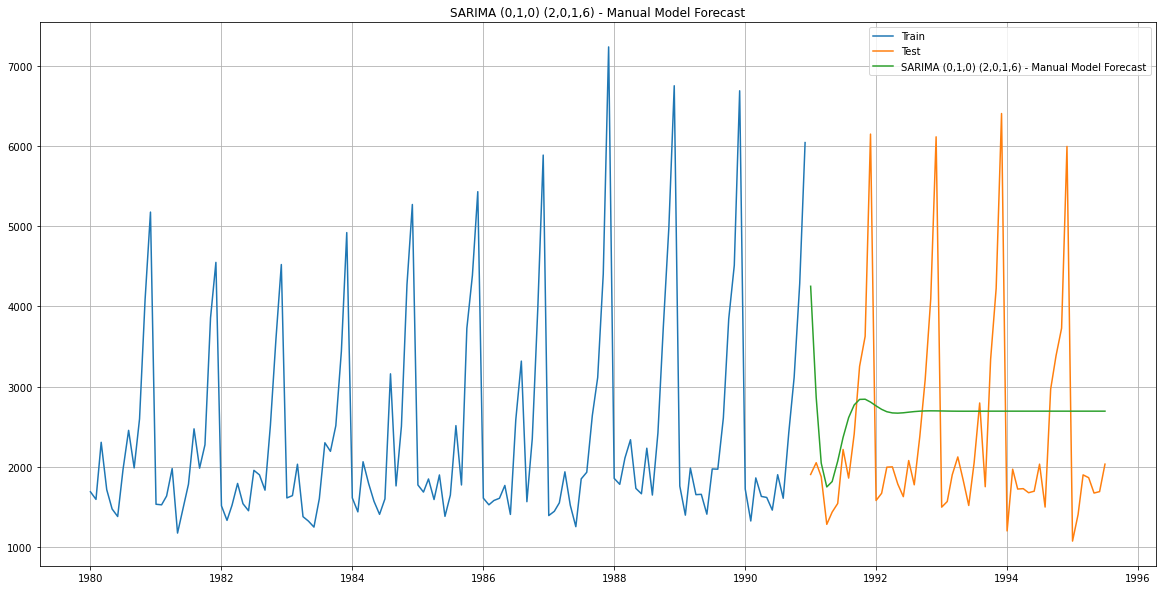

In [223]:
plt.figure(figsize=(20,10))
plt.plot(df_train.Sparkling, label='Train')
plt.plot(df_test.Sparkling, label='Test')
plt.plot(df_test.forecast_ARIMA_auto, 
         label='SARIMA (0,1,0) (2,0,1,6) - Manual Model Forecast')
plt.legend(loc='best')
plt.grid()
plt.title('SARIMA (0,1,0) (2,0,1,6) - Manual Model Forecast');

## Q8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [228]:
rmse=pd.DataFrame({'Model':['Linear_Regression','Naive_Forecast','Simple_Average',
'Simple_Exponential_Smoothing_optimized, Alpha =0.0703,','Simple_Exponential_Smoothing_iteration, Alpha =0.1',
'Double_Exponential_Smoothing_optimized, Alpha=0.665, Beta=0.0001','Double_Exponential_Smoothing_iteration, Alpha=0.1, Beta=0.1',
'Triple Exponential_Smoothing_with additive trend & additive seasonality_optimized, Alpha=0.1113, Beta=0.0124, Gamma=0.4607',
'Triple Exponential_Smoothing_with additive trend & additive seasonality_iteration, Alpha=0.1, Beta=0.4, Gamma=0.1',
'Triple Exponential_Smoothing_with additive trend & multiplicative seasonality_optimized, Alpha=0.1113, Beta=0.0495, Gamma=0.3621',
'Triple Exponential_Smoothing_with additive trend & multiplicative seasonality_iteration, Alpha=0.4, Beta=0.1, Gamma=0.2',
'Triple Exponential_Smoothing_with multiplicative trend & multiplicative seasonality_optimized, Alpha=0.1111, Beta=0.0494, Gamma=0.3622',
'Triple Exponential_Smoothing_with multiplicative trend & multiplicative seasonality_iteration, Alpha =0.4, Beta=0.1,Gamma=0.3',
'Triple Exponential_Smoothing_with multiplicative trend & additive seasonality_optimized, Alpha =0.1155, Beta=0.0133,Gamma=0.4565',
'Triple Exponential_Smoothing_with multiplicative trend & additive seasonality_iteration, Alpha =0.4, Beta=0.1,Gamma=0.2',
'ARIMA_Automated (2,1,2)','ARIMA_ACF Plot (0,1,0)','SARIMA_Automated (2,1,3)(2,1,3,6)','SARIMA_ACF Plot (0,1,0)(2,0,1,6)'],
'RMSE':[rmse_lr,rmse_naive,rmse_sa,rmse_ses_optimized,rmse_ses,rmse_des_optimized,rmse_des,rmse_tes_add_add_optimized,
     rmse_tes_add_add,rmse_tes_add_mult_optimized,rmse_tes_add_mult,rmse_tes_mult_mult_optimized,rmse_tes_mult_mult,rmse_tes_mult_add_optimized,rmse_tes_mult_add,rmse_ARIMA_auto,rmse_ARIMA_manual,
        rmse_SARIMA_auto,rmse_SARIMA_manual]})
rmse.set_index('Model',inplace=True)
rmse.round(1)

RMSE
Model                                                     
Linear_Regression                                   1389.1
Naive_Forecast                                      3864.3
Simple_Average                                      1275.1
Simple_Exponential_Smoothing_optimized, Alpha =...  1338.0
Simple_Exponential_Smoothing_iteration, Alpha =0.1  1375.4
Double_Exponential_Smoothing_optimized, Alpha=0...  5291.9
Double_Exponential_Smoothing_iteration, Alpha=0...  1777.7
Triple Exponential_Smoothing_with additive tren...   379.0
Triple Exponential_Smoothing_with additive tren...   342.9
Triple Exponential_Smoothing_with additive tren...   404.3
Triple Exponential_Smoothing_with additive tren...   317.4
Triple Exponential_Smoothing_with multiplicativ...   380.4
Triple Exponential_Smoothing_with multiplicativ...   326.6
Triple Exponential_Smoothing_with multiplicativ...   381.2
Triple Exponential_Smoothing_with multiplicativ...   341.7
ARIMA_Automated (2,1,2)                             1300.0
ARIMA_ACF Plot (0,1,0)                              3864.3
SARIMA_Automated (2,1,3)(2,1,3,6)                    784.1
SARIMA_ACF Plot (0,1,0)(2,0,1,6)                    1239.3

In [226]:
rmse.sort_values(by='RMSE').round(1)

RMSE
Model                                                     
Triple Exponential_Smoothing_with additive tren...   317.4
Triple Exponential_Smoothing_with multiplicativ...   326.6
Triple Exponential_Smoothing_with multiplicativ...   341.7
Triple Exponential_Smoothing_with additive tren...   342.9
Triple Exponential_Smoothing_with additive tren...   379.0
Triple Exponential_Smoothing_with multiplicativ...   380.4
Triple Exponential_Smoothing_with multiplicativ...   381.2
Triple Exponential_Smoothing_with additive tren...   404.3
SARIMA_Automated (2,1,3)(2,1,3,6)                    784.1
SARIMA_ACF Plot (0,1,0)(2,0,1,6)                    1239.3
Simple_Average                                      1275.1
ARIMA_Automated (2,1,2)                             1300.0
Simple_Exponential_Smoothing_optimized, Alpha =...  1338.0
Simple_Exponential_Smoothing_iteration, Alpha =0.1  1375.4
Linear_Regression                                   1389.1
Double_Exponential_Smoothing_iteration, Alpha=0...  1777.7
Naive_Forecast                                      3864.3
ARIMA_ACF Plot (0,1,0)                              3864.3
Double_Exponential_Smoothing_optimized, Alpha=0...  5291.9

#### We see that the best model is the Triple Exponential Smoothing with Additive Trend & Multiplicative seasonality with the Parameters $\alpha$ = 0.4, $\beta$ = 0.1 and $\gamma$ = 0.2.

## Q9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

### Optimum Model - Triple Exponential Smoothing with Additive Trend and Multiplicative Seasonality with Parameters as Alpha=0.4, Beta=0.1 and Gamma=0.2.

In [247]:
fullmodel = ExponentialSmoothing(df.Sparkling,trend='additive',seasonal='multiplicative').fit(smoothing_level=0.4,
                                                                 smoothing_trend=0.1,
                                                                 smoothing_seasonal=0.2)

C:\Users\marri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [248]:
rmse_fullmodel = mean_squared_error(df.Sparkling,fullmodel.fittedvalues,squared=False)
rmse_fullmodel

377.29032542281715

In [249]:
# Getting the predictions for the same number of times stamps that are present in the test data
forecast_fullmodel = fullmodel.forecast(steps=12)

In [250]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,10

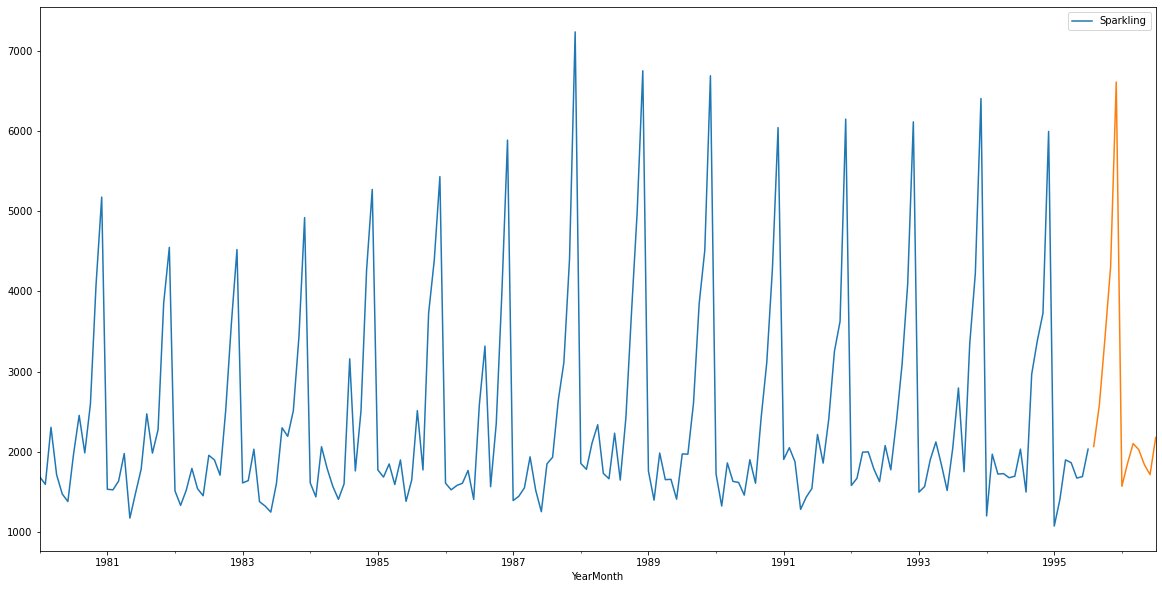

In [251]:
df.plot();
forecast_fullmodel.plot();

One assumption that we have made over here while calculating the confidence bands is that the standard deviation of the forecast distribution is almost equal to the residual standard deviation.

In [252]:
fullmodel.resid

YearMonth
1980-01-01   -170.103551
1980-02-01   -132.682981
1980-03-01    200.438533
1980-04-01   -251.740172
1980-05-01    -71.963293
                 ...    
1995-03-01    398.046799
1995-04-01    254.295435
1995-05-01    104.058211
1995-06-01    219.252639
1995-07-01     -7.070516
Length: 187, dtype: float64

In [255]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
forecast_df = pd.DataFrame({'lower_CI':forecast_fullmodel - 1.96*np.std(fullmodel.resid,ddof=1),
                          'Forecast':forecast_fullmodel,
                          'upper_ci': forecast_fullmodel + 1.96*np.std(fullmodel.resid,ddof=1)})
forecast_df.round(1)

lower_CI  Forecast  upper_ci
1995-08-01    1321.9    2063.4    2804.8
1995-09-01    1838.3    2579.8    3321.3
1995-10-01    2676.6    3418.1    4159.6
1995-11-01    3567.1    4308.6    5050.1
1995-12-01    5874.3    6615.8    7357.3
1996-01-01     825.5    1566.9    2308.4
1996-02-01    1111.0    1852.5    2593.9
1996-03-01    1359.6    2101.0    2842.5
1996-04-01    1282.7    2024.2    2765.7
1996-05-01    1094.1    1835.5    2577.0
1996-06-01     971.7    1713.2    2454.7
1996-07-01    1435.7    2177.2    2918.6

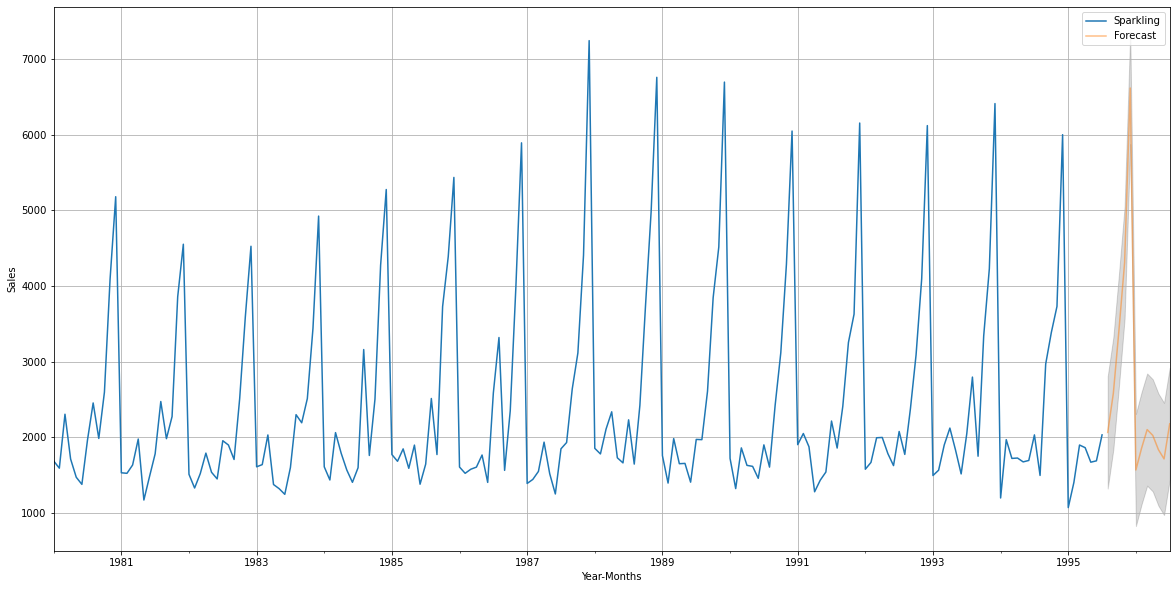

In [254]:
# plot the forecast along with the confidence band
axis = df.plot(label='Actual', figsize=(20,10))
forecast_df['Forecast'].plot(ax=axis,label='Forecast',alpha=0.5)
axis.fill_between(forecast_df.index, forecast_df['lower_CI'], forecast_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

## Q10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales. Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.